## Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

-  The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

-  All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

-  ***Approved***: The Company has approved loan Application

-  ***Cancelled***: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

-  ***Refused***: The company had rejected the loan (because the client does not meet their requirements etc.).

-  ***Unused offer***:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

 

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 

## Data Understanding


This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## Results Expected by Learners

-  Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

-  Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

**Hint**: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

-  Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

-  Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint**: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

**Hint**: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

-  Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

-  Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

-  Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

 

**You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.**

In [1]:
# Important libraries

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings   
warnings.filterwarnings("ignore")

# For displaying rowns and columns 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

-  There are 3 file , 2 data set & 1 description of column :
 1. columns_description.csv
 2. application_data.csv
 3. previous_application.csv

In [2]:
# Importing columns_description,through this I will get significance of each column. 

pd.read_csv("columns_description.csv",encoding='cp1252')  

Unnamed: 0                     Table                           Row  \
0             1          application_data                    SK_ID_CURR   
1             2          application_data                        TARGET   
2             5          application_data            NAME_CONTRACT_TYPE   
3             6          application_data                   CODE_GENDER   
4             7          application_data                  FLAG_OWN_CAR   
5             8          application_data               FLAG_OWN_REALTY   
6             9          application_data                  CNT_CHILDREN   
7            10          application_data              AMT_INCOME_TOTAL   
8            11          application_data                    AMT_CREDIT   
9            12          application_data                   AMT_ANNUITY   
10           13          application_data               AMT_GOODS_PRICE   
11           14          application_data               NAME_TYPE_SUITE   
12           15          application_data              NAME_INCOME_TYPE   
13           16          application_data           NAME_EDUCATION_TYPE   
14           17          application_data            NAME_FAMILY_STATUS   
15           18          application_data             NAME_HOUSING_TYPE   
16           19          application_data    REGION_POPULATION_RELATIVE   
17           20          application_data                    DAYS_BIRTH   
18           21          application_data                 DAYS_EMPLOYED   
19           22          application_data             DAYS_REGISTRATION   
20           23          application_data               DAYS_ID_PUBLISH   
21           24          application_data                   OWN_CAR_AGE   
22           25          application_data                    FLAG_MOBIL   
23           26          application_data                FLAG_EMP_PHONE   
24           27          application_data               FLAG_WORK_PHONE   
25           28          application_data              FLAG_CONT_MOBILE   
26           29          application_data                    FLAG_PHONE   
27           30          application_data                    FLAG_EMAIL   
28           31          application_data               OCCUPATION_TYPE   
29           32          application_data               CNT_FAM_MEMBERS   
30           33          application_data          REGION_RATING_CLIENT   
31           34          application_data   REGION_RATING_CLIENT_W_CITY   
32           35          application_data    WEEKDAY_APPR_PROCESS_START   
33           36          application_data       HOUR_APPR_PROCESS_START   
34           37          application_data    REG_REGION_NOT_LIVE_REGION   
35           38          application_data    REG_REGION_NOT_WORK_REGION   
36           39          application_data   LIVE_REGION_NOT_WORK_REGION   
37           40          application_data        REG_CITY_NOT_LIVE_CITY   
38           41          application_data        REG_CITY_NOT_WORK_CITY   
39           42          application_data       LIVE_CITY_NOT_WORK_CITY   
40           43          application_data             ORGANIZATION_TYPE   
41           44          application_data                  EXT_SOURCE_1   
42           45          application_data                  EXT_SOURCE_2   
43           46          application_data                  EXT_SOURCE_3   
44           47          application_data                APARTMENTS_AVG   
45           48          application_data              BASEMENTAREA_AVG   
46           49          application_data   YEARS_BEGINEXPLUATATION_AVG   
47           50          application_data               YEARS_BUILD_AVG   
48           51          application_data                COMMONAREA_AVG   
49           52          application_data                 ELEVATORS_AVG   
50           53          application_data                 ENTRANCES_AVG   
51           54          application_data                 FLOORSMAX_AVG   
52           55          appli

#  Importing, reading & understanding the application_data.csv

In [3]:
# Importing application_data.csv as df

df=pd.read_csv("application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Checking shape,size of the dataframes df

print("Shape of dataframe :",df.shape,"\nSize of dataframe :",df.size)

Shape of dataframe : (307511, 122) 
Size of dataframe : 37516342


-  There are 122 columns and 307511 rows.
-  There columns having negative, postive values which includes days. fixing is required
-  There are columns with very hight values, columns related to Amount(Price). standardising is required

In [5]:
# Checking information of all the columns in df

df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# Checking the numeric variables of the dataframes df

df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

 - A lot of columns are having outlier values which I will analyse 

## Data Cleaning & Manipulation

In [7]:
# Checking how many duplicate variables are present in df

df.duplicated().sum()

0

 - No duplicate variables are there

### Finding and treating  null values

In [8]:
# Checking how many null values are present in each of the columns just for that I am Creating a function to find null values for the dataframe

def col_null(df):
    return (df.isnull().sum()*100/len(df)).sort_values(ascending = False)

In [9]:
col_null(df)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

-  More than half of columns have null values.
-  I am going to drop columns that have null values mare than 35% because there is no way we can replace these missing data.

####  Droping columns that have  null values more than 35 %

In [10]:
# Creating a variable high_null for storing null columns having missing values more than 35%

high_null= col_null(df)[col_null(df)>35]
high_null

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [11]:
# Checking shape of high_null

high_null.shape

(49,)

In [12]:
# Droping all the columns that have missing values more than 35% 

df.drop(columns = high_null.index, inplace = True)

In [13]:
# Checking shape of df after dropping variables which are having very high null values

df.shape

(307511, 73)

-  After dropping 49 columns that have null values more than 35%
-  Now There are 73 columns left

####  columns that  have low  null values 

In [14]:
# Creating a variable "null" for storing remaining null columns 

null=col_null(df)[col_null(df)>0]
null

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

##### Imputing for "OCCUPATION_TYPE" column

-  I decided to imput values because it's related to "TARGET" column

In [15]:
# Checking percentage value counts of each category present in "OCCUPATION_TYPE"

df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

-  'OCCUPATION_TYPE' columnn is categorical one and have missing values of approx 31.35%.   


In [16]:
# Imputing null values with "Unknown" because 31.35% data can mess up with our analysis if not treated well

df.OCCUPATION_TYPE = df.OCCUPATION_TYPE.fillna("Unknown") 

In [17]:
df.OCCUPATION_TYPE.isnull().sum()

0

##### Now moving to other null  columns :

In [18]:
col_null(df).head(17)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [19]:
df[["EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","NAME_TYPE_SUITE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","EXT_SOURCE_2","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE"]].describe()

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count  246546.000000               265992.000000              265992.000000   
mean        0.510853                    1.899974                   0.265474   
std         0.194844                    1.869295                   0.794056   
min         0.000527                    0.000000                   0.000000   
25%         0.370650                    0.000000                   0.000000   
50%         0.535276                    1.000000                   0.000000   
75%         0.669057                    3.000000                   0.000000   
max         0.896010                   25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.006402   
std                     0.110757                    0.083849   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    4.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.100049                  1.422245   
std                    0.362291                  2.400989   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   24.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  \
count             306490.000000             306490.000000  3.068510e+05   
mean                   0.143421                  1.405292  5.143927e-01   
std                    0.446698                  2.379803  1.910602e-01   
min                    0.000000                  0.000000  8.173617e-08   
25%                    0.000000                  0.000000  3.924574e-01   
50%                    0.000000                  0.000000  5.659614e-01   
75%                    0.000000                  2.000000  6.636171e-01   
max                   34.000000                344.000000  8.549997e-01   

       AMT_GOODS_PRICE    AMT_ANNUITY  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  
count     3.072330e+05  307499.000000    307509.000000           307510.000000  
mean      5.383962e+05   27108.573909         2.152665             -962.858788  
std       3.694465e+05   14493.737315         0.910682              826.808487  
min       4.050000e+04    1615.500000         1.000000            -4292.000000  
25%       2.385000e+05   16524.000000         2.000000            -1570.000000  
50%       4.500000e+05   24903.000000         2.000000             -757.000000  
75%       6.795000e+05   34596.000000         3.000000             -274.000000  
max       4.050000e+06  258025.500000        20.000000                0.000000

-  These above columns represent number of enquries made for the customer, after looking at data I can say that this data is discrete numerical type data and also after looking at mean,50% percentile , min and max in describe results, I can say that for imputing missing values instead of using mean we should use median (except for "NAME_TYPE_SUITE" because it a categorical datatype) and because there are outliers and also mean in decimal.


In [20]:
# Creating "low_null" variable(list) having these all columns header in it except 'NAME_TYPE_SUITE'

low_null=["EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","EXT_SOURCE_2","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE"]
low_null

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [21]:
# Imputing null values with median

df.fillna(df[low_null].median(),inplace=True)

In [22]:
col_null(df).head()

NAME_TYPE_SUITE    0.420148
SK_ID_CURR         0.000000
FLAG_DOCUMENT_2    0.000000
FLAG_DOCUMENT_8    0.000000
FLAG_DOCUMENT_7    0.000000
dtype: float64

In [23]:
# Checking percentage value counts of each category present in "NAME_TYPE_SUITE"

df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [24]:
# mode 

df.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [25]:
# Imputing null values in "NAME_TYPE_SUITE" with mode

df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [26]:
col_null(df).head()

SK_ID_CURR                0.0
REG_CITY_NOT_WORK_CITY    0.0
FLAG_DOCUMENT_8           0.0
FLAG_DOCUMENT_7           0.0
FLAG_DOCUMENT_6           0.0
dtype: float64

In [27]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

-  It's looks like there is no more null value. but There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So I have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [28]:
# Replace "XNA" to nan

df=df.replace("XNA",np.nan)

In [29]:
col_null(df).head()

ORGANIZATION_TYPE    18.007161
CODE_GENDER           0.001301
SK_ID_CURR            0.000000
FLAG_DOCUMENT_2       0.000000
FLAG_DOCUMENT_8       0.000000
dtype: float64

- Column "ORGANIZATION_TYPE" have 18% and Column "CODE_GENDER" have 0.0013% "XNA" values

In [30]:
df.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [31]:
# For column CODE_GENDER will going to use mode Imputing technique

df.CODE_GENDER.mode()[0]

'F'

In [32]:
# Imputing null values in "CODE_GENDER" with mode 

df.CODE_GENDER.fillna(df.CODE_GENDER.mode()[0],inplace=True)

In [33]:
# For "ORGANIZATION_TYPE" we have to look for value count first

df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Name: ORGANIZATION_TYPE, dtype: int64

-  For "ORGANIZATION_TYPE" I have 3 option 1. drop the null/XNA , 2. replace XNA/null with  "Business Entity Type 3" or with "Other", 3. create a new category "Not_Available". I am going for last option because if i imput with any other catagory tha value count will be very high and that can lead to wrong conclusion so it's best to avoid that. 

In [34]:
# Imputing null values in "ORGANIZATION_TYPE" with "Not Available"  

df.ORGANIZATION_TYPE=df.ORGANIZATION_TYPE.replace(np.nan,"Not Available")

In [35]:
# Checking value counts of each category present in "ORGANIZATION_TYPE"

df.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
Not Available             55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [36]:
col_null(df).head()

SK_ID_CURR                0.0
REG_CITY_NOT_WORK_CITY    0.0
FLAG_DOCUMENT_8           0.0
FLAG_DOCUMENT_7           0.0
FLAG_DOCUMENT_6           0.0
dtype: float64

-  So all the null values are treated.

### Finding the top 10 correlation

- For Defaulter

In [37]:
# Defaulter

tar_1=df[df.TARGET==1] 
tar_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
26            -1827           1               1                0   
40            -1029           1               1                0   
42            -4409           1               1                1   
81            -4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0         Unknown              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

In [38]:
# Numerical columns in Defaulter

tar_1_h=["SK_ID_CURR", "CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

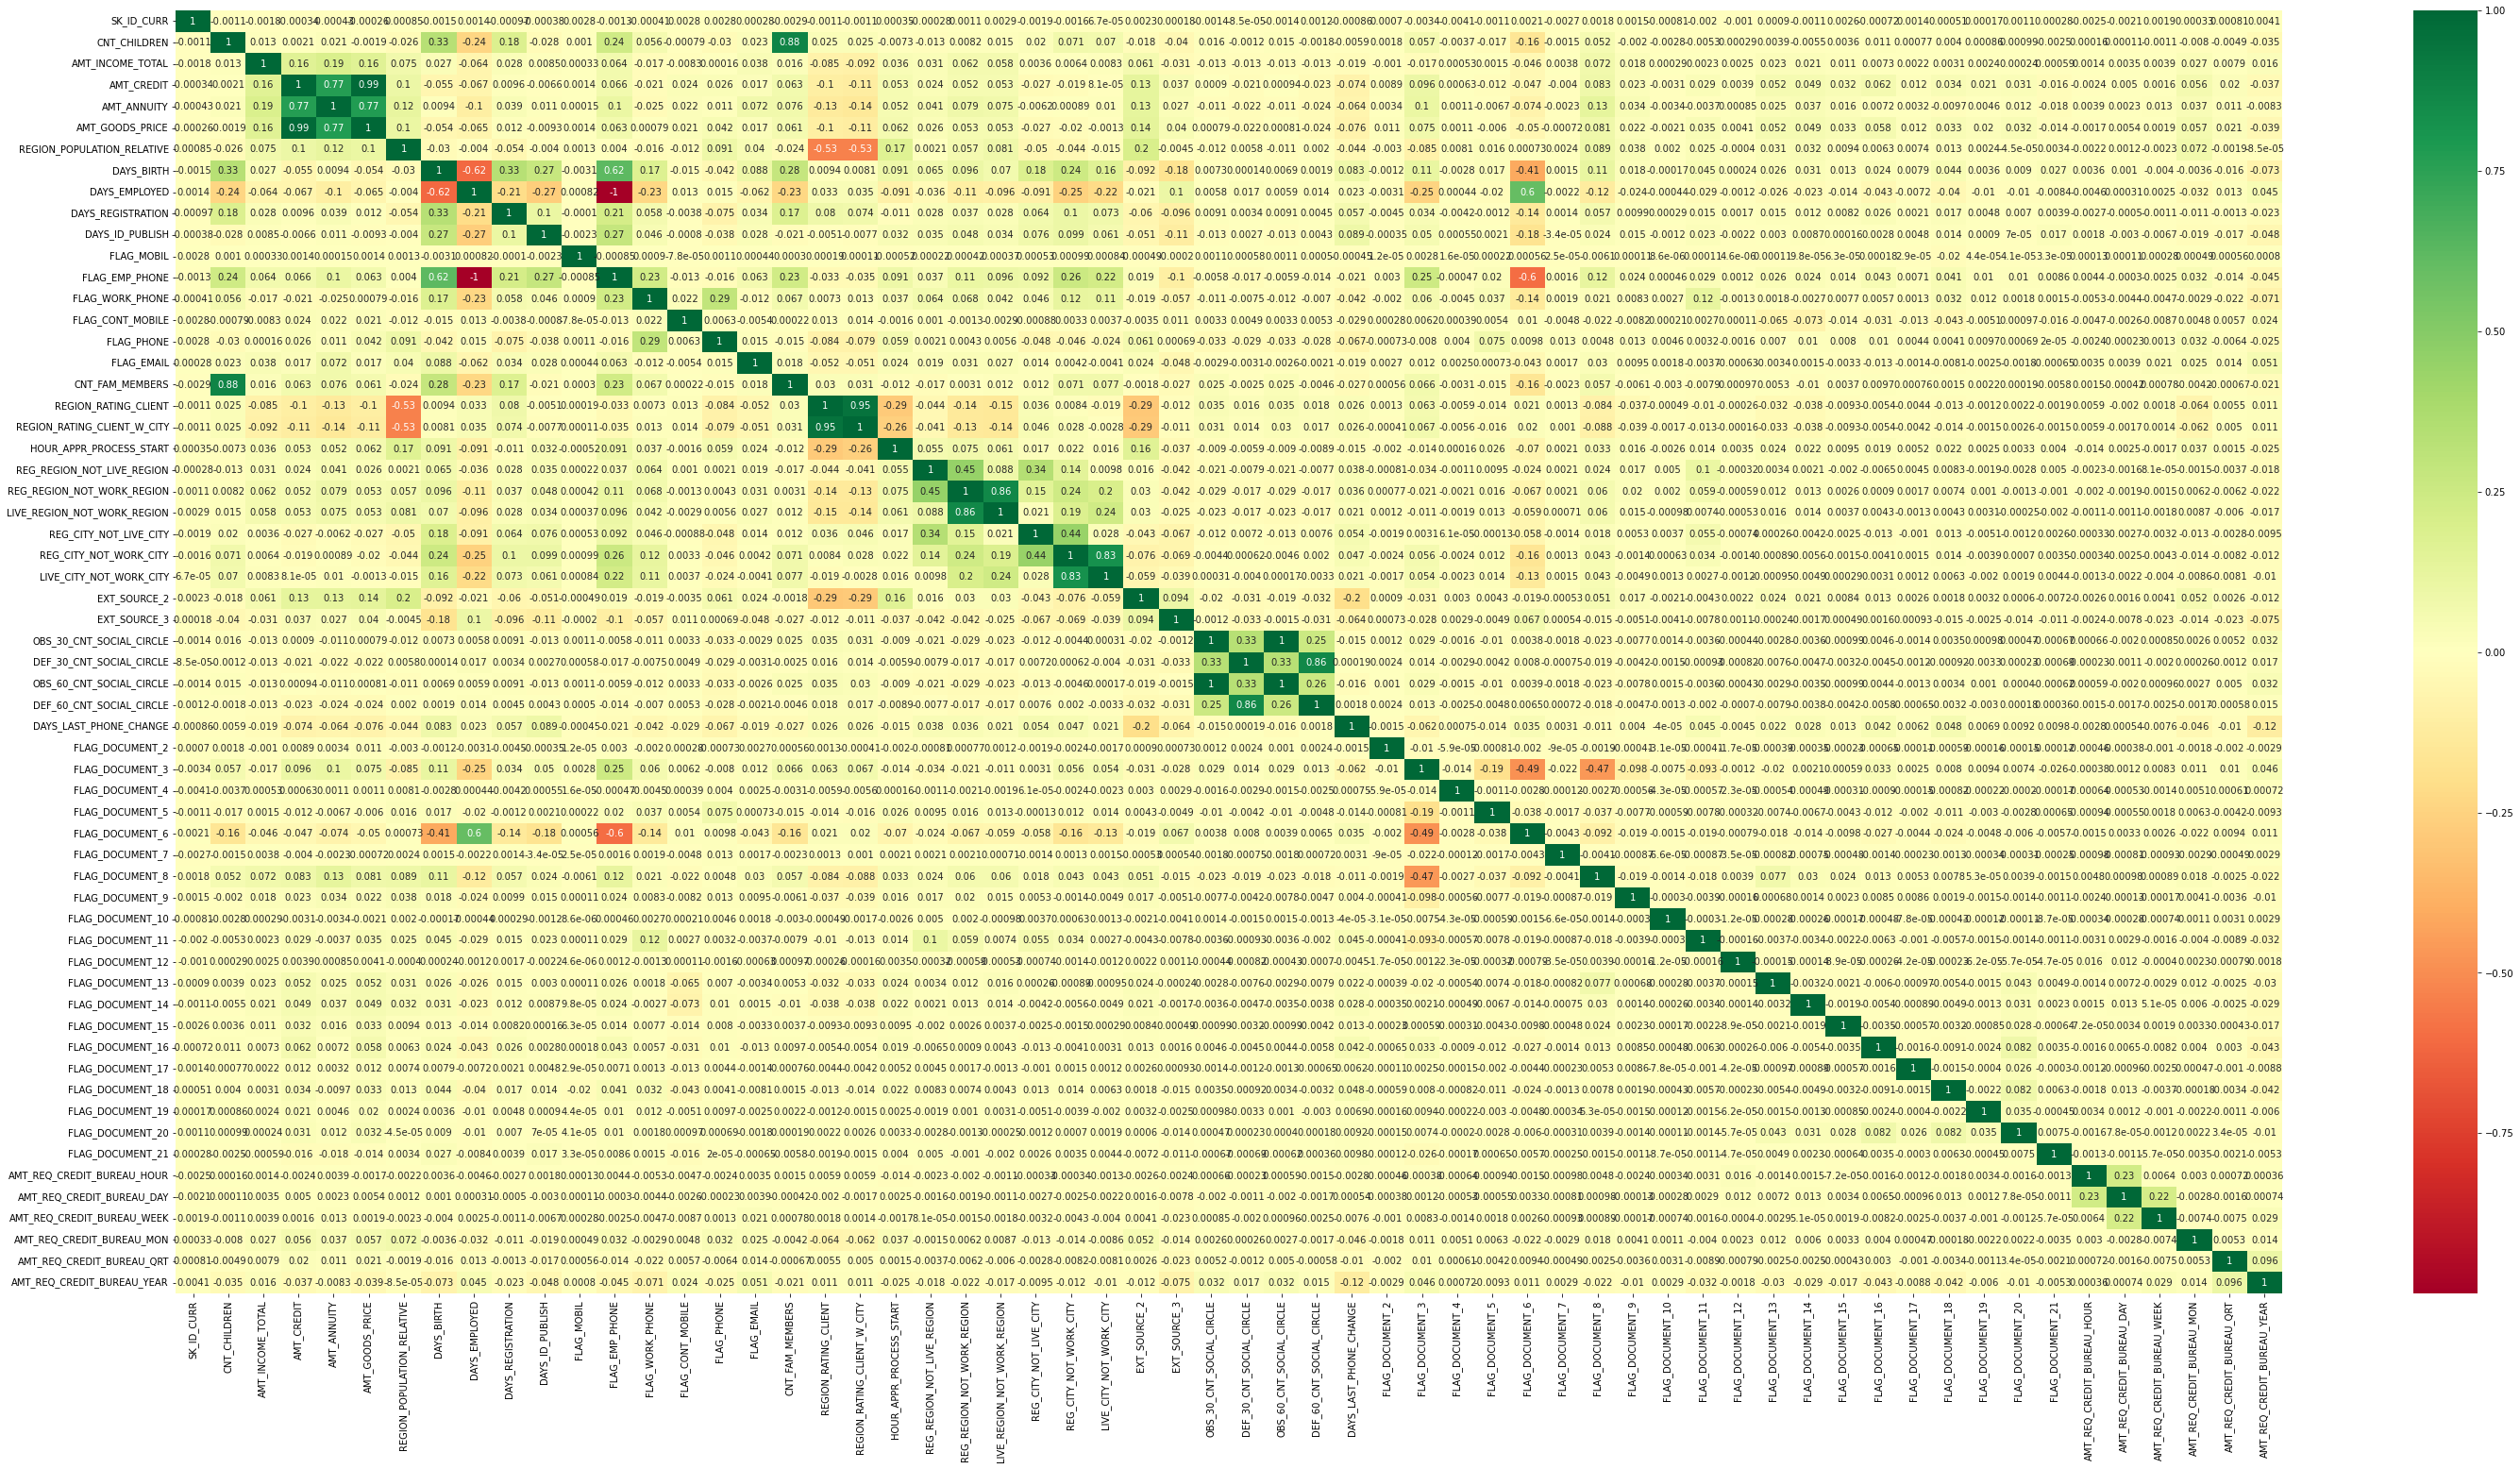

In [39]:
# ploting heatmap

plt.figure(figsize= [50,25])
sns.heatmap(df[tar_1_h].corr(), cmap="RdYlGn",annot=True)
plt.show()

In [40]:
# Top correlations

coor_Defaulter=df[tar_1_h].corr()
coor_Defaulter = coor_Defaulter.unstack().sort_values(kind="quicksort")
coor_Defaulter = coor_Defaulter.dropna()
coor_Defaulter = coor_Defaulter[coor_Defaulter != 1.0]

coor_Defaulter

DAYS_EMPLOYED             FLAG_EMP_PHONE                -0.999755
FLAG_EMP_PHONE            DAYS_EMPLOYED                 -0.999755
DAYS_EMPLOYED             DAYS_BIRTH                    -0.615864
DAYS_BIRTH                DAYS_EMPLOYED                 -0.615864
FLAG_DOCUMENT_6           FLAG_EMP_PHONE                -0.597732
                                                           ...   
REGION_RATING_CLIENT      REGION_RATING_CLIENT_W_CITY    0.950842
AMT_GOODS_PRICE           AMT_CREDIT                     0.986734
AMT_CREDIT                AMT_GOODS_PRICE                0.986734
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE       0.998491
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE       0.998491
Length: 3540, dtype: float64

- For Repayer

In [41]:
# Repayer

tar_0=df[df.TARGET==0] 
tar_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [42]:
# Numerical columns in Repayer

tar_0_n=["SK_ID_CURR", "CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

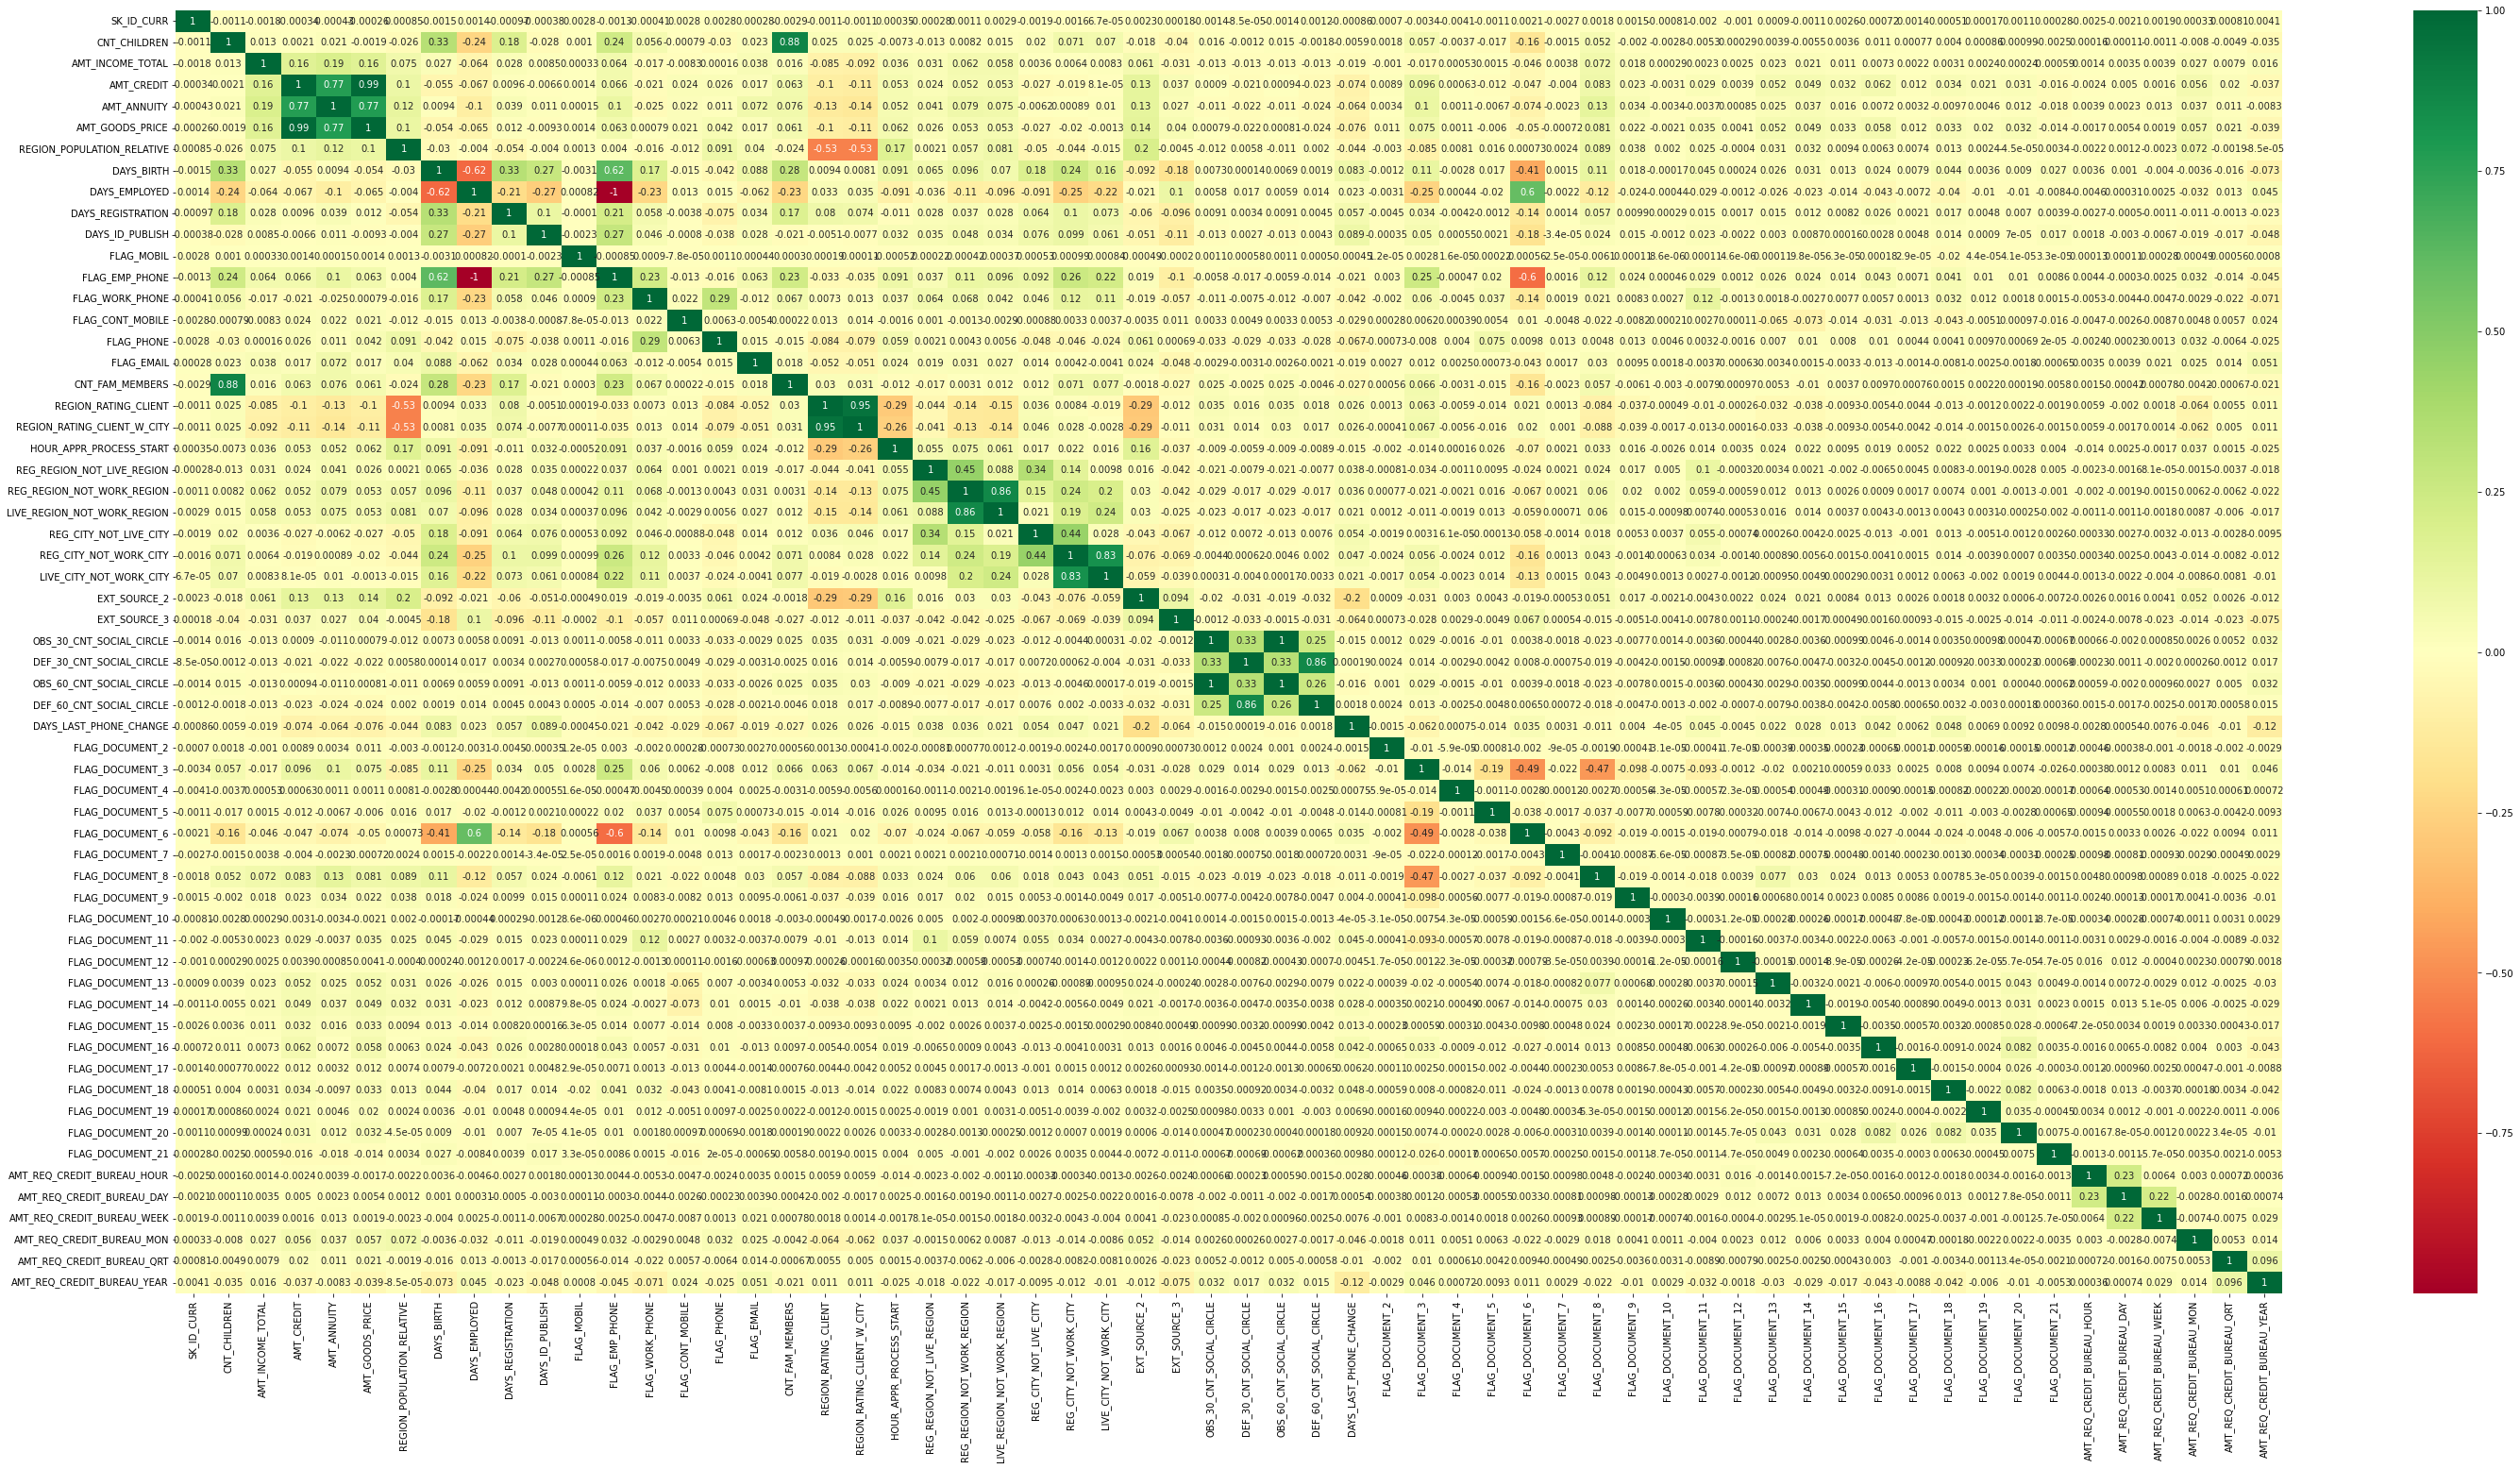

In [43]:
# ploting heatmap

plt.figure(figsize= [50,25])
sns.heatmap(df[tar_0_n].corr(), cmap="RdYlGn",annot=True)
plt.show()

In [44]:
# Top correlations

coor_Repayer=df[tar_0_n].corr()
coor_Repayer = coor_Repayer.unstack().sort_values(kind="quicksort")
coor_Repayer = coor_Repayer.dropna()
coor_Repayer = coor_Repayer[coor_Repayer != 1.0]

coor_Repayer

DAYS_EMPLOYED             FLAG_EMP_PHONE                -0.999755
FLAG_EMP_PHONE            DAYS_EMPLOYED                 -0.999755
DAYS_EMPLOYED             DAYS_BIRTH                    -0.615864
DAYS_BIRTH                DAYS_EMPLOYED                 -0.615864
FLAG_DOCUMENT_6           FLAG_EMP_PHONE                -0.597732
                                                           ...   
REGION_RATING_CLIENT      REGION_RATING_CLIENT_W_CITY    0.950842
AMT_GOODS_PRICE           AMT_CREDIT                     0.986734
AMT_CREDIT                AMT_GOODS_PRICE                0.986734
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE       0.998491
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE       0.998491
Length: 3540, dtype: float64

### Unwanted columns in dataFrame

In [45]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

-  By looking at dataFrame and columns_description and based on our understanding i can divide columns in 3 types 
1. Necessary_columns
2. Not_necessary_columns/Unwanted_columns
3. Not_sure_columns

-  Not_necessary_columns are "WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START" and few columns that have "FLAG" in it.

-   Not_sure_columns are "EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE" .

-  I am going to drop Not_necessary_columns/Unwanted_columns and also check whether which colums in not_sure_columns are needed.

In [46]:
# Droping Not_necessary_columns/Unwanted_columns for dataFrame but I exclude these columns 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' because they are  be useful 

df.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START", 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',"FLAG_MOBIL", 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1,inplace=True)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.535276   
2

#### Now dealing with Not_sure_columns

-  To make sure these columns have no relation or have one, I will use heatmap b/w TARGET column and these all columns

In [47]:
df[["EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]

EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0           0.262949      0.139376                       2.0   
1           0.622246      0.535276                       1.0   
2           0.555912      0.729567                       0.0   
3           0.650442      0.535276                       2.0   
4           0.322738      0.535276                       0.0   
...              ...           ...                       ...   
307506      0.681632      0.535276                       0.0   
307507      0.115992      0.535276                       0.0   
307508      0.535722      0.218859                       6.0   
307509      0.514163      0.661024                       0.0   
307510      0.708569      0.113922                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       6.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  
0                            2.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
307506                       0.0  
307507                       0.0  
307508                       0.0  
307509                       0.0  
307510                       0.0  

[307511 rows x 6 columns]

In [48]:
# Creating "Not_sure" variable(list) having these all columns header in it

Not_sure = ["EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]

In [49]:
# ploting heatmap

plt.figure(figsize= [15,7])
sns.heatmap(df[Not_sure+["TARGET"]].corr(), cmap="Reds",annot=True)
plt.show()

-  Form heatmap I can say there is  no linear correlation because values are close to zero (Values closer to zero means there is no linear trend between the variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. ) and also from columns description i already decide to remove these columns if they have no relation with 'TARGET'.

-  Also i am aware correation doesn't cause causation

-  So i will drop these columns

In [50]:
# Droping Not_sure_columns 


df.drop(["EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"], axis=1,inplace=True)

### Standardising values and  Identifying Outliers

In [51]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                 -1134.0                         0.0   
1         

-  Still there are few major problems in dataFrame 
1. Negative values in columns
2. date_time problem columns 

##### 1. Negative values in columns
columns "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" have negative values

In [52]:
# creating "neg" variable(list) for negative value columns that have header of such columns

neg=["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
df[neg]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [53]:
# Treating negative value columns

df[neg]=abs(df[neg])
df[neg]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[307511 rows x 5 columns]

##### 2.date_time problem columns 
columns "DAYS_BIRTH","DAYS_EMPLOYED" have problem

In [54]:
# Checking such columns

df[["DAYS_BIRTH","DAYS_EMPLOYED"]]

DAYS_BIRTH  DAYS_EMPLOYED
0             9461            637
1            16765           1188
2            19046            225
3            19005           3039
4            19932           3038
...            ...            ...
307506        9327            236
307507       20775         365243
307508       14966           7921
307509       11961           4786
307510       16856           1262

[307511 rows x 2 columns]

In [55]:
# Treating these columns and creating new columns 

df["AGE_YEARS"]=round(df[["DAYS_BIRTH"]]/365)

df["CUR_EMPLOYED_YEARS"]=round(df[["DAYS_EMPLOYED"]]/365)

In [56]:
# now drop columns "DAYS_BIRTH","DAYS_EMPLOYED"

df.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis=1,inplace=True)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801             3648.0             2120   
1                    0.003541             1186.0              291   
2                    0.010032             4260.0             2531   
3                    0.008019             9833.0             2437   
4                    0.028663             4311.0             3458   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                  1134.0                         0.0   
1                  School                   828.0                         0.0   
2              Government                   815.0                         0.0   
3  Busines

##### Identifying Outliers

-  An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects.

In [57]:
# Checking the numeric variables of the dataframes df

df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count               307511.000000      307511.000000    307511.000000   
mean                     0.020868        4986.120328      2994.202373   
std                      0.013831        3522.886321      1509.450419   
min                      0.000290           0.000000         0.000000   
25%                      0.010006        2010.000000      1720.000000   
50%                      0.018850        4504.000000      3254.000000   
75%                      0.028663        7479.500000      4299.000000   
max                      0.072508       24672.000000      7197.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307511.000000         307511.000000                307511.000000   
mean          2.152664              2.052463                     2.031521   
std           0.910679              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                307511.000000           307511.000000   
mean                      0.040659                0.078173   
std                       0.197499                0.268444   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
count           307511.000000            307511.000000   
mean                 0.230454                 0.179555   
std                  0.421124                 0.383817   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                 

-  from describe i could find all the columns those who have high difference between max and 75 percentile and the ones which makes no sense also if difference b/w mean and 50 percentile is high than it is possible that they have Outliers.
-  Its looks like most of these columns have outliers. 

-  Such columns are "CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",
"DAYS_REGISTRATION","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_MON"
"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","CUR_EMPLOYED_YEARS"
so i will check for these columns.

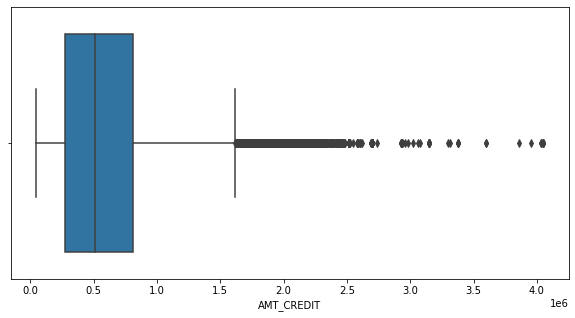

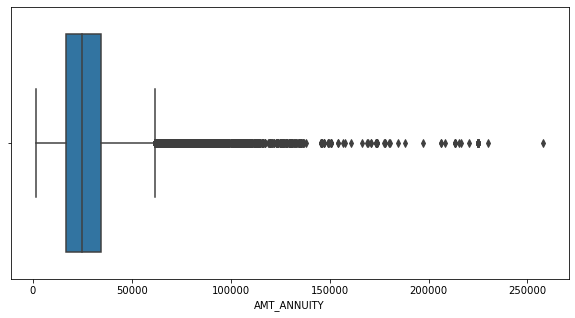

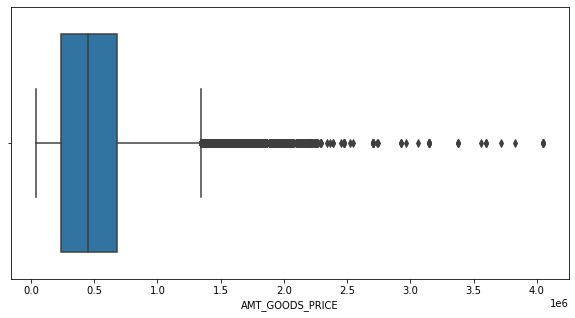

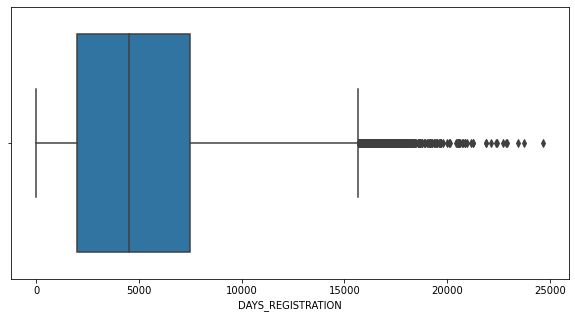

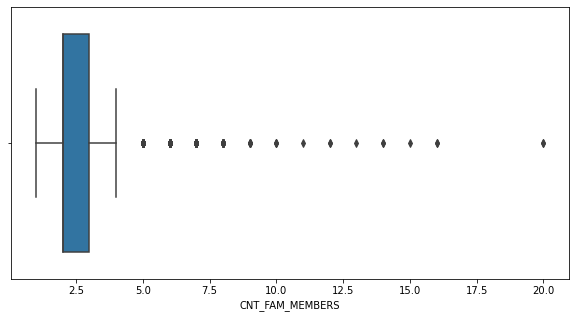

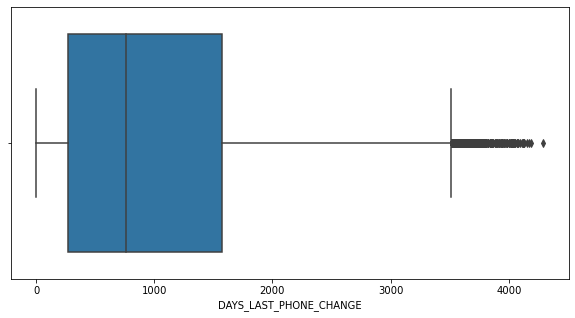

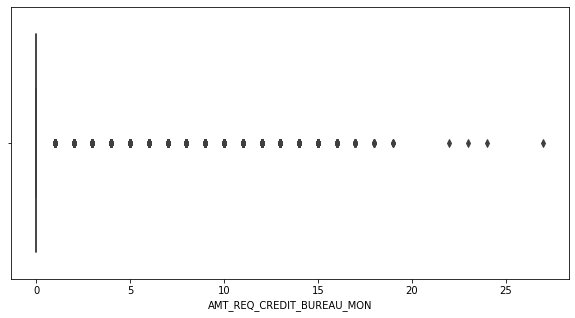

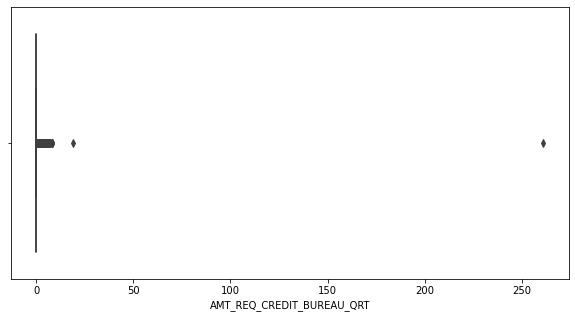

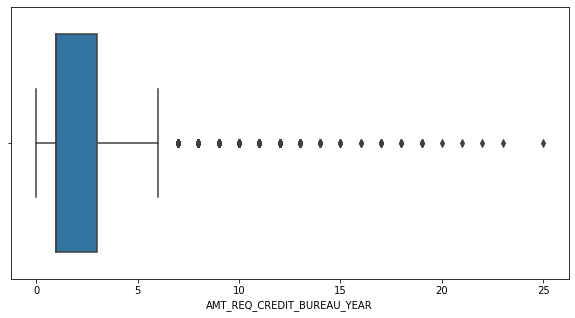

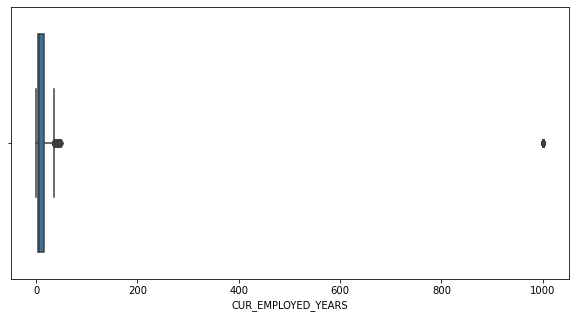

In [58]:
# Creating variable(list) "out" that have header of such columns

out=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_REGISTRATION","CNT_FAM_MEMBERS","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","CUR_EMPLOYED_YEARS"]

# Creating function to Check Outliers

for i in out:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()

##### After seeing these boxplos it is safe to say
-  "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE","CNT_CHILDREN","DAYS_REGISTRATION","CNT_FAM_MEMBERS","AMT_REQ_CREDIT_BUREAU_MON","DAYS_LAST_PHONE_CHANGE" have some number of outliers.
-  "AMT_INCOME_TOTAL" has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
-  "AMT_REQ_CREDIT_BUREAU_QRT"  has huge outliers which indicate this has to be incorrect entry.
-  "AMT_REQ_CREDIT_BUREAU_YEAR" outliers make no sense because thet start from 5 and goes upto 25.
-  "CUR_EMPLOYED_YEARS" has outlier values around 10001 years which is impossible and hence this has to be incorrect entry.

In [59]:
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801             3648.0             2120   
1                    0.003541             1186.0              291   
2                    0.010032             4260.0             2531   
3                    0.008019             9833.0             2437   
4                    0.028663             4311.0             3458   
5                    0.035792             4970.0              477   
6                    0.035792             1213.0              619   
7                    0.003122             4597.0             2379   
8                    0.018634             7427.0             3514   
9                    0.019689            14437.0             3992   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0          

-  Creating new bins columns for these "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE","AGE_YEARS","CUR_EMPLOYED_YEARS" for better understanding

In [60]:
df["AMT_INCOME_TOTAL_BINS"] = pd.cut(df["AMT_INCOME_TOTAL"].div(100000), bins=[0,0.5,1,2,3,4,5,6,7,8,9,10,110000], labels=['0-0.5L','0.5-1L', '1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','10L+'])

df["AMT_CREDIT_BINS"] = pd.cut(df["AMT_CREDIT"].div(100000), bins=[0,0.5,1,2,3,4,5,6,7,8,9,10,110000], labels=['0-0.5L','0.5-1L', '1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','10L+'])

df["AMT_ANNUITY_BINS"] = pd.cut(df["AMT_ANNUITY"].div(1000), bins=[0,10,30,50,70,100,110000], labels=['0-10k','10-30k','30-50k','50-70k','70-1L','1L+'])


df["AMT_GOODS_PRICE_BINS"] = pd.cut(df["AMT_GOODS_PRICE"].div(100000), bins=[0,0.5,1,2,3,4,5,6,7,8,9,10,110000], labels=['0-0.5L','0.5-1L', '1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','10L+'])


df["DAYS_REGISTRATION_BINS"] = pd.cut(df["DAYS_REGISTRATION"].div(365), bins=[0,1,3,5,8,10,15,20,999], labels=['0-1','1-3', '3-5','5-8','8-10','10-15','15-20','20+'])

df["DAYS_ID_PUBLISH_BINS"] = pd.cut(df["DAYS_ID_PUBLISH"].div(365), bins=[0,1,3,5,8,10,15,20], labels=['0-1','1-3','3-5','5-8','8-10','10-15','15-20'])

df["DAYS_LAST_PHONE_CHANGE_BINS"] = pd.cut(df["DAYS_LAST_PHONE_CHANGE"].div(365), bins=[0,1,3,5,8,10,999], labels=['0-1','1-3', '3-5','5-8','8-10','10+'])


df["AGE_GROUP"] = pd.cut(df["AGE_YEARS"], bins=[0,20,30,40,50,60,999], labels=["0-20","20-30","30-40","40-50","50-60","60+"])

df["CUR_EMPLOYED_YEARS_GROUP"] = pd.cut(df["CUR_EMPLOYED_YEARS"], bins=[0,5,10,15,20,25,30,99999], labels=["0-5","5-10","10-15","15-20","20-25","25-30","30+"])

In [61]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801             3648.0             2120   
1                    0.003541             1186.0              291   
2                    0.010032             4260.0             2531   
3                    0.008019             9833.0             2437   
4                    0.028663             4311.0             3458   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                  1134.0                         0.0   
1                  School                   828.0                         0.0   
2              Government                   815.0                         0.0   
3  Busines

In [62]:
# Converting 1 as "Defaulter", 0 as "Repayer" in TARGET column

df.TARGET.replace((1,0),("Defaulter","Repayer"),inplace=True)

df.TARGET.value_counts()

Repayer      282686
Defaulter     24825
Name: TARGET, dtype: int64

###### Now i am Converting  Object columns into categorical column

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  object  
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [64]:
# I have taken out the desired columns for conversion

change_cat=["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]

for col in change_cat:
    df[col] = pd.Categorical(df[col])


In [65]:
df.head()

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002  Defaulter         Cash loans           M            N   
1      100003    Repayer         Cash loans           F            N   
2      100004    Repayer    Revolving loans           M            Y   
3      100006    Repayer         Cash loans           F            N   
4      100007    Repayer         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801             3648.0             2120   
1                    0.003541             1186.0              291   
2                    0.010032             4260.0             2531   
3                    0.008019             9833.0             2437   
4                    0.028663             4311.0             3458   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                  1134.0                         0.0   
1                  School                   828.0                         0.0   
2              Government                   815.0                        

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [67]:
col_null(df).head()

DAYS_LAST_PHONE_CHANGE_BINS    12.250619
CUR_EMPLOYED_YEARS_GROUP        3.171269
DAYS_REGISTRATION_BINS          0.026015
DAYS_ID_PUBLISH_BINS            0.005203
AMT_REQ_CREDIT_BUREAU_MON       0.000000
dtype: float64

-  These null values are not real null values they have value 0.0 and they were left behind so i am going to fill these values according to there bins.

In [68]:
df.DAYS_LAST_PHONE_CHANGE_BINS=df.DAYS_LAST_PHONE_CHANGE_BINS.fillna(("0-1"))

df.CUR_EMPLOYED_YEARS_GROUP=df.CUR_EMPLOYED_YEARS_GROUP.fillna(("0-5"))

df.DAYS_REGISTRATION_BINS=df.DAYS_REGISTRATION_BINS.fillna(("0-1"))

df.DAYS_ID_PUBLISH_BINS=df.DAYS_ID_PUBLISH_BINS.fillna(("0-1"))

##### Calculating Imbalance

In [69]:
#Checking the imbalance percentage 1=="Defaulter",0==Repayer

df.TARGET.value_counts()*100/len(df)

Repayer      91.927118
Defaulter     8.072882
Name: TARGET, dtype: float64

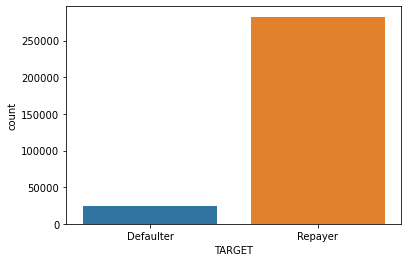

In [70]:
sns.countplot(df.TARGET) 
plt.show()

-  Clearly data is imbalanced

In [71]:
# Since the majority is 0 and minority is 1 

282686/24825

11.387150050352467

##### making sure data is in good shape

In [72]:
col_null(df).head()

SK_ID_CURR                 0.0
TARGET                     0.0
REG_CITY_NOT_LIVE_CITY     0.0
REG_CITY_NOT_WORK_CITY     0.0
LIVE_CITY_NOT_WORK_CITY    0.0
dtype: float64

In [73]:
df.head()

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002  Defaulter         Cash loans           M            N   
1      100003    Repayer         Cash loans           F            N   
2      100004    Repayer    Revolving loans           M            Y   
3      100006    Repayer         Cash loans           F            N   
4      100007    Repayer         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801             3648.0             2120   
1                    0.003541             1186.0              291   
2                    0.010032             4260.0             2531   
3                    0.008019             9833.0             2437   
4                    0.028663             4311.0             3458   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                  1134.0                         0.0   
1                  School                   828.0                         0.0   
2              Government                   815.0                        

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [75]:
df.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307511.000000     3.075110e+05               307511.000000   
mean    27108.487841     5.383163e+05                    0.020868   
std     14493.461065     3.692890e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307511.000000   
mean         4986.120328      2994.202373         2.152664   
std          3522.886321      1509.450419         0.910679   
min             0.000000         0.000000         1.000000   
25%          2010.000000      1720.000000         2.000000   
50%          4504.000000      3254.000000         2.000000   
75%          7479.500000      4299.000000         3.000000   
max         24672.000000      7197.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   
mean                     0.015144                    0.050769   
std                      0.122126                    0.219526   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                307511.000000           307511.000000   
mean                      0.040659                0.078173   
std                       0.197499                0.268444   
min                       0.000000                0.000000   
25%                       0.000000                0.000000   
50%                       0.000000                0.000000   
75%                       0.000000                0.000000   
max                       1.000000                1.000000   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
count           307511.000000            307511.000000   
mean                 0.230454                 0.179555   
std                  0.421124                 0.383817   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max                  1.000000          

In [76]:
df.shape

(307511, 48)

- After Data Cleaning & Manipulation i have 48 columns and move ahead with these columns for Data Analysis

#  Importing, reading & understanding the previous_application.csv

In [77]:
# Importing previous_application.csv as df_pre

df_pre=pd.read_csv("previous_application.csv")

In [78]:
# Checking rows and columns of the raw_data

df_pre.shape

(1670214, 37)

In [79]:
# Checking information of all the columns in df_pre

df_pre.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [80]:
# Checking the numeric variables of the dataframes df_pre

df_pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [81]:
# Reading top 5 rows of the dataframes df_pre

df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

-  There are 37 columns and 1679214 rows.
-  There columns having negative, postive values which includes days. fixing is required

## Data Cleaning & Manipulation

In [82]:
# Checking how many duplicates are present in DataFrame df_pre

df_pre.duplicated().sum()

0

### Finding and treating  null values

In [83]:
# Checking how many null values are present in each of the columns in percentage

col_null(df_pre)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

####  Droping columns that have  null values more than 50%

In [84]:
# Creating a variable high_null for storing null columns having missing values more than 35%

high_null_pre= col_null(df_pre)[col_null(df_pre)>50]
high_null_pre

RATE_INTEREST_PRIVILEGED    99.643698
RATE_INTEREST_PRIMARY       99.643698
AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
dtype: float64

In [85]:
# Droping all the columns that have missing values more than 50% 

df_pre.drop(columns = high_null_pre.index, inplace = True)

In [86]:
col_null(df_pre)

NAME_TYPE_SUITE                49.119754
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR      

In [87]:
# Creating a variable "null_pre" for storing remaining null columns 

null_pre=col_null(df_pre)[col_null(df_pre)>0]
null_pre

NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [88]:
df_pre[null_pre.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
0                    NaN            365243.0             -37.0          -42.0   
1          Unaccompanied            365243.0          365243.0       365243.0   
2        Spouse, partner            365243.0          365243.0       365243.0   
3                    NaN            365243.0            -177.0         -182.0   
4                    NaN                 NaN               NaN            NaN   
...                  ...                 ...               ...            ...   
1670209              NaN            365243.0            -351.0         -358.0   
1670210    Unaccompanied            365243.0           -1297.0        -1304.0   
1670211  Spouse, partner            365243.0           -1181.0        -1187.0   
1670212           Family            365243.0            -817.0         -825.0   
1670213           Family            365243.0            -423.0         -443.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
0                            300.0           -42.0                        0.0   
1                            916.0          -134.0                        1.0   
2                             59.0          -271.0                        1.0   
3                           -152.0          -482.0                        1.0   
4                              NaN             NaN                        NaN   
...                            ...             ...                        ...   
1670209                      362.0          -508.0                        0.0   
1670210                    -1274.0         -1604.0                        0.0   
1670211                    -1187.0         -1457.0                        0.0   
1670212                     -825.0         -1155.0                        1.0   
1670213                      247.0         -1163.0                        0.0   

         AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  \
0                17145.0     1730.430         12.0   
1               607500.0    25188.615         36.0   
2               112500.0    15060.735         12.0   
3               450000.0    47041.335         12.0   
4               337500.0    31924.395         24.0   
...                  ...          ...          ...   
1670209         267295.5    14704.290         30.0   
1670210          87750.0     6622.020         12.0   
1670211         105237.0    11520.855         10.0   
1670212         180000.0    18821.520         12.0   
1670213         360000.0    16431.300         48.0   

                 PRODUCT_COMBINATION  AMT_CREDIT  
0           POS mobile with interest     17145.0  
1                   Cash X-Sell: low    679671.0  
2                  Cash X-Sell: high    136444.5  
3                Cash X-Sell: middle    470790.0  
4                  Cash Street: high    404055.0  
...                              ...         ...  
1670209   POS industry with interest    311400.0  
1670210   POS industry with interest     64291.5  
1670211  POS household with interest    102523.5  
1670212             Cash X-Sell: low    191880.0  
1670213          Cash X-Sell: middle    360000.0  

[1670214 rows x 12 columns]

-  I have to take different approach for different columns due to their nature
-  For columns "NAME_TYPE_SUITE","AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT" we going to imputing appropriate value                         
-  For columns   "NFLAG_INSURED_ON_APPROVAL","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_FIRST_DRAWING","DAYS_TERMINATION" we will keep it as because these columns count days and column "NFLAG_INSURED_ON_APPROVAL" tell us yes or no column changing can lead to wrong conclusion 


In [89]:
# Checking  value count for column "NAME_TYPE_SUITE"

df_pre.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

 -  It's best to use Imputing technique because ~50% data in column can lead to wrong conclusion.

In [90]:
#  Imputing "Unknown" for null values

df_pre["NAME_TYPE_SUITE"] = df_pre["NAME_TYPE_SUITE"].fillna("Unknown")

col_null(df_pre)

NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_TERMINATION               40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_GOODS_CATEGORY             0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR                      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_ST

In [91]:
# Checking  value count for column "AMT_ANNUITY"

df_pre.AMT_ANNUITY.value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [92]:
# Checking  value count for column "AMT_GOODS_PRICE"

df_pre.AMT_GOODS_PRICE.value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [93]:
# Imputing median for columns "AMT_ANNUITY", "AMT_GOODS_PRICE"

df_pre['AMT_ANNUITY'].fillna(df_pre['AMT_ANNUITY'].median(), inplace=True)

df_pre['AMT_GOODS_PRICE'].fillna(df_pre['AMT_GOODS_PRICE'].median(), inplace=True)

In [94]:
# Checking  value count for column "CNT_PAYMENT"

df_pre.CNT_PAYMENT.value_counts().head()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64

In [95]:
# Checking total null values for column "CNT_PAYMENT"

df_pre.CNT_PAYMENT.isnull().sum() 

372230

-  For column "CNT_PAYMENT"  i have 3 option 1. drop the null , 2. replace null with  "12", 3. imput as 0. i am going for last option because as the "NAME_CONTRACT_STATUS" for these indicate that most of these loans were not started and also  if i imput with any other catagory tha value count will be very high and that can lead to wrong conclusion so it's best to avoid that. 

In [96]:
df_pre.loc[df_pre['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [97]:
# Imputing null values as 0

df_pre['CNT_PAYMENT'].fillna(0,inplace = True)

In [98]:
# Checking  value count for column "PRODUCT_COMBINATION"

df_pre.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [99]:
# Checking  null value count for column "PRODUCT_COMBINATION"

df_pre.PRODUCT_COMBINATION.isnull().sum()

346

In [100]:
# Checking mode for "PRODUCT_COMBINATION"

df_pre.PRODUCT_COMBINATION.mode()[0]

'Cash'

In [101]:
# Imputing null values with mode 

df_pre.PRODUCT_COMBINATION.fillna(df_pre.PRODUCT_COMBINATION.mode()[0],inplace=True)

In [102]:
# Checking  value count for column "AMT_CREDIT"

df_pre.AMT_CREDIT.value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

In [103]:
# Checking  null value count for column "AMT_CREDIT"

df_pre.AMT_CREDIT.isnull().sum()

1

In [104]:
df_pre.AMT_CREDIT.mode()[0]

0.0

In [105]:
# Imputing null values with mode 

df_pre.AMT_CREDIT.fillna(df_pre.AMT_CREDIT.mode()[0],inplace=True)

In [106]:
col_null(df_pre)

NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
NAME_CLIENT_TYPE                0.000000
PRODUCT_COMBINATION             0.000000
NAME_YIELD_GROUP                0.000000
CNT_PAYMENT                     0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_P

In [107]:
df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP          Unknown   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP          Unknown   
4           -781  Cash through the bank                 HC          Unknown   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

-  It's looks like there are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So i am going to replace "XNA" with "Unknown" because "XNA" is bit confusing.
-  Also there are some columns where the value is mentioned as 'XAP' which means 'Not applicable'. So i am going to replace "XAP" with "Not_applicable" because "XAP" is bit confusing.

In [108]:
df_pre.replace("XNA","Unknown",inplace=True)

In [109]:
df_pre.replace("XAP","Not_applicable",inplace=True)

In [110]:
df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1         Not_applicable             Approved   
1                       1                Unknown             Approved   
2                       1                Unknown             Approved   
3                       1                Unknown             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank     Not_applicable          Unknown   
1           -164                Unknown     Not_applicable    Unaccompanied   
2           -301  Cash through the bank     Not_applicable  Spouse, partner   
3           -512  Cash through the bank     Not_applicable          Unknown   
4           -781  Cash through the bank                 HC          Unknown   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS           Unknown   
1         Repeater             Unknown           Cash            x-sell   
2         Repeater             Unknown           Cash            x-sell   
3         Repeater             Unknown           Cash            x-sell   
4         Repeater             Unknown           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1              Unknown   
2  Credit and cash offices                -1              Unknown   
3  Credit and cash offices                -1              Unknown   
4  Credit and cash offices                -1              Unknown   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

### Unwanted columns in dataFrame df_pre

- These columns are unwnted ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [111]:
# Droping unwanted columns 

df_pre.drop( ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0         Not_applicable             Approved   
1    679671.0         607500.0                Unknown             Approved   
2    136444.5         112500.0                Unknown             Approved   
3    470790.0         450000.0                Unknown             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank     Not_applicable          Unknown   
1           -164                Unknown     Not_applicable    Unaccompanied   
2           -301  Cash through the bank     Not_applicable  Spouse, partner   
3           -512  Cash through the bank     Not_applicable          Unknown   
4           -781  Cash through the bank                 HC          Unknown   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS           Unknown   
1         Repeater             Unknown           Cash            x-sell   
2         Repeater             Unknown           Cash            x-sell   
3         Repeater             Unknown           Cash            x-sell   
4         Repeater             Unknown           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1              Unknown   
2  Credit and cash offices                -1              Unknown   
3  Credit and cash offices                -1              Unknown   
4  Credit and cash offices                -1              Unknown   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

In [112]:
df_pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670214e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961139e+05     2.011815e+05  -8.806797e+02      3.139511e+02   
std    3.185746e+05     2.808629e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00  -2.922000e+03     -1.000000e+00   
25%    2.416050e+04     6.750000e+04  -1.300000e+03     -1.000000e+00   
50%    8.054100e+04     1.123200e+05  -5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05  -2.800000e+02      8.200000e+01   
max    6.905160e+06     6.905160e+06  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342209.855039    13826.269337   
std    1.447588e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    0.000000e+00       365243.000000    -1628.000000   
50%    1.000000e+01       365243.000000     -831.000000   
75%    1.600000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

-  There are some columns with negative values in day

In [113]:
# To convert negative days to postive days creating a varaible "p_neg"

p_neg = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

In [114]:
df_pre[p_neg]=abs(df_pre[p_neg])
df_pre[p_neg]

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                   73            365243.0            42.0   
1                  164            365243.0           134.0   
2                  301            365243.0           271.0   
3                  512            365243.0           482.0   
4                  781                 NaN             NaN   
...                ...                 ...             ...   
1670209            544            365243.0           508.0   
1670210           1694            365243.0          1604.0   
1670211           1488            365243.0          1457.0   
1670212           1185            365243.0          1155.0   
1670213           1193            365243.0          1163.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                            300.0           42.0              37.0  
1                            916.0       365243.0          365243.0  
2                             59.0       365243.0          365243.0  
3                            152.0          182.0             177.0  
4                              NaN            NaN               NaN  
...                            ...            ...               ...  
1670209                      362.0          358.0             351.0  
1670210                     1274.0         1304.0            1297.0  
1670211                     1187.0         1187.0            1181.0  
1670212                      825.0          825.0             817.0  
1670213                      247.0          443.0             423.0  

[1670214 rows x 6 columns]

-  There is another column with negative values "SELLERPLACE_AREA"

In [115]:
# Checking  value count for column "SELLERPLACE_AREA"

df_pre.SELLERPLACE_AREA.value_counts()

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 1014         1
 1256         1
 677          1
 7518         1
 1446         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

-  I am not gonna change nagative values of this column

### Finding outliers

In [116]:
df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0         Not_applicable             Approved   
1    679671.0         607500.0                Unknown             Approved   
2    136444.5         112500.0                Unknown             Approved   
3    470790.0         450000.0                Unknown             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0             73  Cash through the bank     Not_applicable          Unknown   
1            164                Unknown     Not_applicable    Unaccompanied   
2            301  Cash through the bank     Not_applicable  Spouse, partner   
3            512  Cash through the bank     Not_applicable          Unknown   
4            781  Cash through the bank                 HC          Unknown   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS           Unknown   
1         Repeater             Unknown           Cash            x-sell   
2         Repeater             Unknown           Cash            x-sell   
3         Repeater             Unknown           Cash            x-sell   
4         Repeater             Unknown           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1              Unknown   
2  Credit and cash offices                -1              Unknown   
3  Credit and cash offices                -1              Unknown   
4  Credit and cash offices                -1              Unknown   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            42.0                      300.0           42.0              37.0   
1           134.0                      916.0       365243.0          365243.0   
2           271.0                       59.0       365243.0          365243.0   
3           482.0                      152.0          182.0             177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

In [117]:
df_pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670214e+06     1.670214e+06   1.670214e+06      1.670214e+06   
mean   1.961139e+05     2.011815e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     2.808629e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     6.750000e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     1.123200e+05   5.810000e+02      3.000000e+00   
75%    2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342340.056543    15949.224065   
std    1.447588e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    0.000000e+00       365243.000000      475.000000   
50%    1.000000e+01       365243.000000      921.000000   
75%    1.600000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

-  from describe i could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense also if difference b/w mean and 50 percentile is high than it is possible to have Outliers
-  Its looks like most of these columns have outliers 
-  Such columns are 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','SELLERPLACE_AREA',
'CNT_PAYMENT'

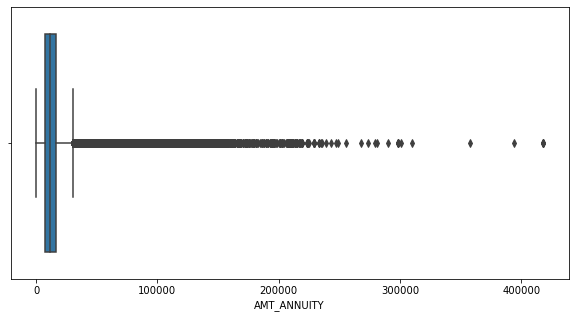

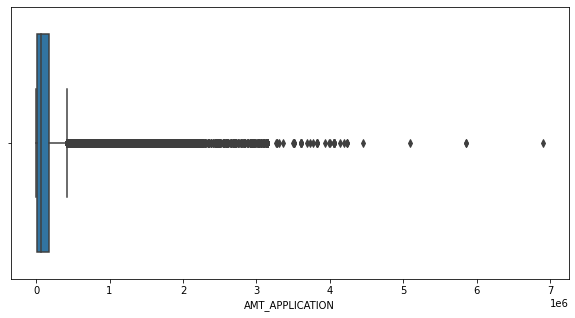

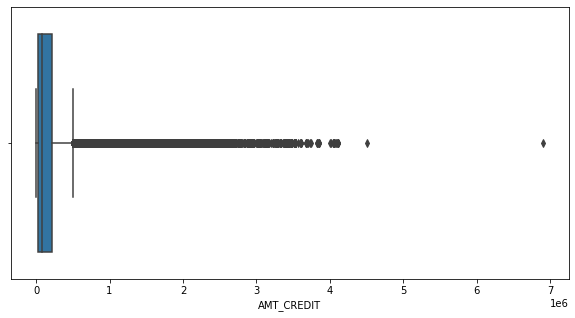

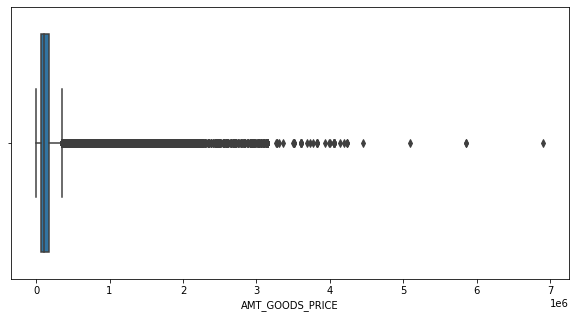

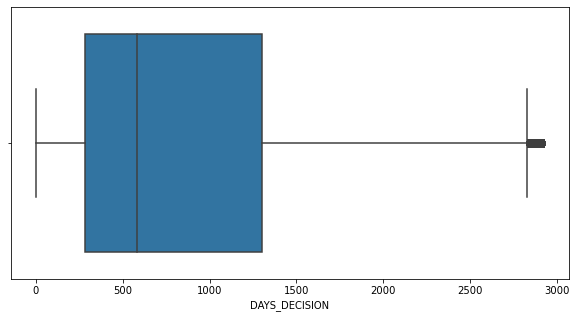

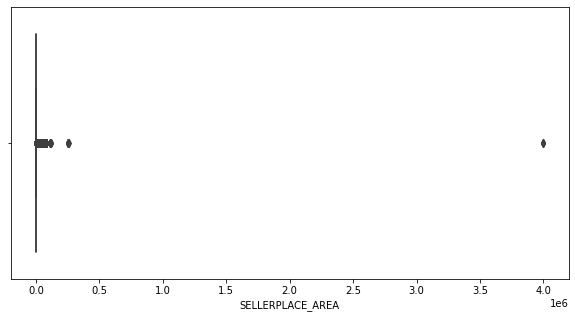

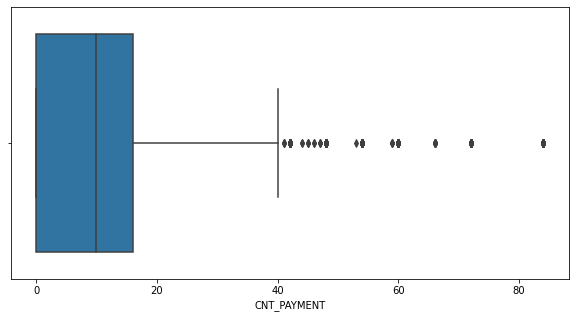

In [118]:
# Creating variable(list) "out" that have header of such columns

out=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']

     # Creating function to Check Outliers

for i in out:
    plt.figure(figsize=(10,5))
    sns.boxplot(df_pre[i])
    plt.show()

-  It can be seen that

-  AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
-  CNT_PAYMENT has few outlier values.
-  DAYS_DECISION has little number of outliers.

In [119]:

df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0         Not_applicable             Approved   
1    679671.0         607500.0                Unknown             Approved   
2    136444.5         112500.0                Unknown             Approved   
3    470790.0         450000.0                Unknown             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0             73  Cash through the bank     Not_applicable          Unknown   
1            164                Unknown     Not_applicable    Unaccompanied   
2            301  Cash through the bank     Not_applicable  Spouse, partner   
3            512  Cash through the bank     Not_applicable          Unknown   
4            781  Cash through the bank                 HC          Unknown   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS           Unknown   
1         Repeater             Unknown           Cash            x-sell   
2         Repeater             Unknown           Cash            x-sell   
3         Repeater             Unknown           Cash            x-sell   
4         Repeater             Unknown           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1              Unknown   
2  Credit and cash offices                -1              Unknown   
3  Credit and cash offices                -1              Unknown   
4  Credit and cash offices                -1              Unknown   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            42.0                      300.0           42.0              37.0   
1           134.0                      916.0       365243.0          365243.0   
2           271.0                       59.0       365243.0          365243.0   
3           482.0                      152.0          182.0             177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN

In [120]:
# Checking  value count for column "DAYS_DECISION"

df_pre.DAYS_DECISION.value_counts().sort_index()

1          2
2       1172
3       1516
4       1507
5       1324
        ... 
2918     185
2919     171
2920     168
2921     158
2922     162
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [121]:
# Days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7+"]
df_pre['YEARLY_DECISION'] = pd.cut(df_pre['DAYS_DECISION'],bins,labels=slots)


In [122]:
df_pre['YEARLY_DECISION'].value_counts(normalize=True)*100

1     34.351287
2     23.056806
3     12.855598
4      7.883181
5      6.128556
7      5.813806
7+     5.060729
6      4.850037
Name: YEARLY_DECISION, dtype: float64

-  Approx 35% loan applicatants have applied for a new loan within 1 year of previous loan decision

In [123]:
# I have taken out the desired columns for conversion

change_cat_pre=["NAME_CONTRACT_TYPE","NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","YEARLY_DECISION"]

for col in change_cat_pre:
    df_pre[col] = pd.Categorical(df_pre[col])

# Data Analysis for df

In [124]:
# Defaulter data in df

df_tar_def=df[df.TARGET=="Defaulter"] 
df_tar_def.head()

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002  Defaulter         Cash loans           M            N   
26      100031  Defaulter         Cash loans           F            N   
40      100047  Defaulter         Cash loans           M            N   
42      100049  Defaulter         Cash loans           F            N   
81      100096  Defaulter         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                     0.018801             3648.0             2120   
26                    0.018029             6573.0             1827   
40                    0.025164             1182.0             1029   
42                    0.007305               45.0             4409   
81                    0.028663             5391.0             4199   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         Laborers              1.0                     2   
26   Cooking staff              1.0                     3   
40        Laborers              2.0                     2   
42     Sales staff              2.0                     3   
81         Unknown              2.0                     2   

    REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                             2                           0   
26                            2                           0   
40                            2                           0   
42                            3                           0   
81                            2                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

         ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
0   Business Entity Type 3                  1134.0   
26  Business Entity Type 3                   161.0   
40  Business Entity Type 3                  1075.0   
42           Self

In [125]:
# Repayer data in df

df_tar_rep=df[df.TARGET=="Repayer"] 
df_tar_rep.head()

SK_ID_CURR   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003  Repayer         Cash loans           F            N   
2      100004  Repayer    Revolving loans           M            Y   
3      100006  Repayer         Cash loans           F            N   
4      100007  Repayer         Cash loans           M            N   
5      100008  Repayer         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1                    0.003541             1186.0              291   
2                    0.010032             4260.0             2531   
3                    0.008019             9833.0             2437   
4                    0.028663             4311.0             3458   
5                    0.035792             4970.0              477   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   
5        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   
5                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1                  School                   828.0                         0.0   
2              Government                   815.0                         0.0   
3  Business Entity Type 3                   617.0                         0.0  

In [126]:
# all numerical columns in df

num_columns=["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",'REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',"AGE_YEARS","CUR_EMPLOYED_YEARS"]

# all categorical columns in df

cat_columns=[ 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','AMT_INCOME_TOTAL_BINS','AMT_CREDIT_BINS','AMT_ANNUITY_BINS','AMT_GOODS_PRICE_BINS','DAYS_REGISTRATION_BINS','DAYS_ID_PUBLISH_BINS','DAYS_LAST_PHONE_CHANGE_BINS','AGE_GROUP','CUR_EMPLOYED_YEARS_GROUP',]

- I am going to Analysis all numerical and category at one's after that i will get some insight and after that i will plot chart if necessary.

### Univariate analysis and Bivariate Analysis

##### Numerical columns Analysis for df

-  For this i am ploting histogram,distplot and boxplot although i already ploted boxplot for outliers so i am not going to plot boxplot.

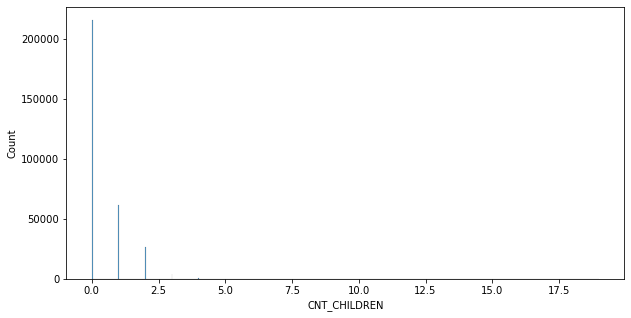

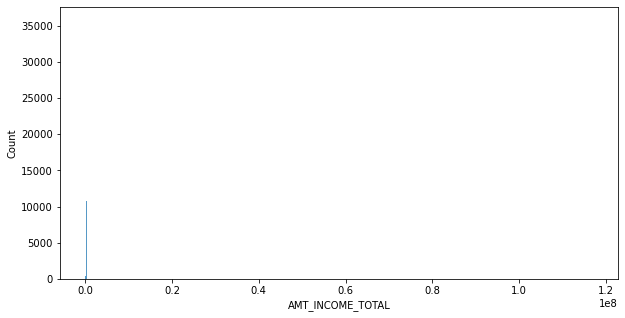

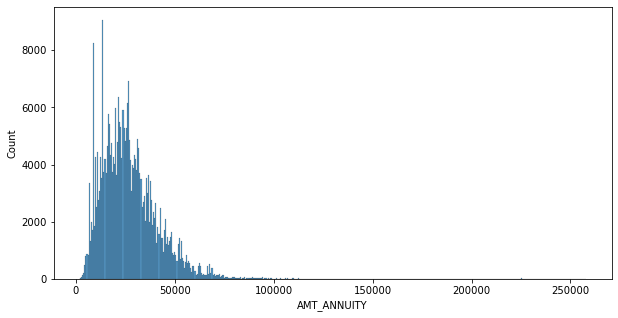

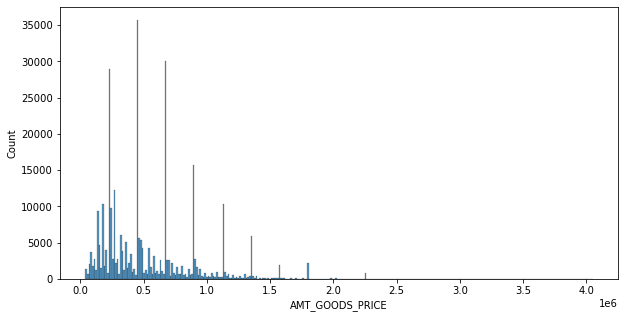

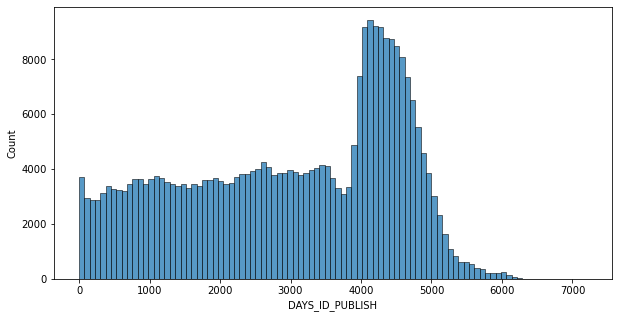

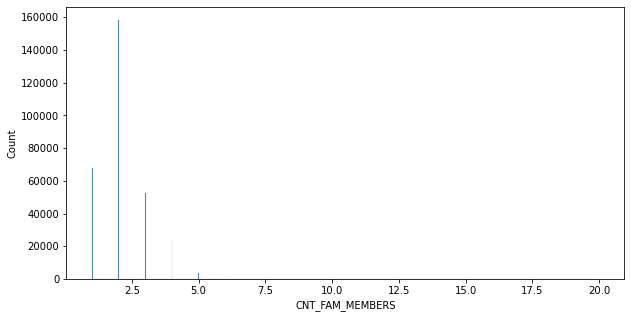

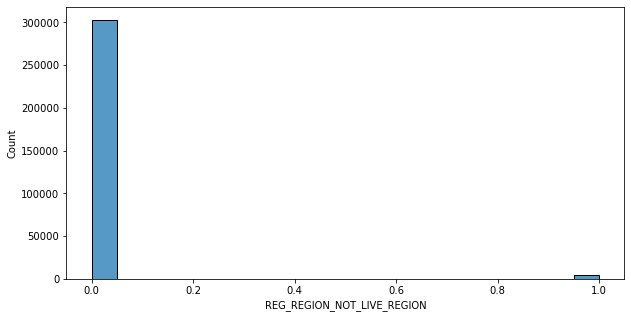

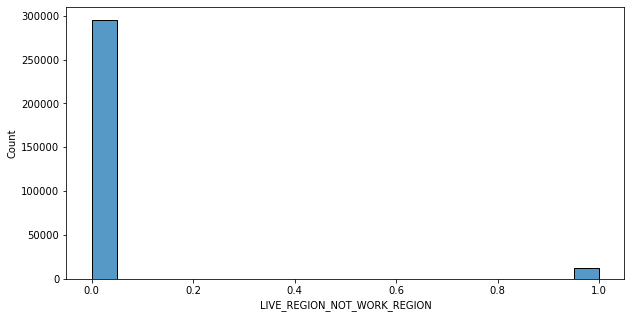

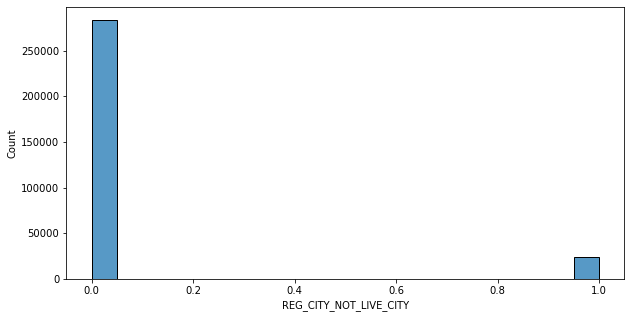

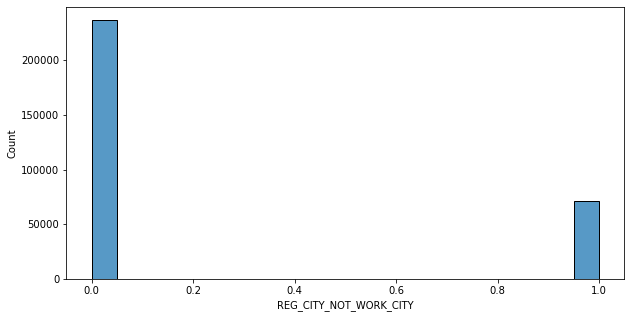

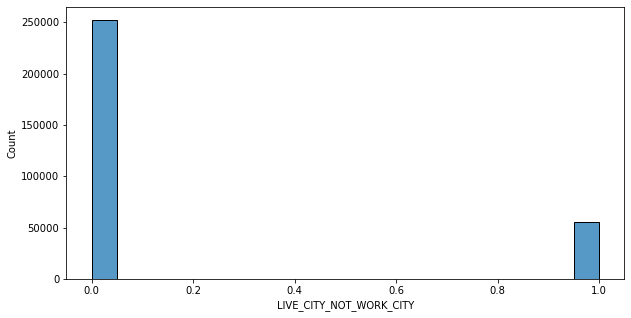

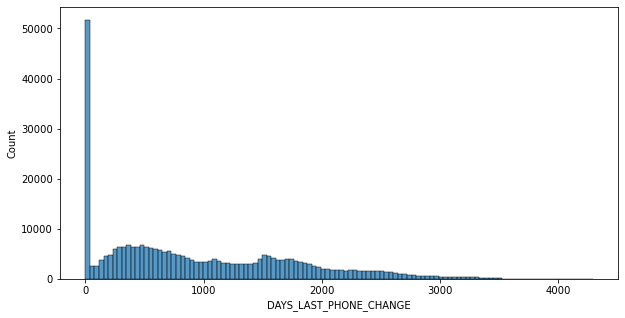

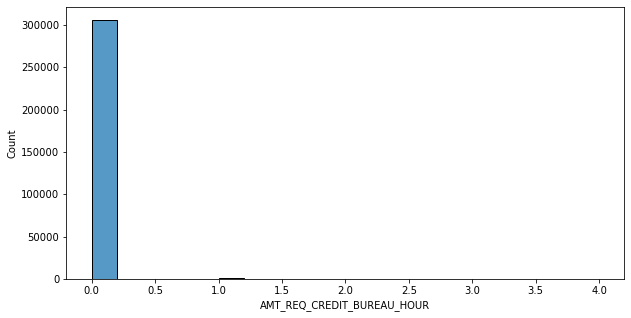

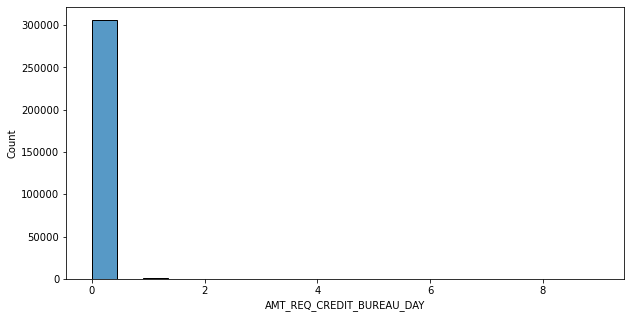

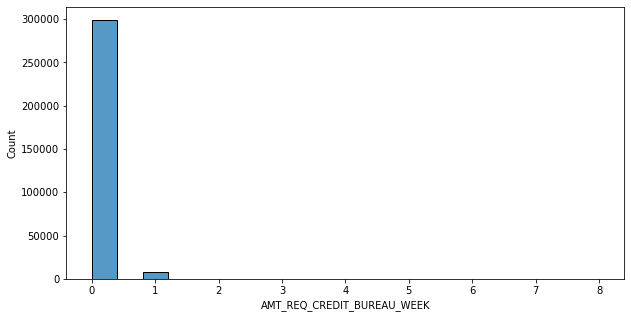

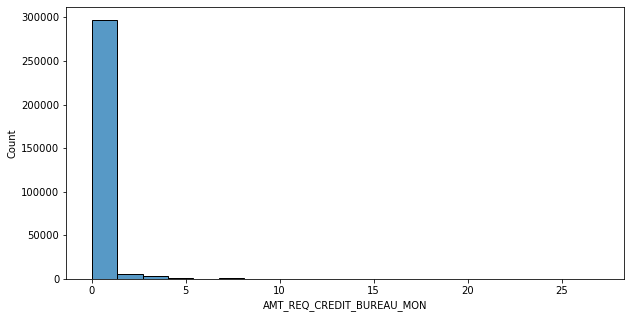

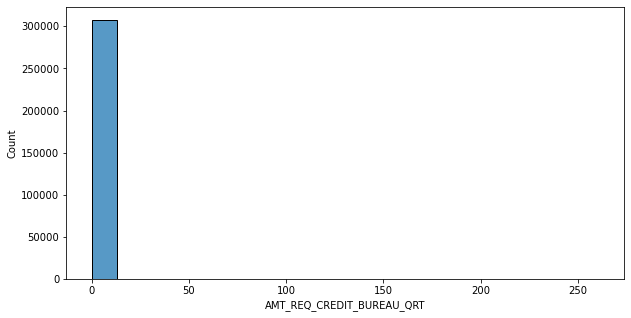

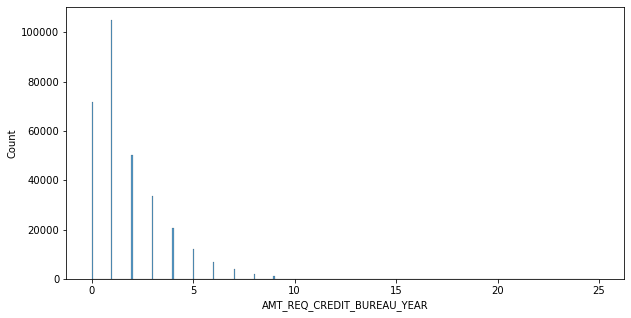

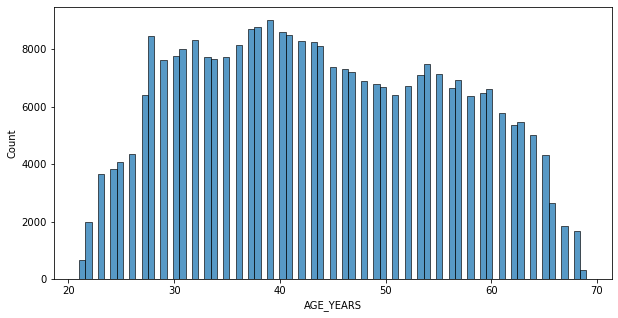

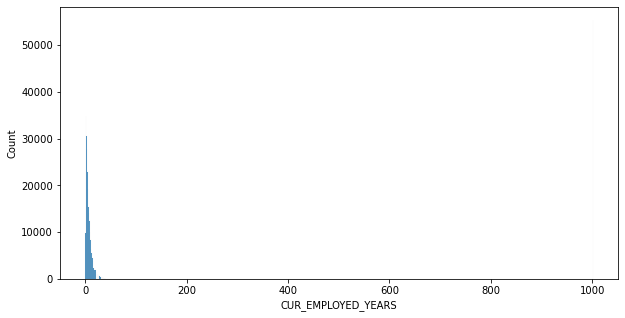

In [127]:
# Ploting histogram for all Numerical columns in df

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col])
    plt.show()

In [128]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

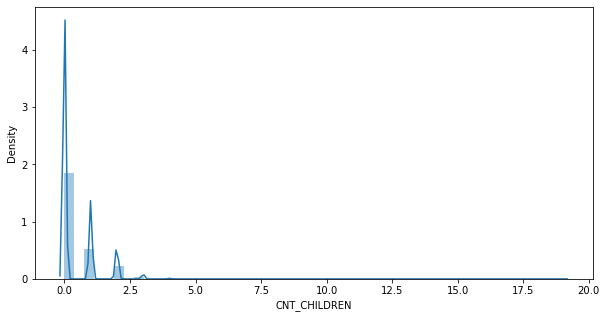

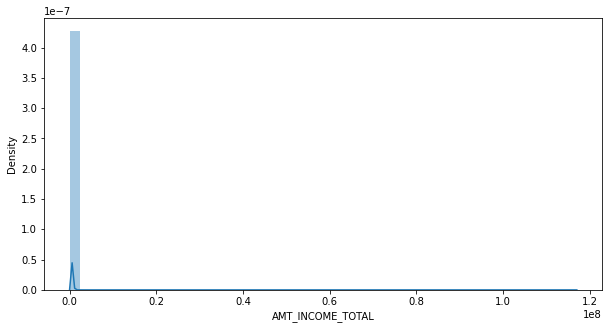

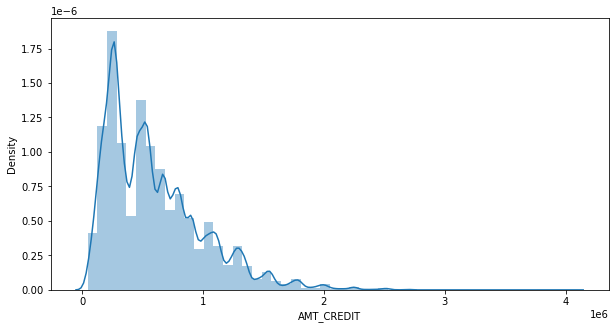

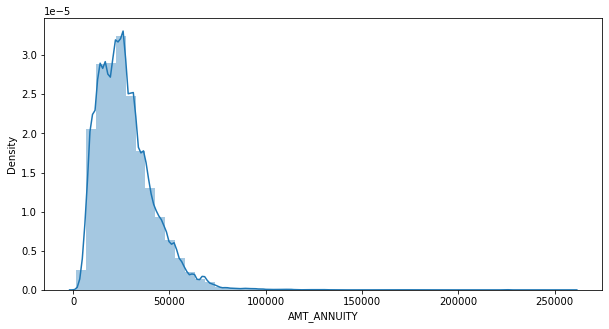

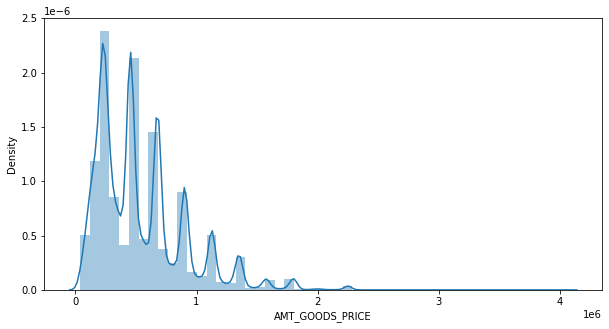

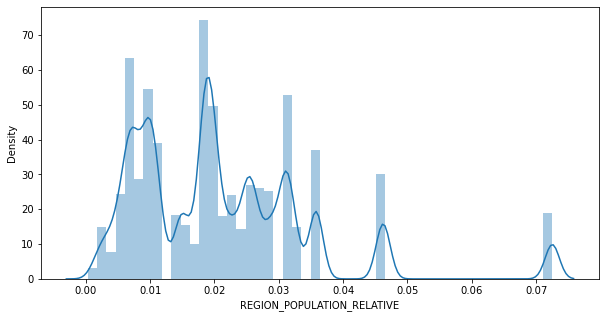

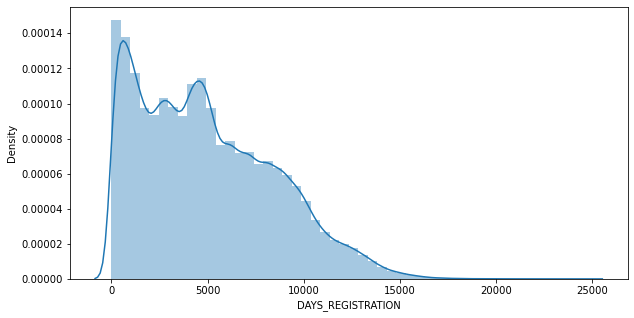

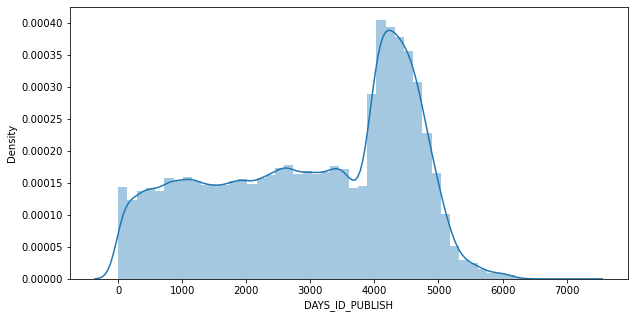

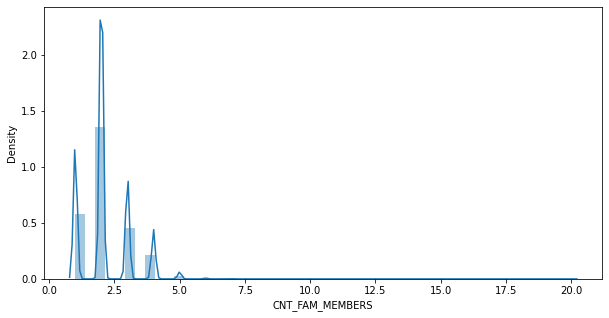

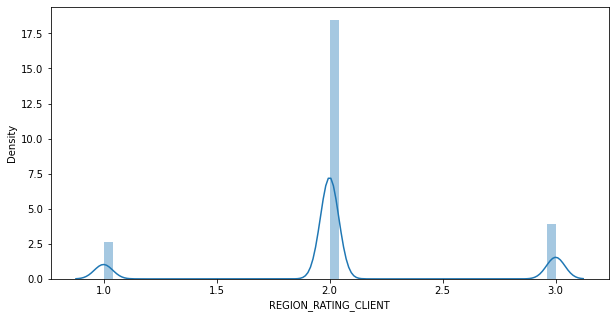

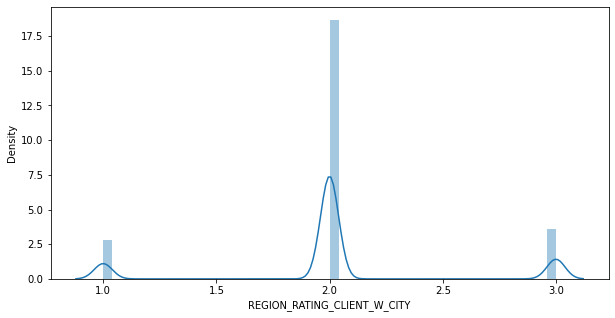

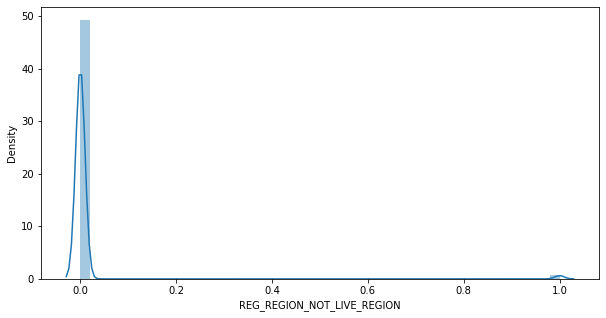

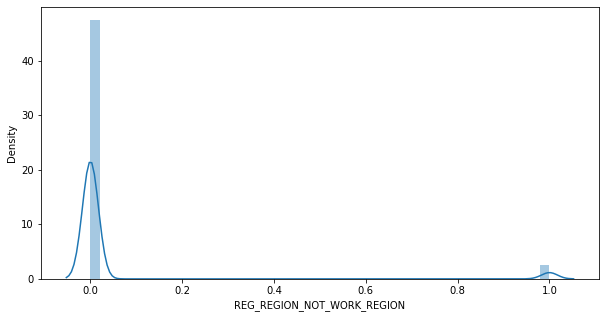

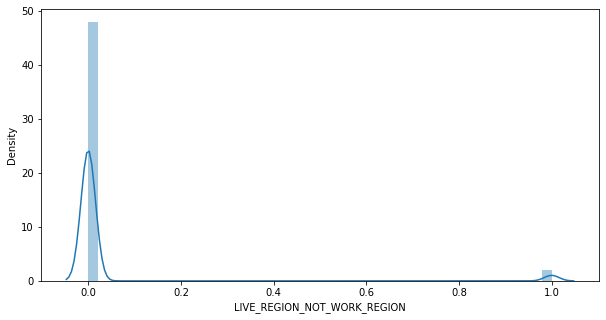

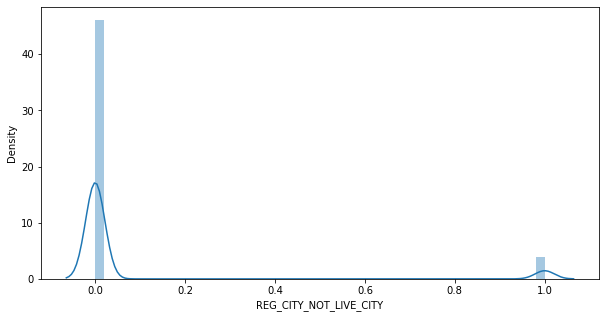

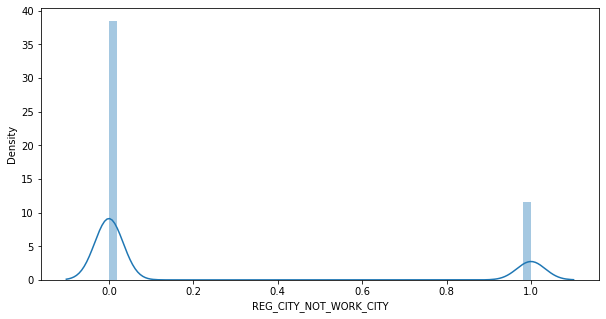

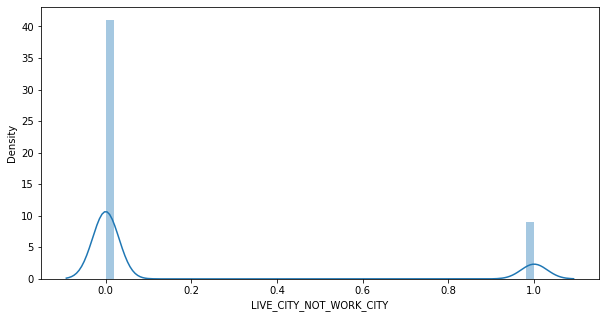

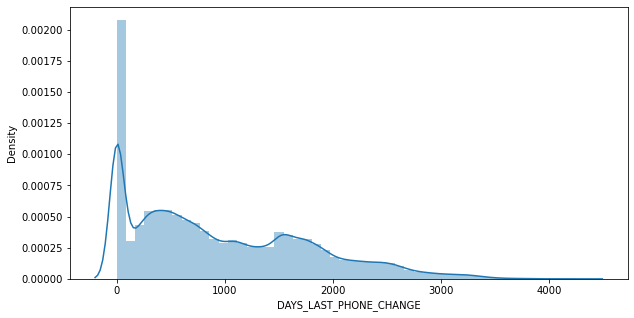

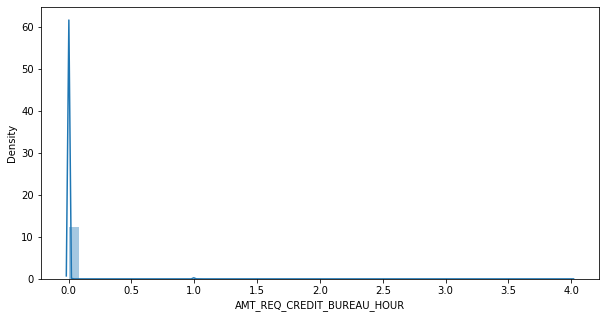

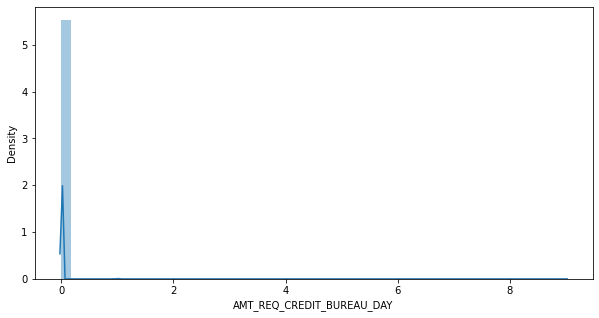

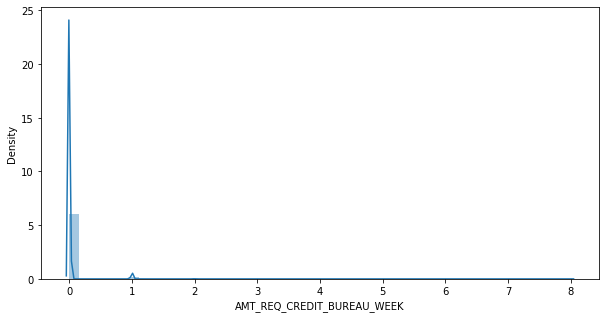

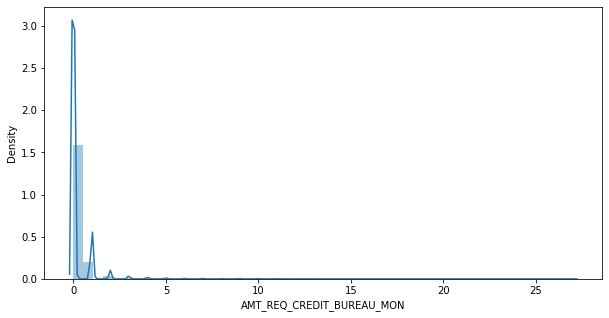

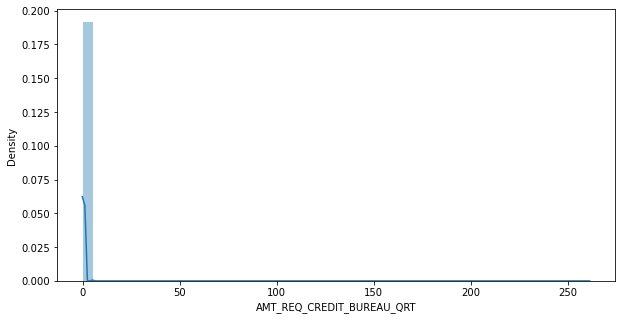

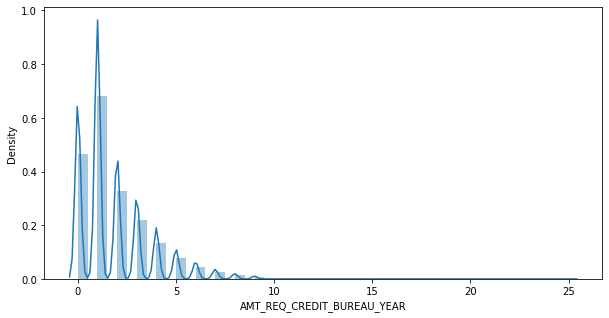

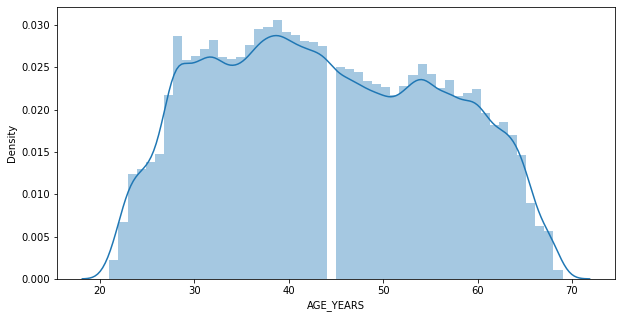

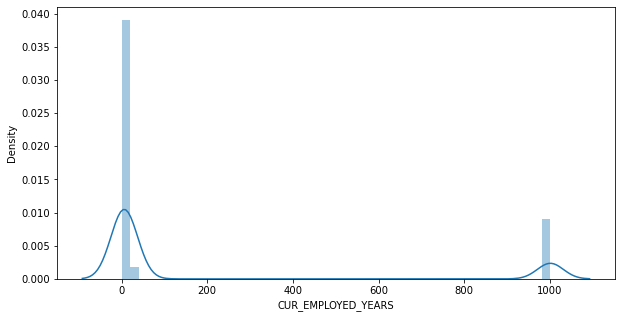

In [129]:
# Ploting distplot for all Numerical columns in df

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col])
    plt.show()

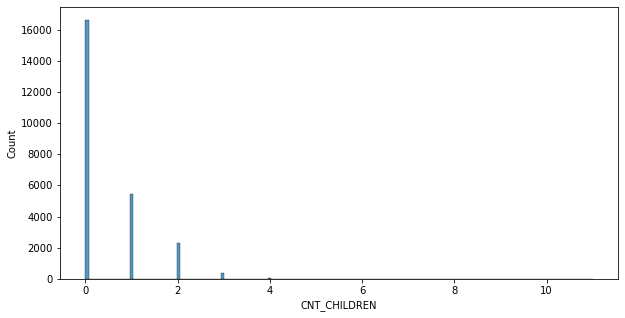

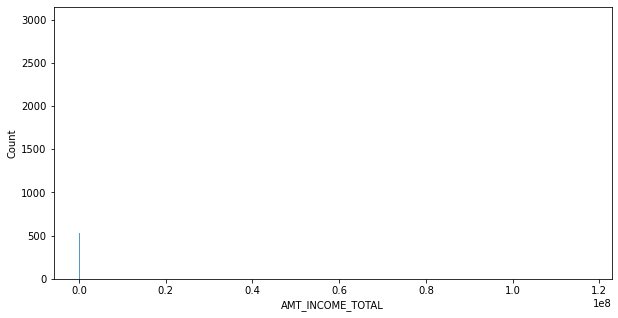

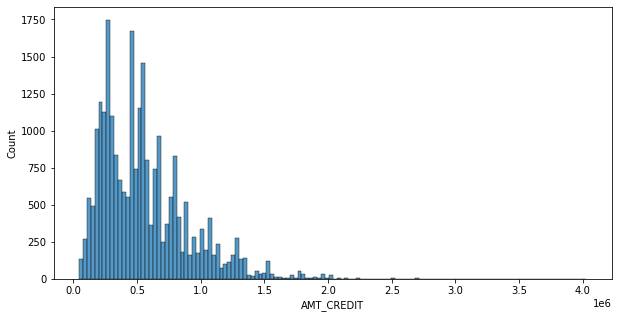

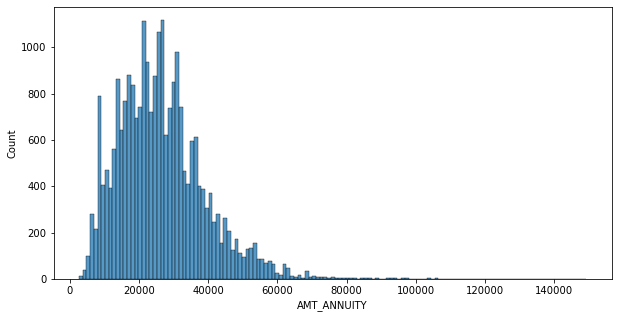

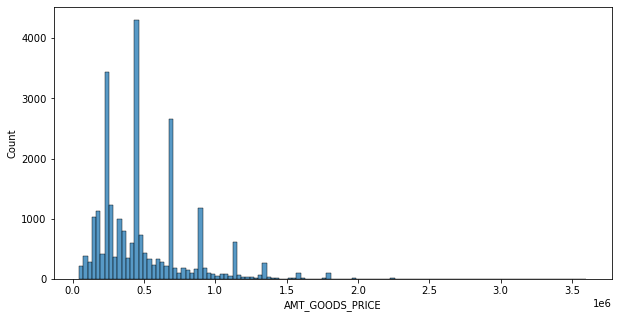

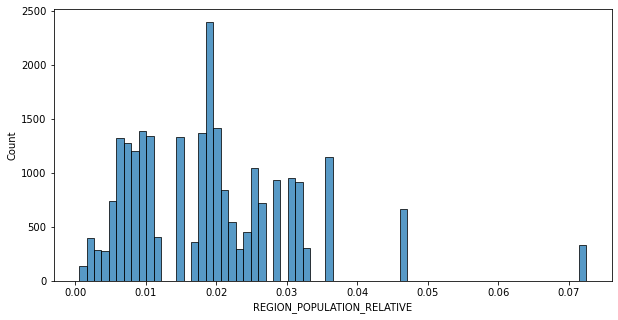

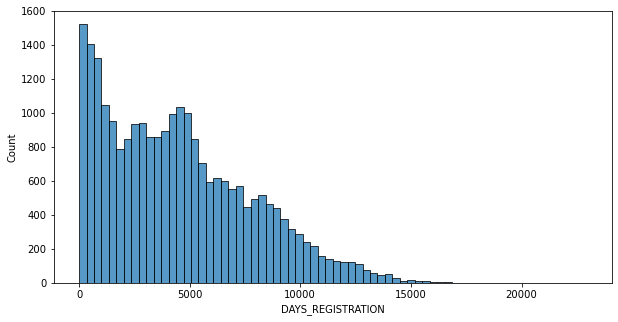

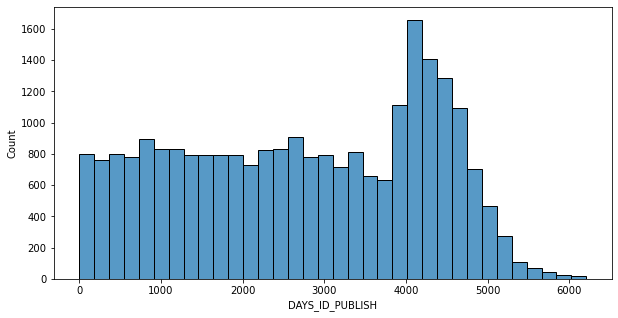

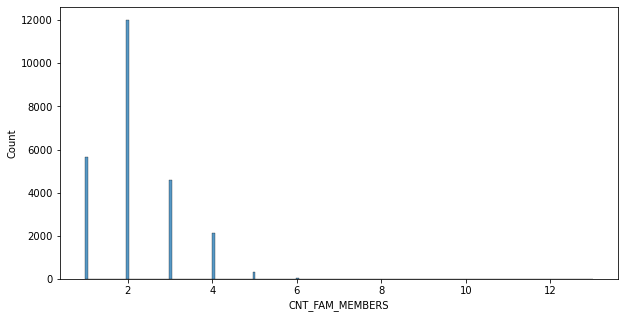

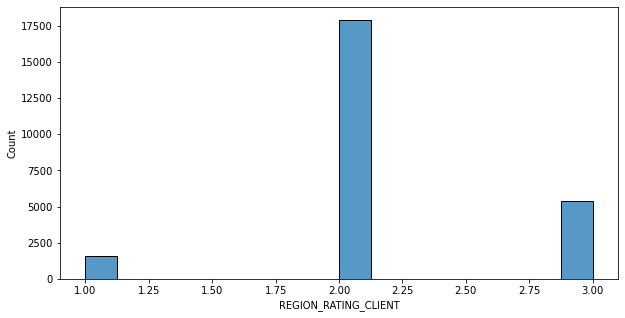

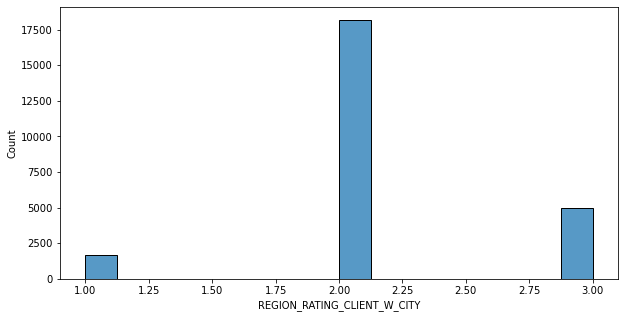

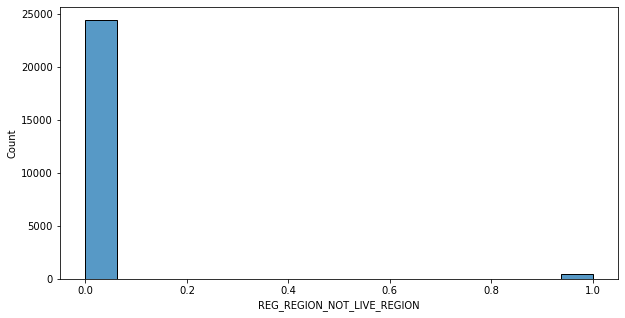

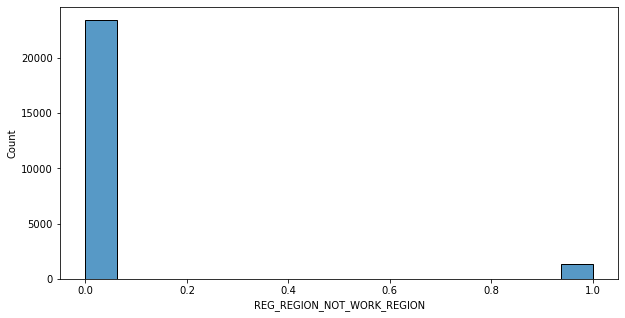

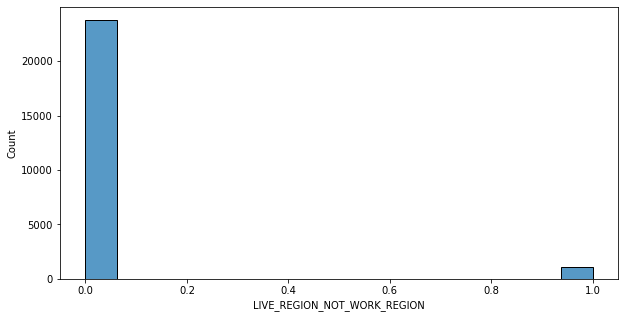

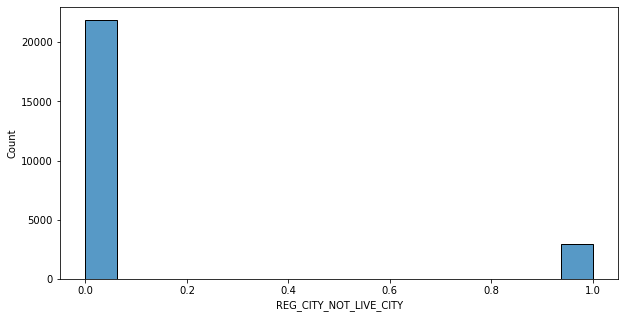

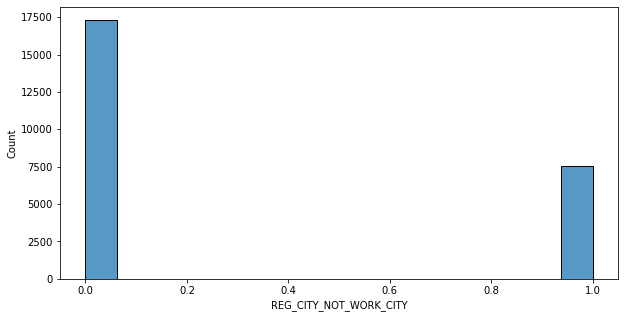

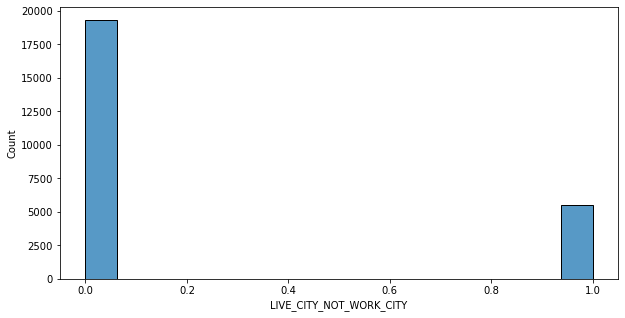

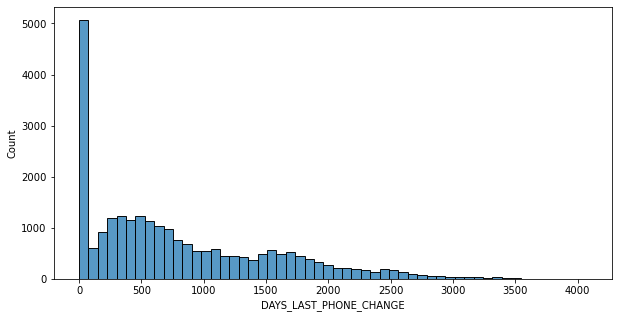

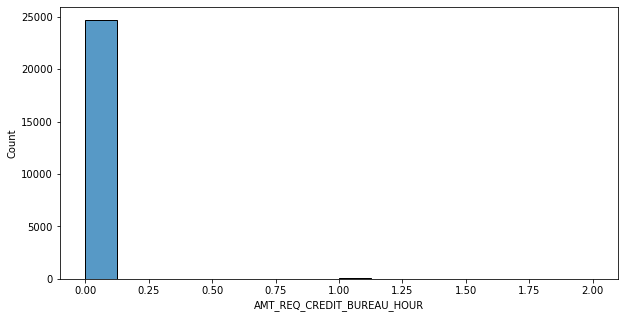

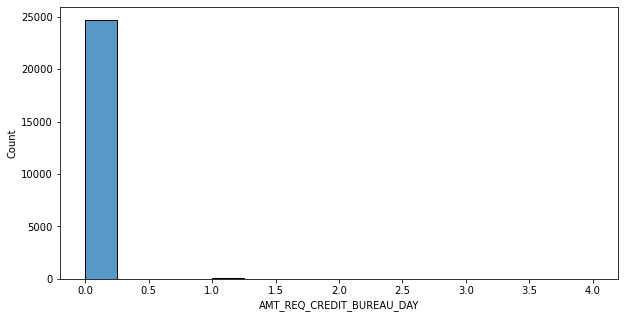

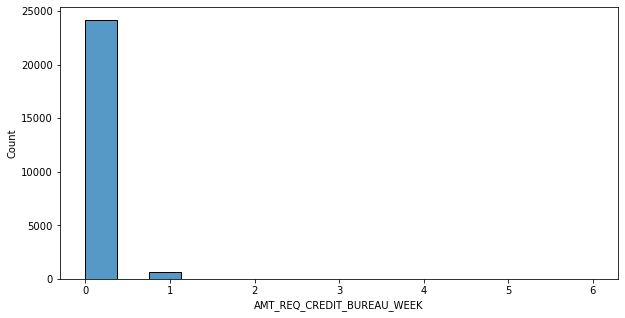

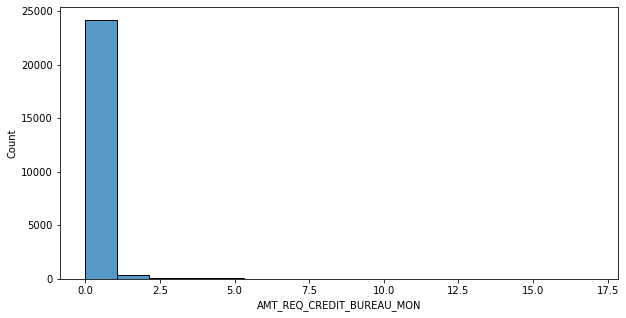

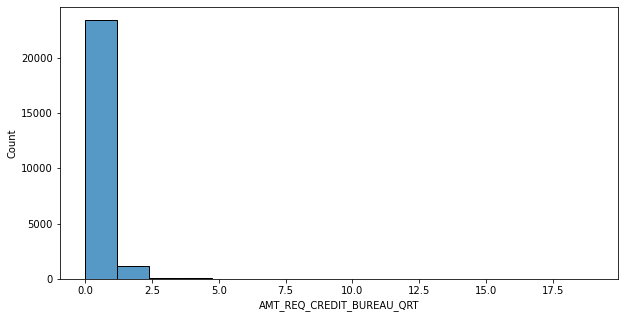

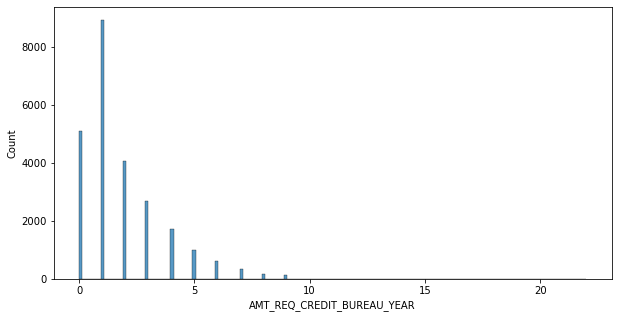

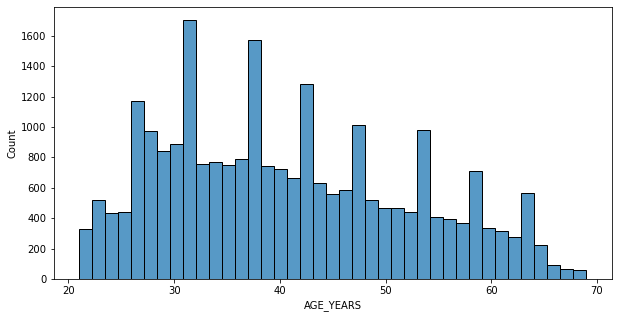

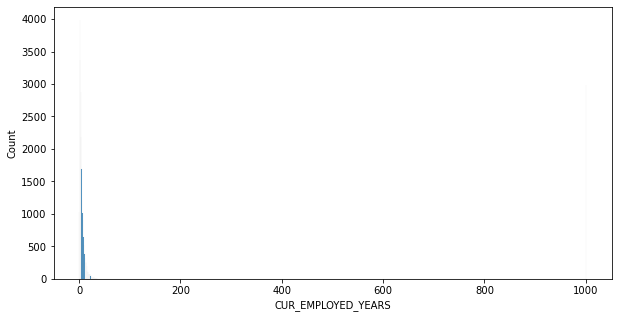

In [130]:
# Ploting histogram for all Numerical columns in df_tar_def (Defaulter)

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df_tar_def[col])
    plt.show()

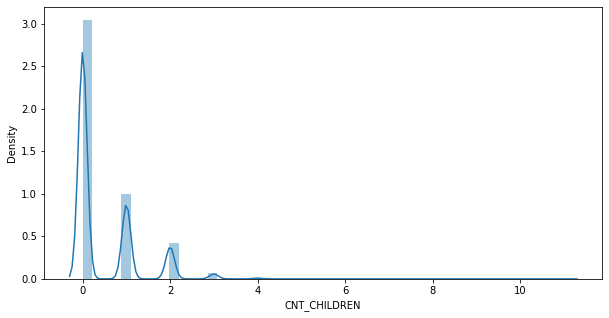

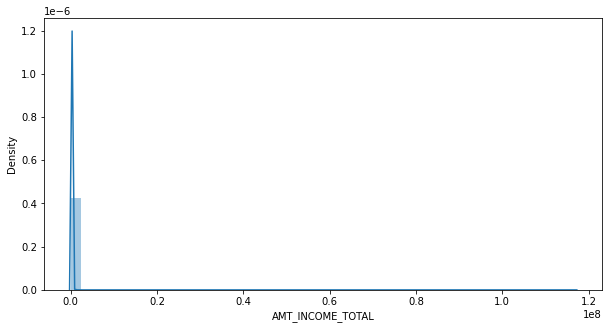

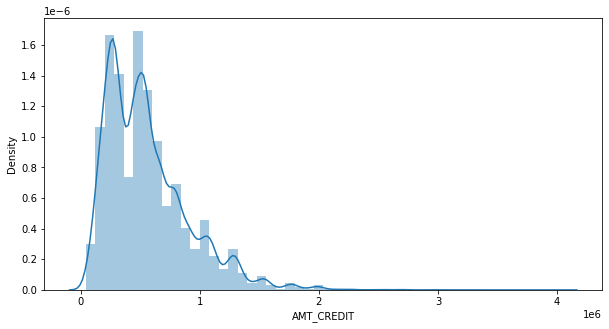

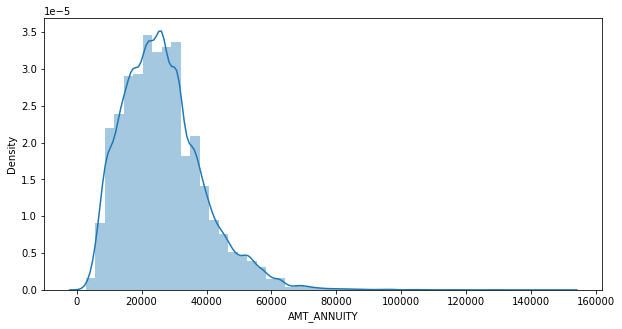

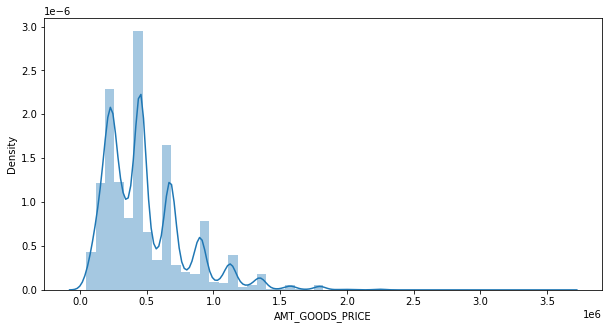

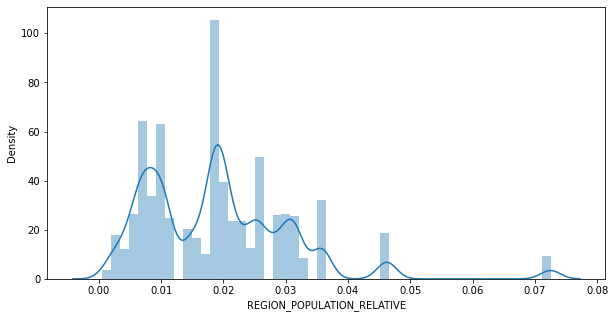

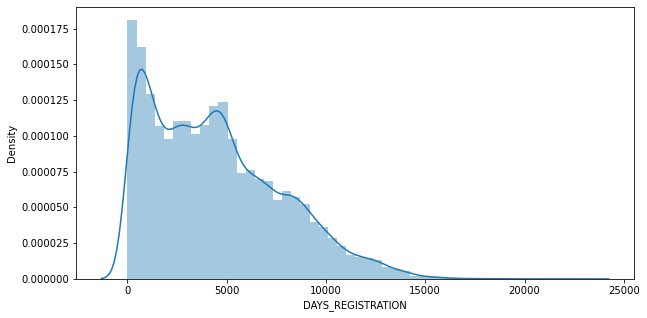

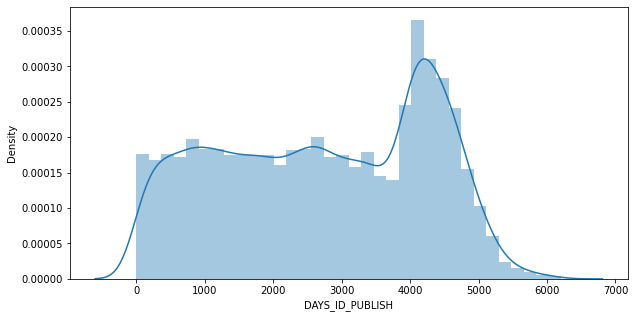

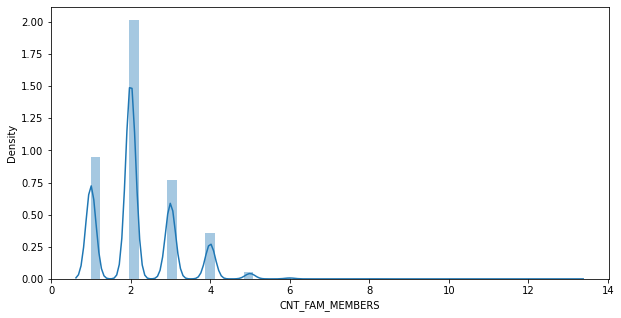

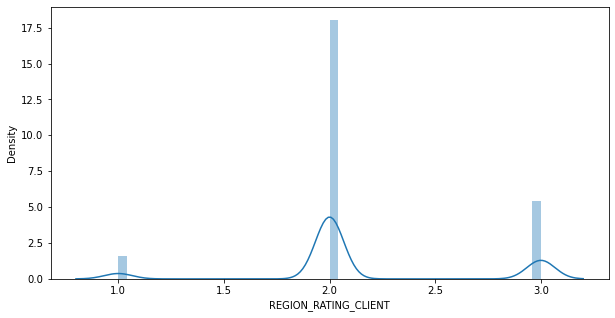

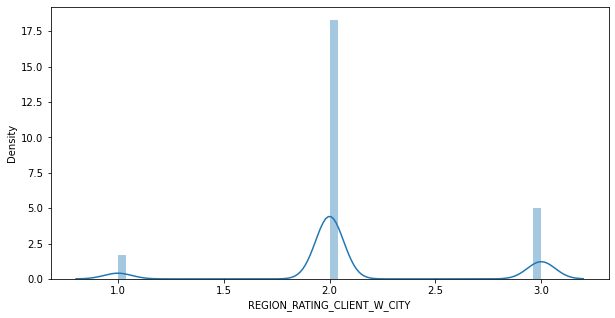

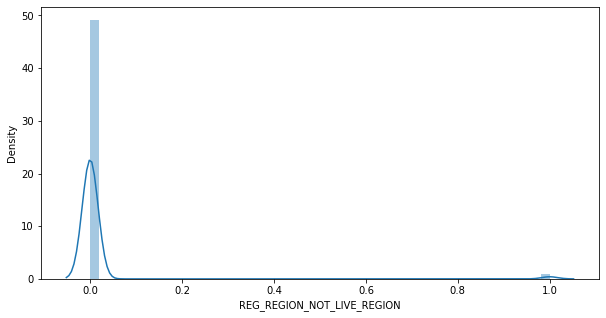

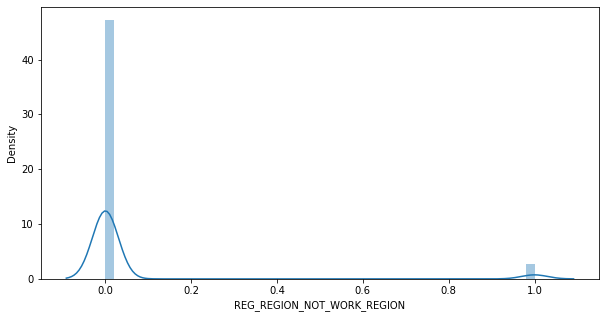

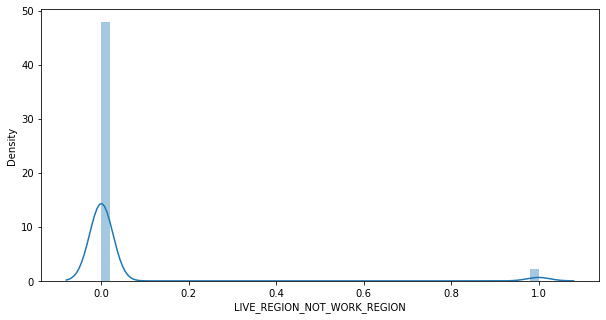

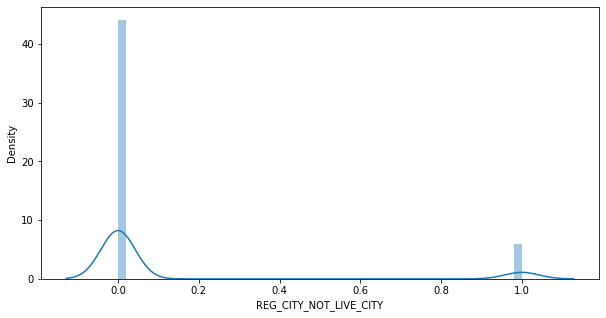

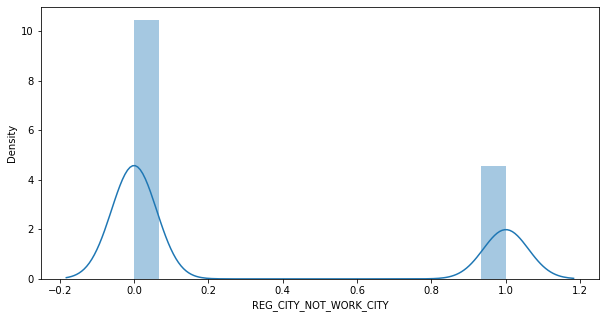

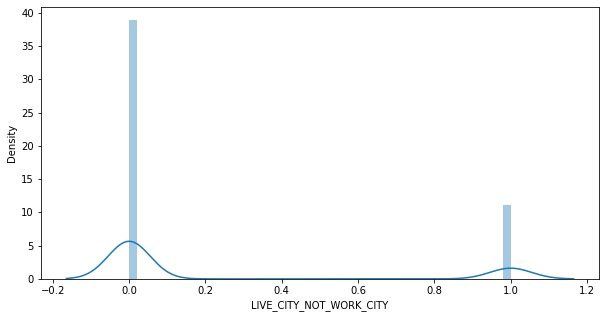

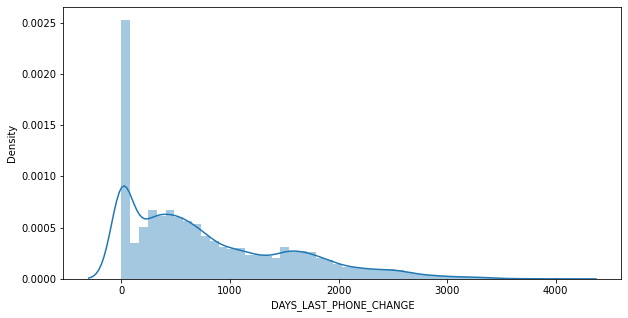

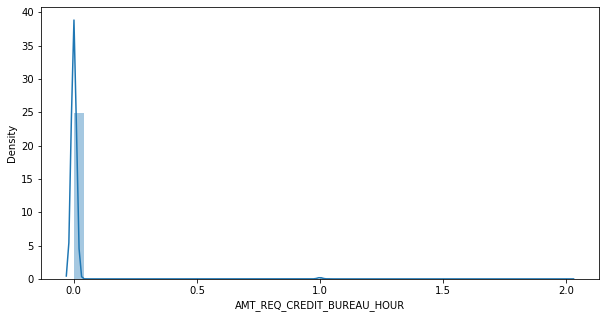

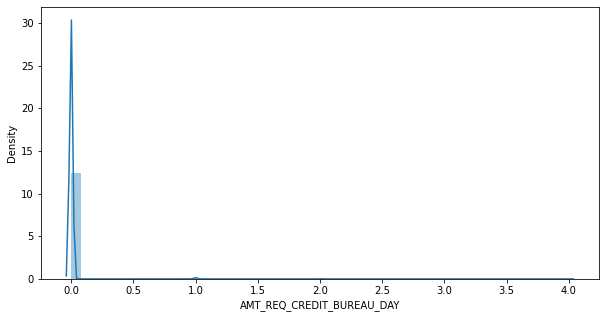

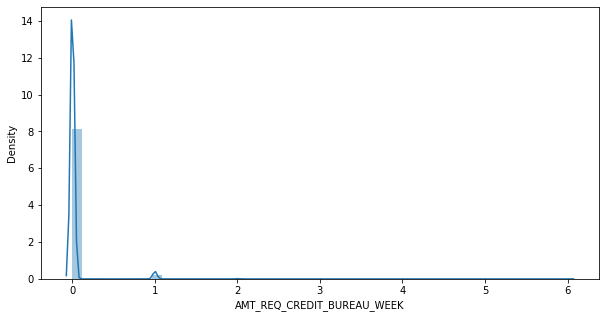

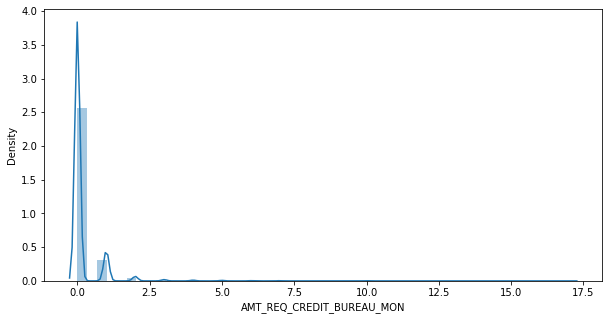

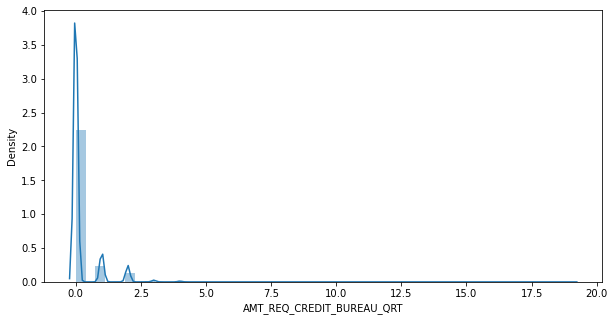

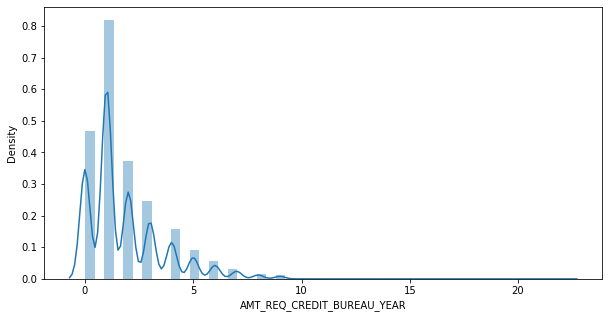

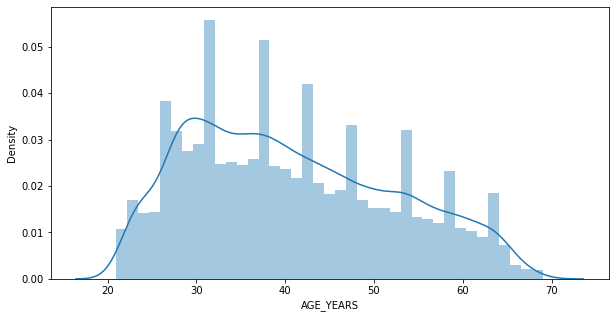

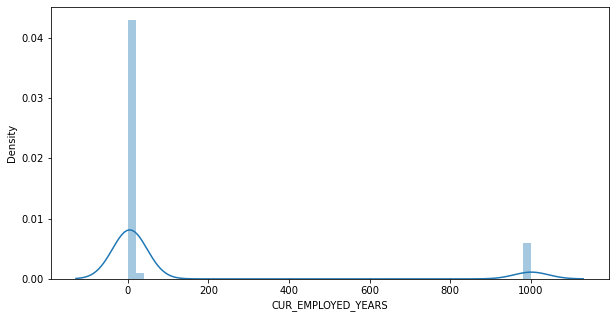

In [131]:
# Ploting distplot for all Numerical columns in df_tar_def (Defaulter)

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.distplot(df_tar_def[col])
    plt.show()

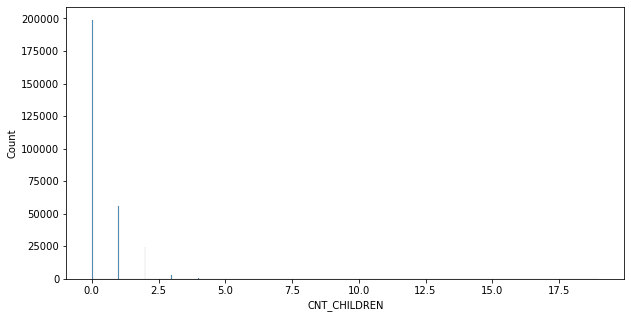

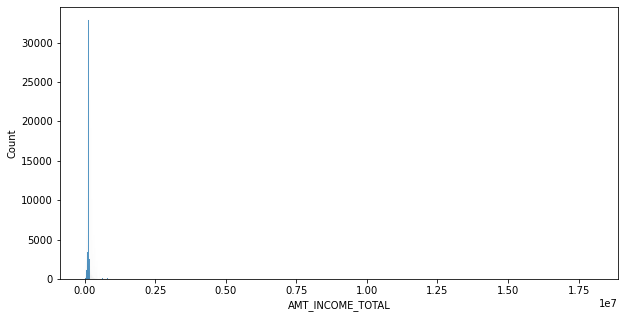

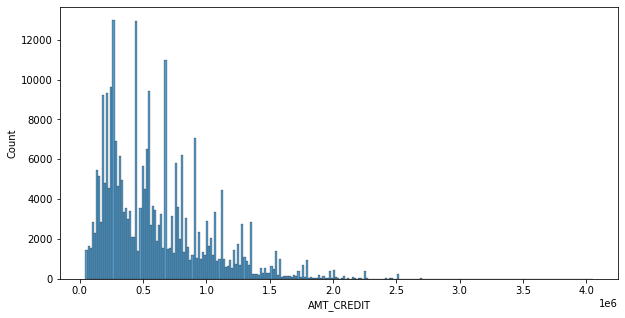

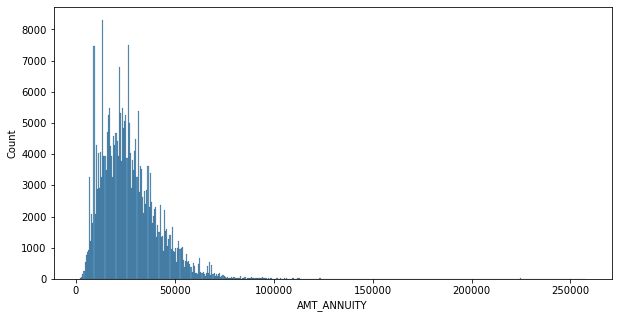

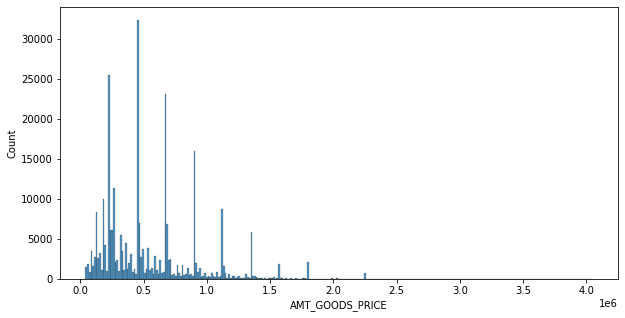

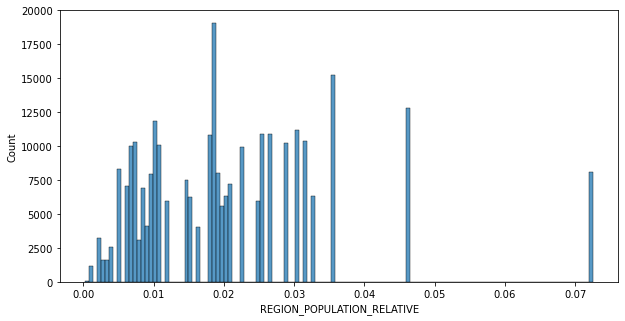

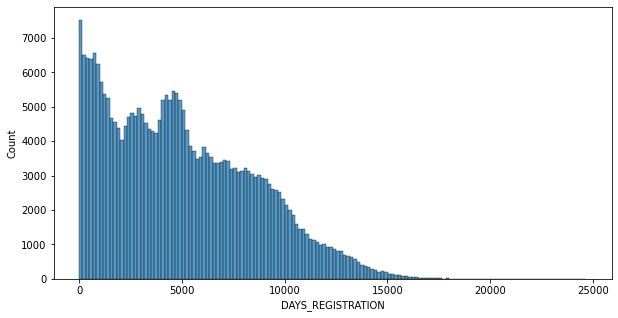

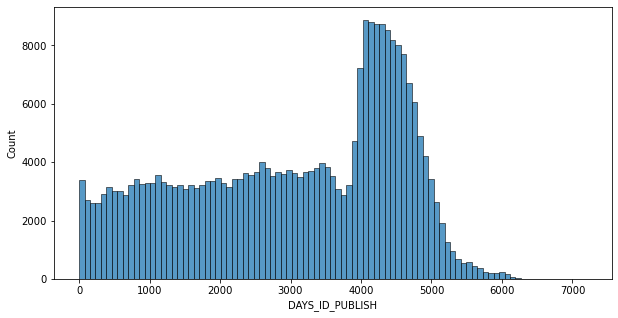

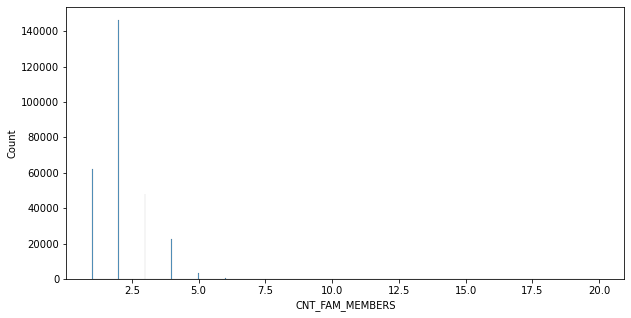

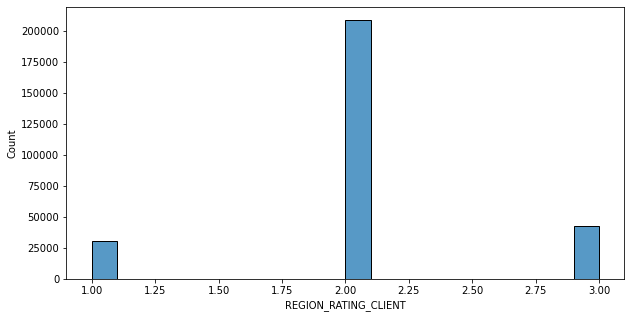

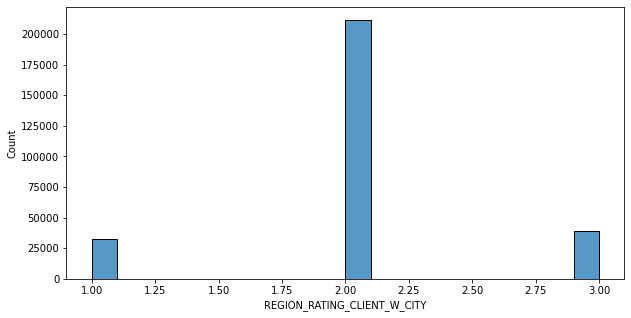

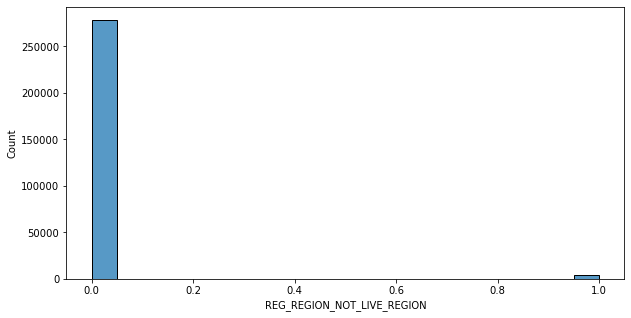

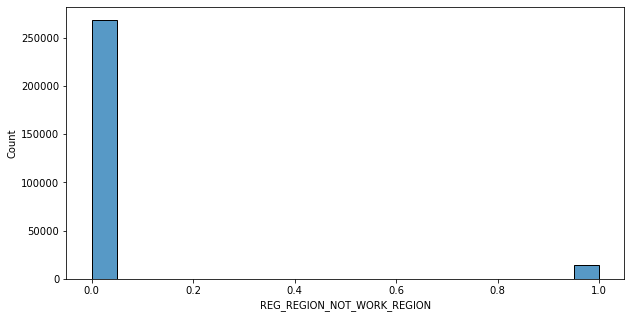

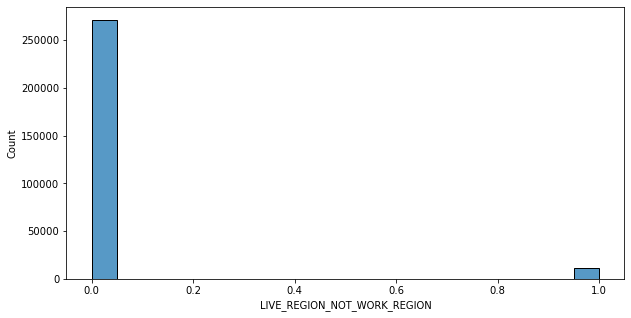

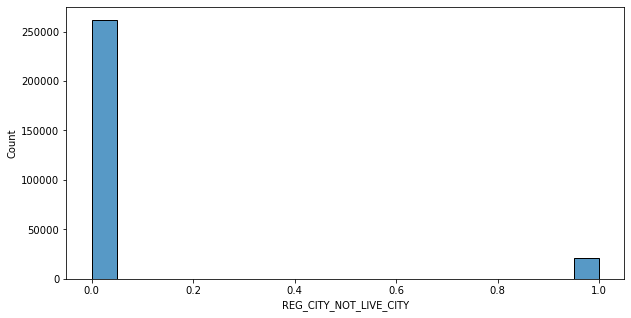

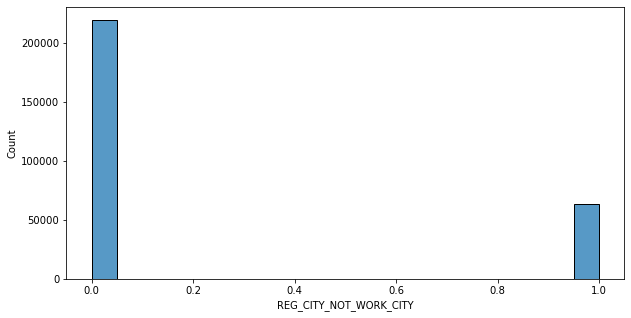

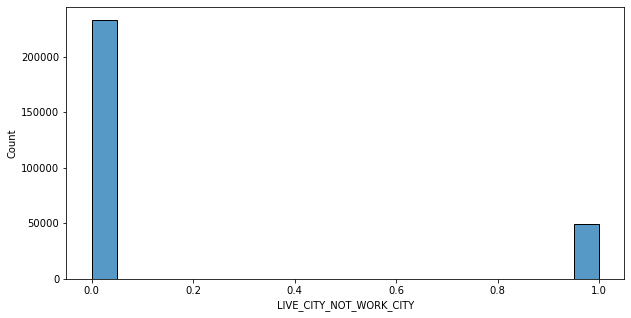

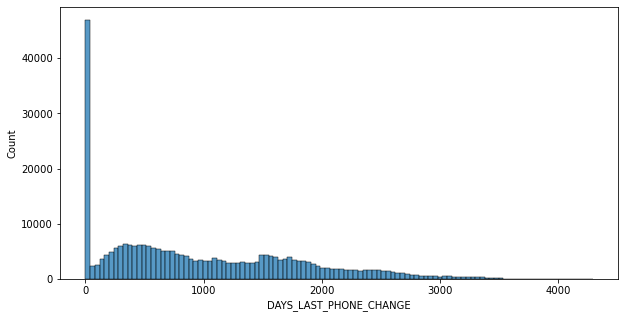

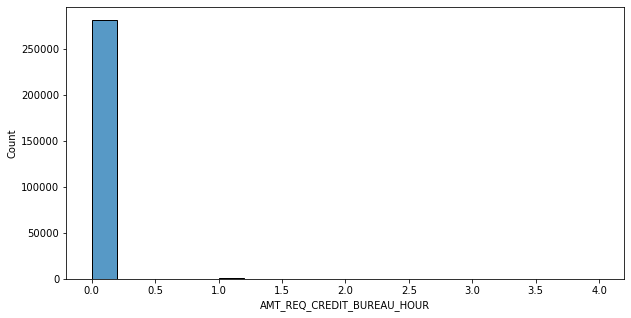

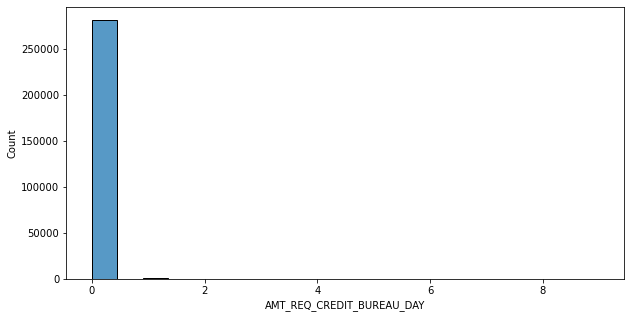

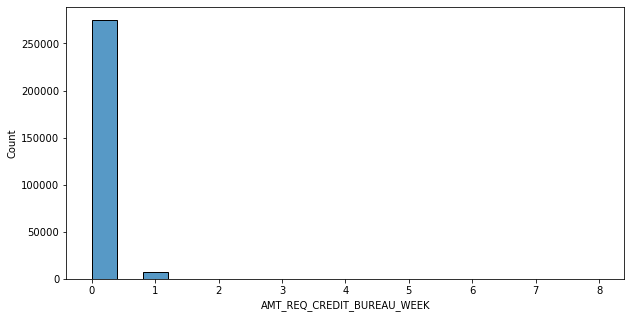

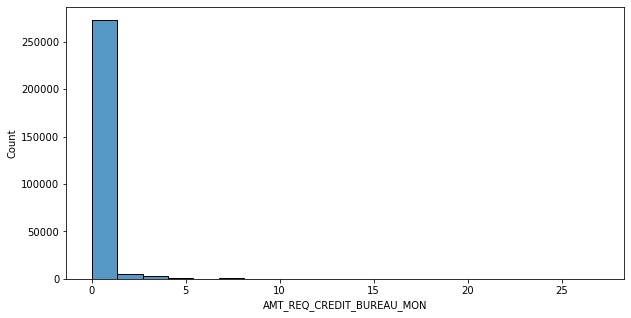

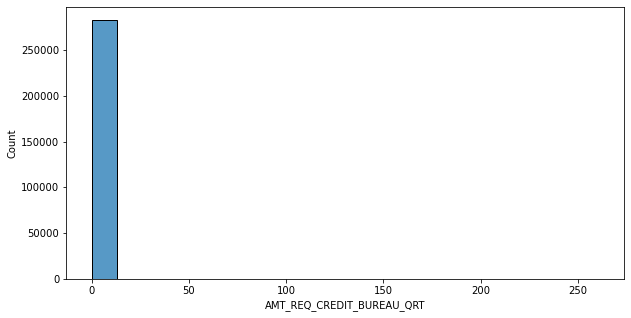

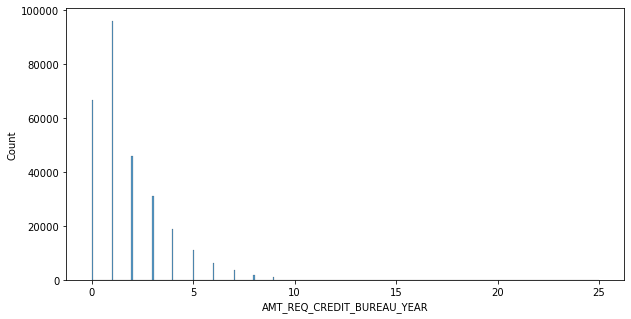

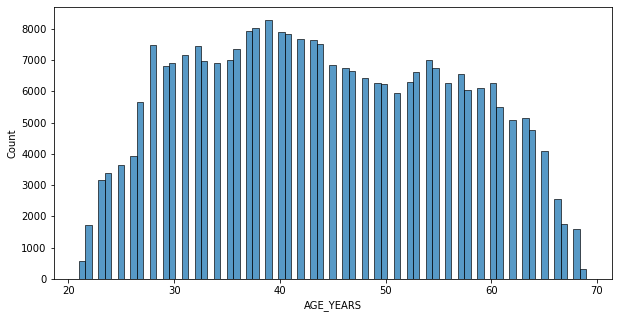

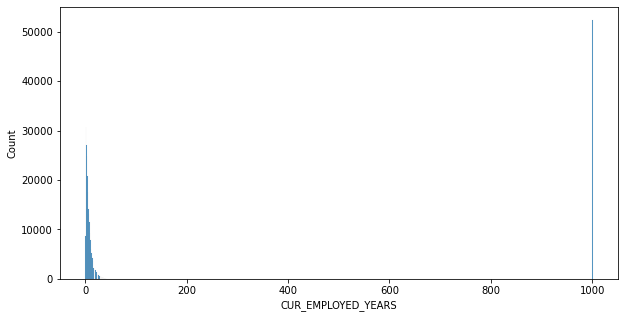

In [132]:
# Ploting histogram for all Numerical columns in df_tar_rep (Repayer)

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df_tar_rep[col])
    plt.show()

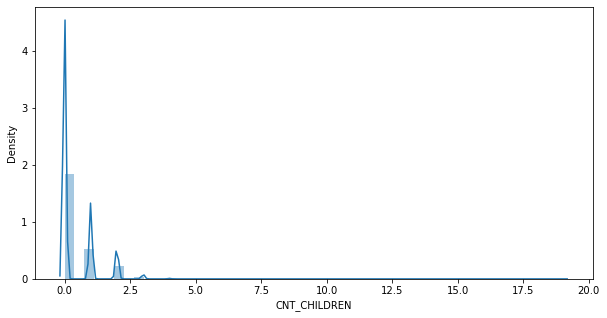

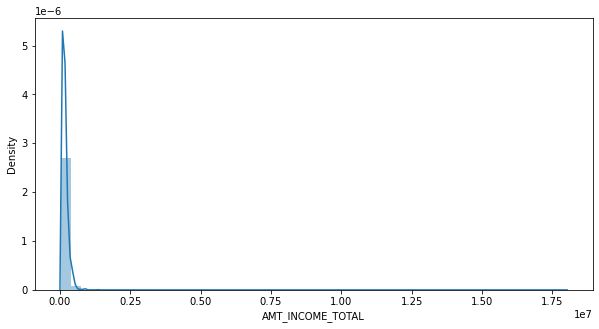

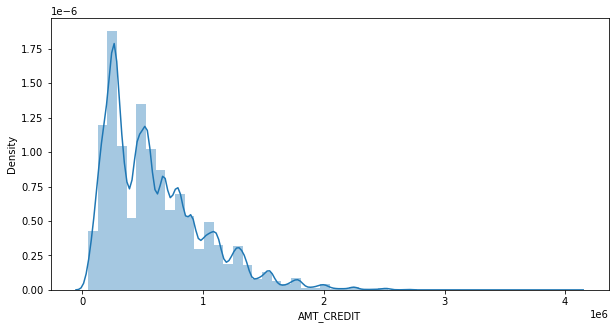

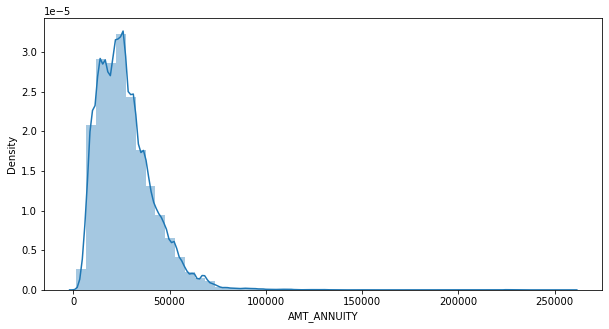

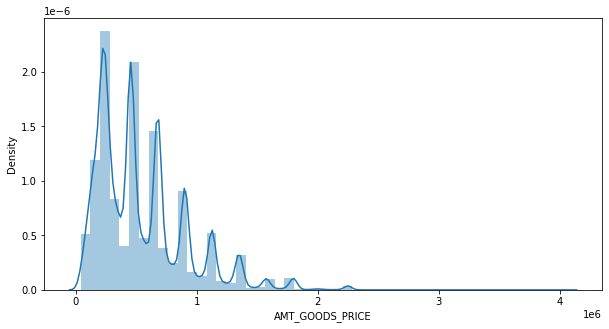

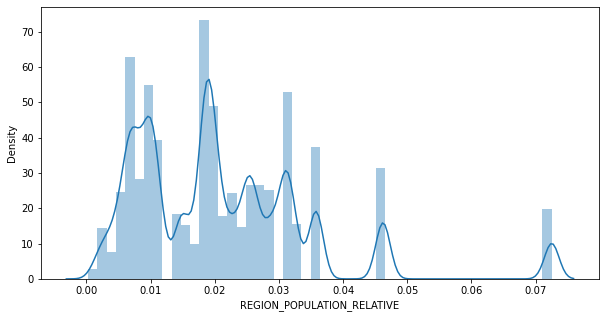

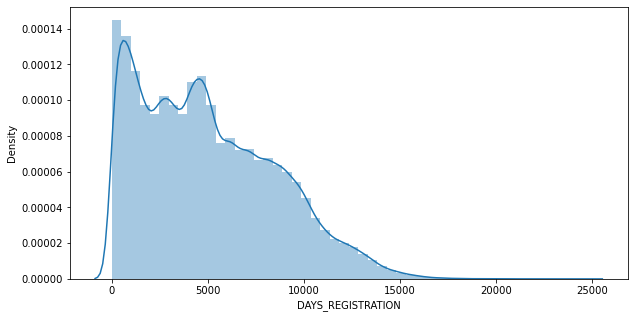

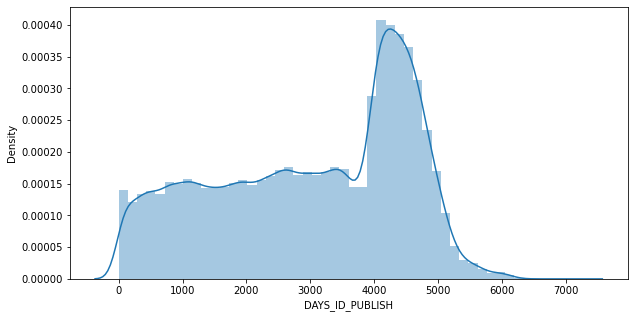

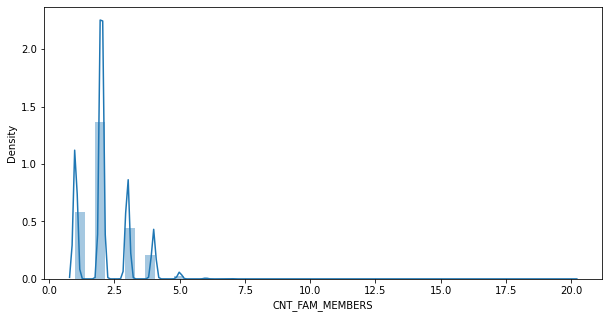

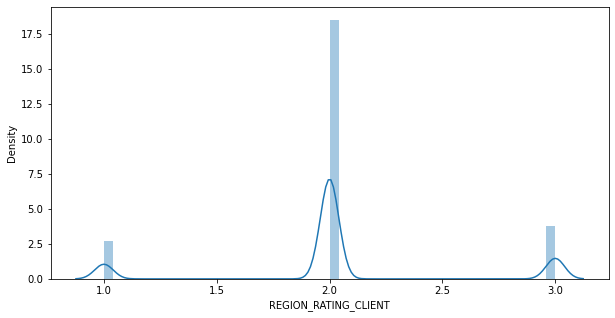

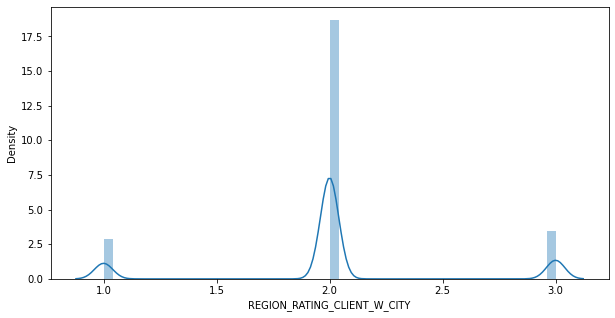

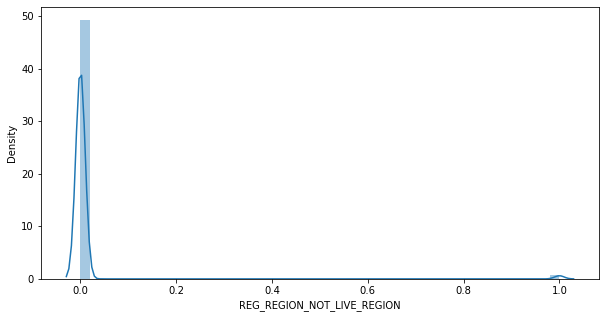

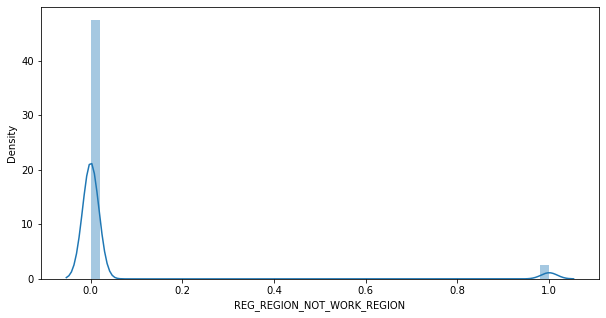

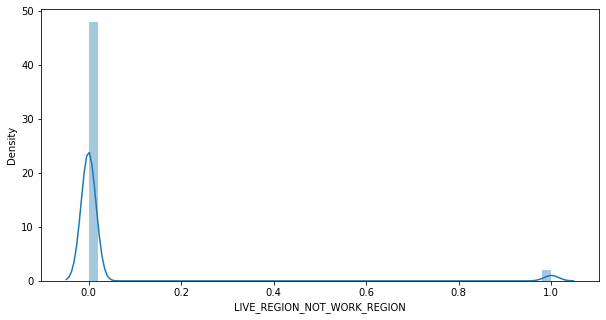

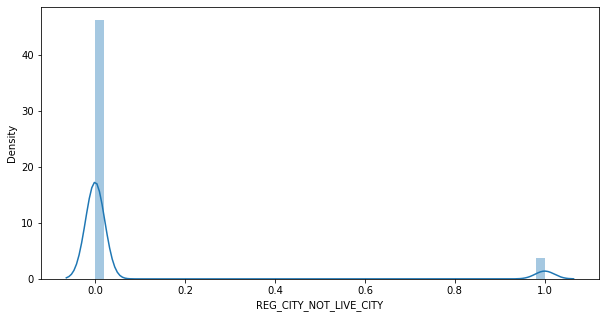

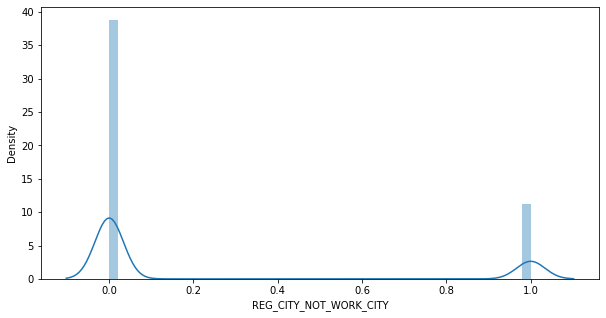

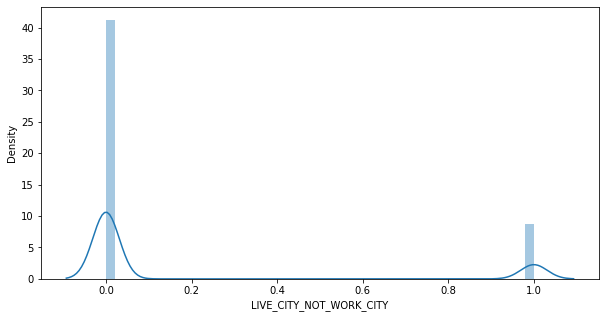

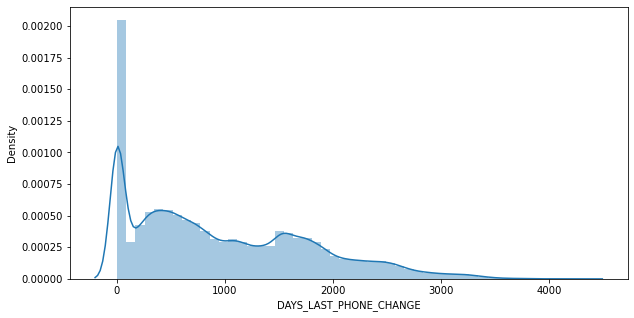

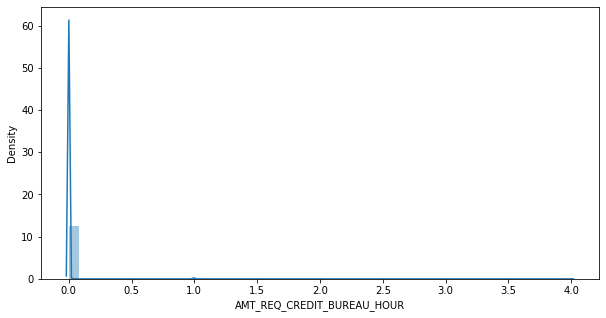

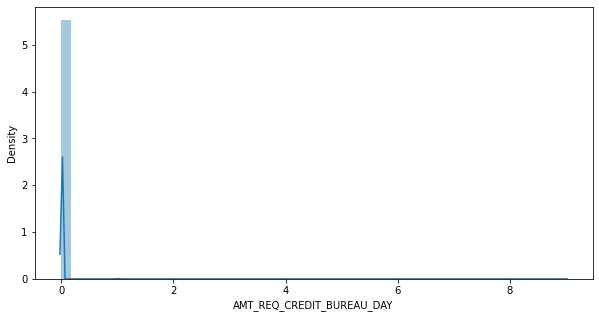

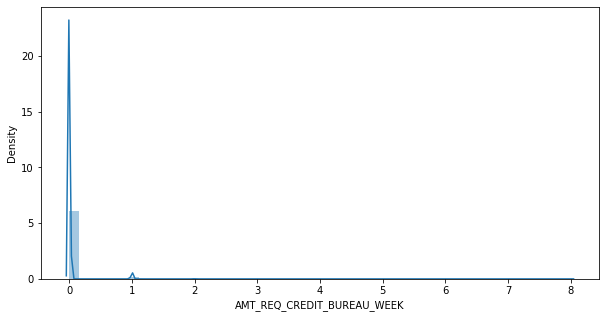

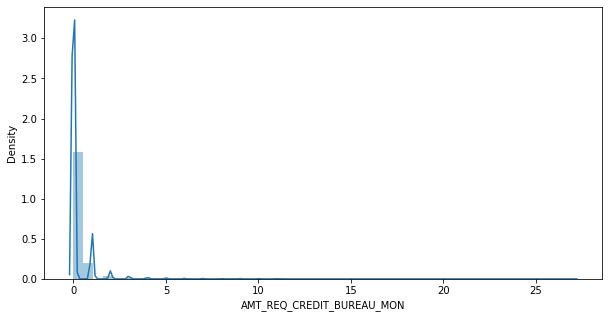

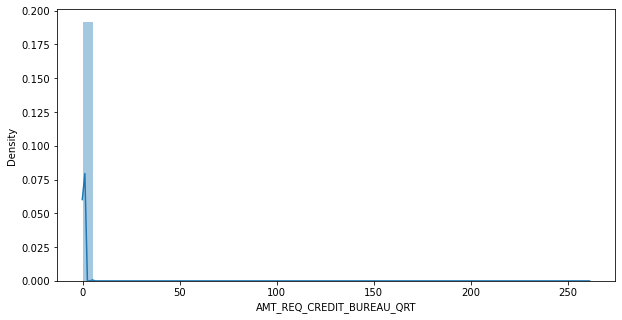

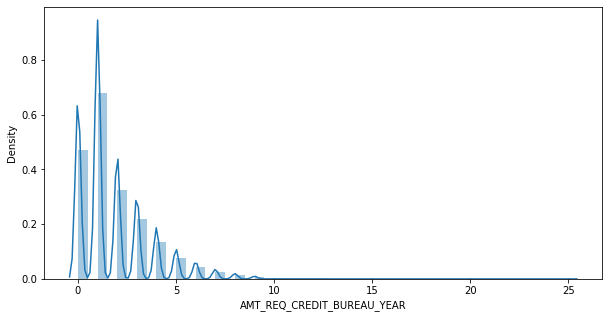

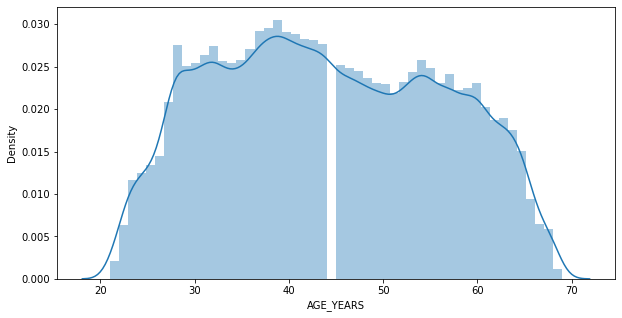

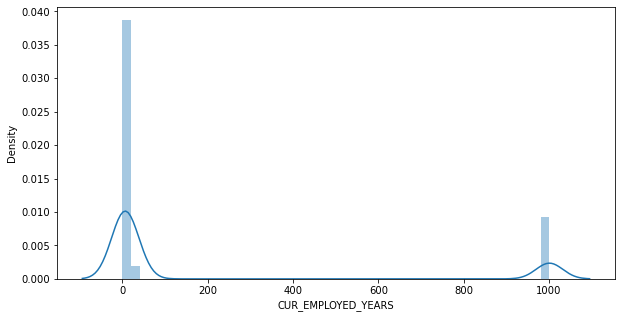

In [133]:
# Ploting distplot for all Numerical columns in df_tar_def (Repayer)

for col in num_columns:
    plt.figure(figsize=(10,5))
    sns.distplot(df_tar_rep[col])
    plt.show()

-  from above plots i only get how our Numerical data is distributed and outlies that not enough.
-   At this point i can't say anything for sure. I have to analyse data more.

##### categorical columns Analysis for df

-  For this i are using countplot

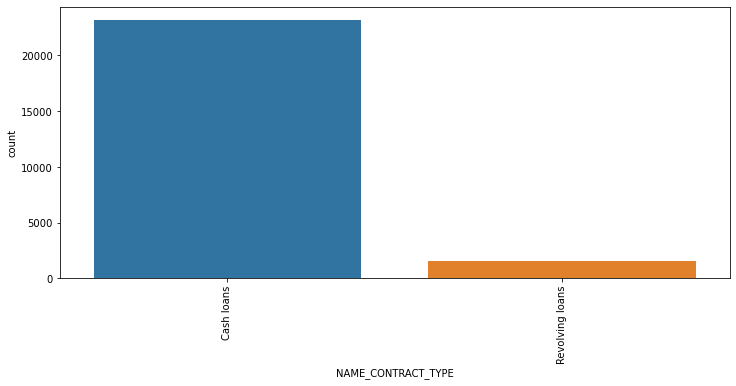

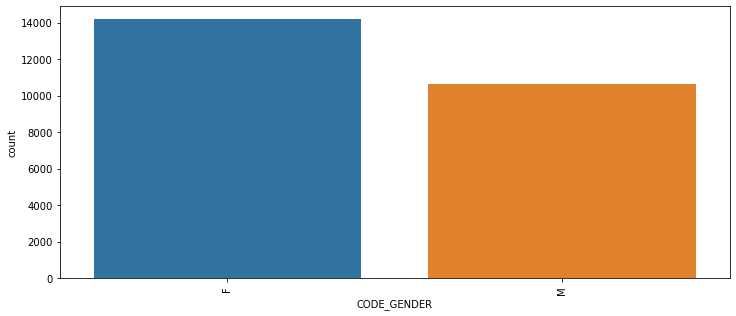

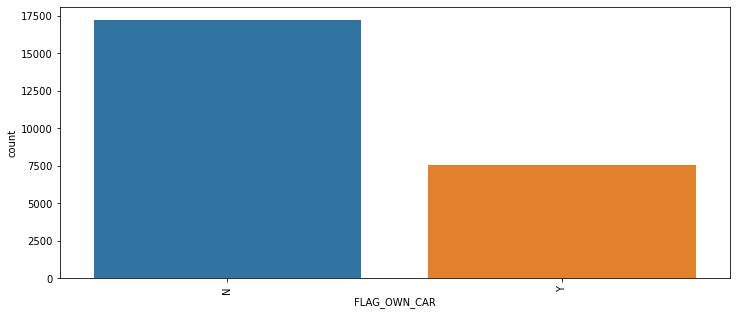

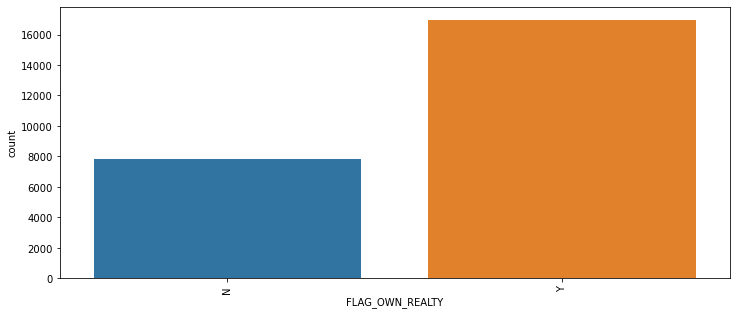

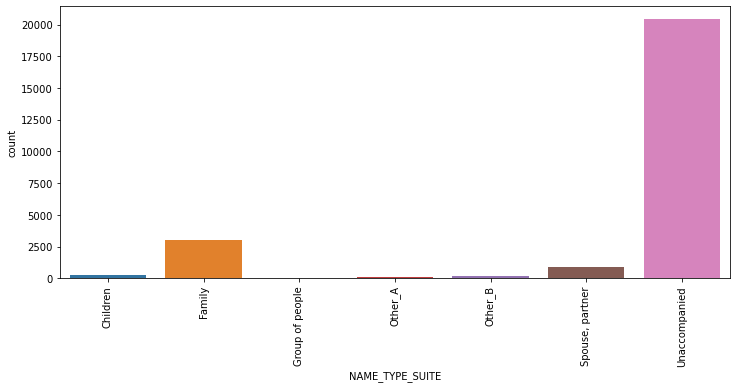

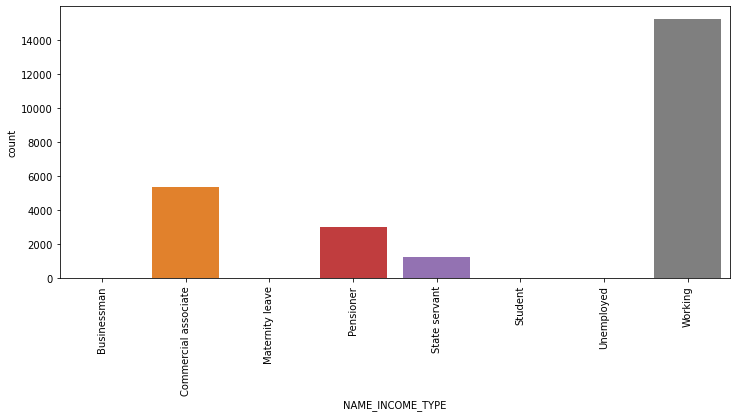

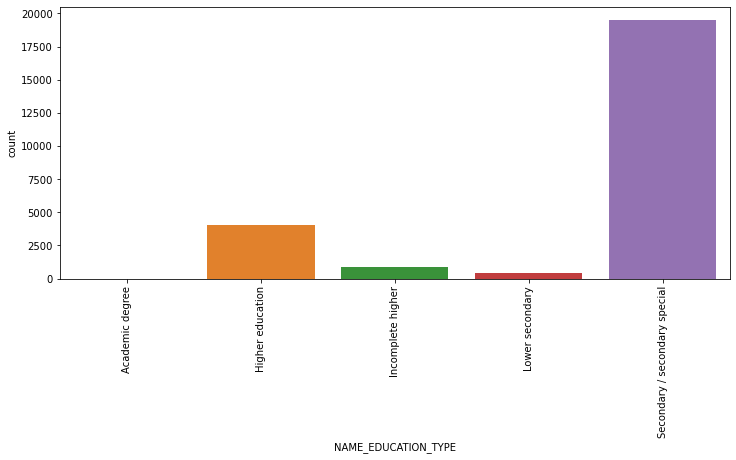

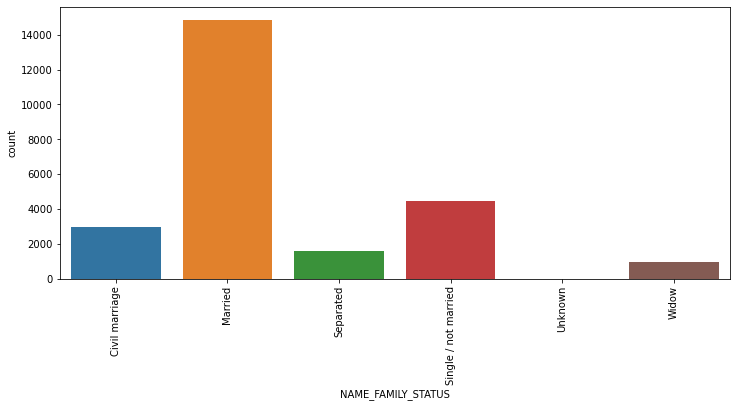

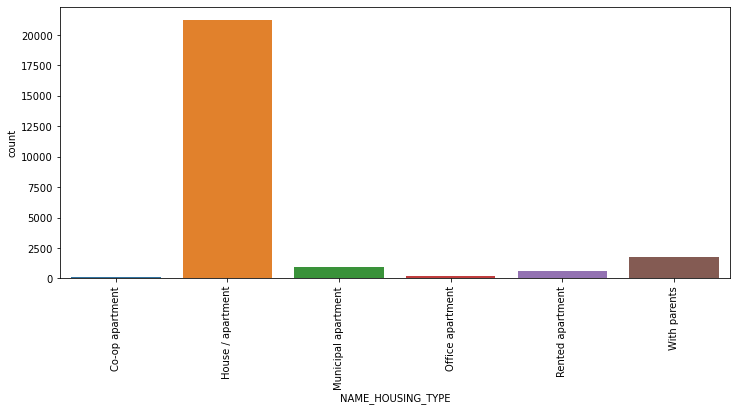

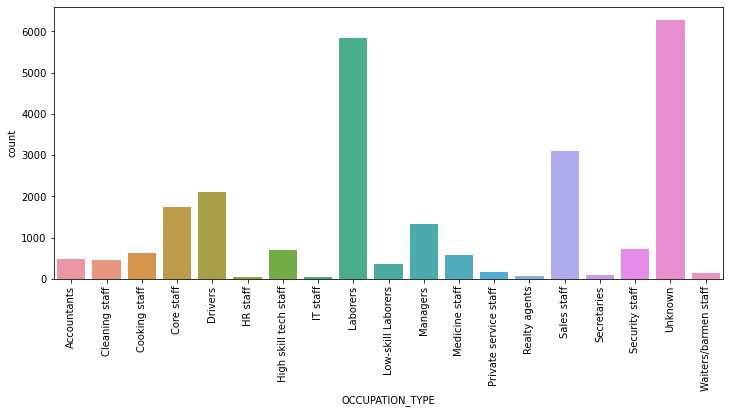

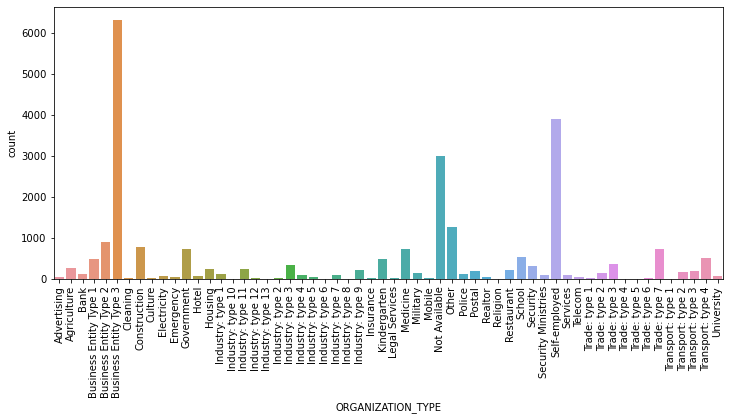

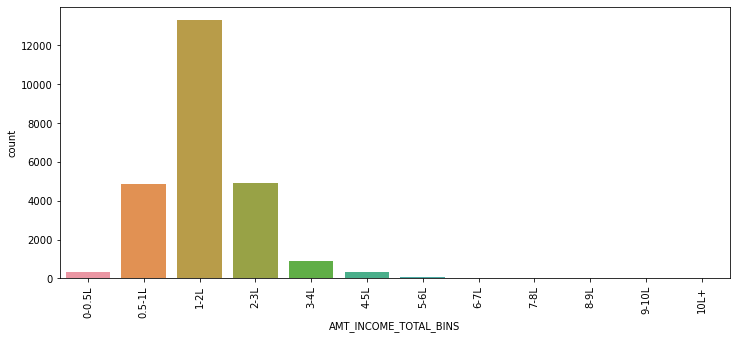

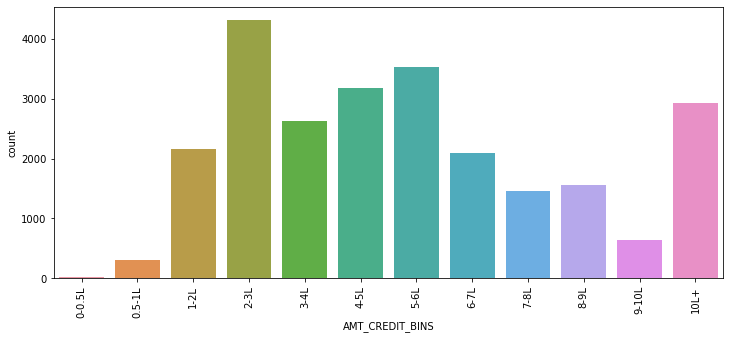

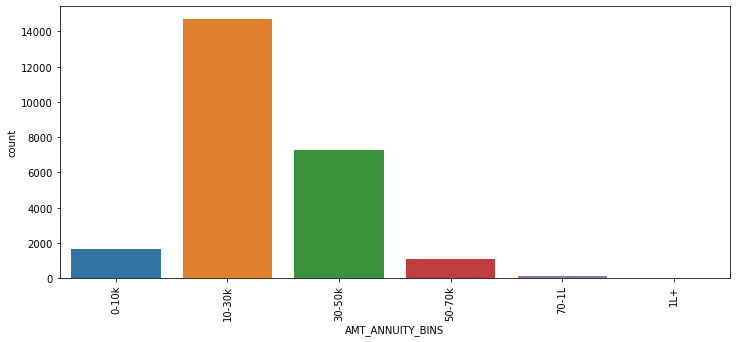

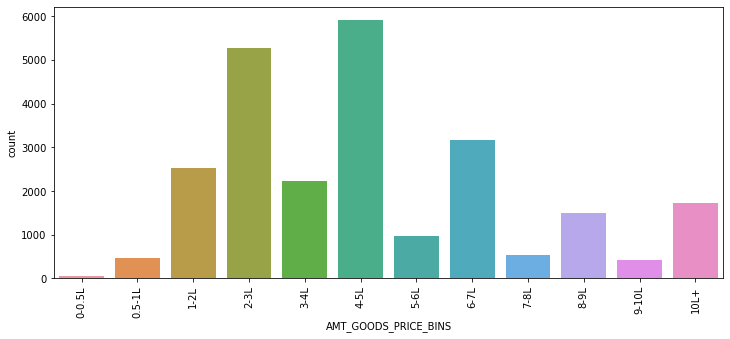

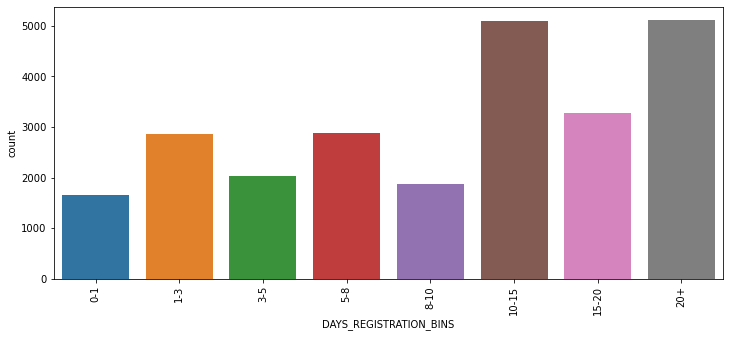

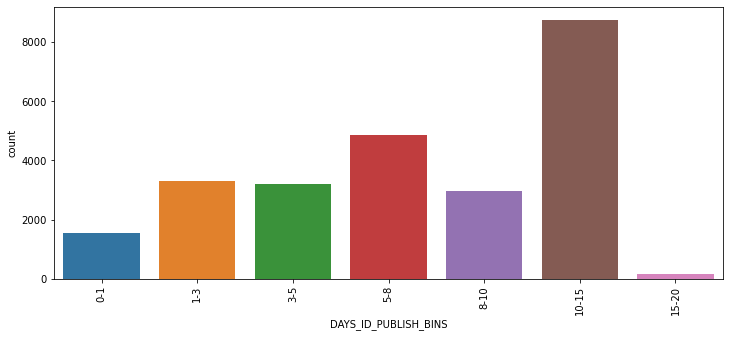

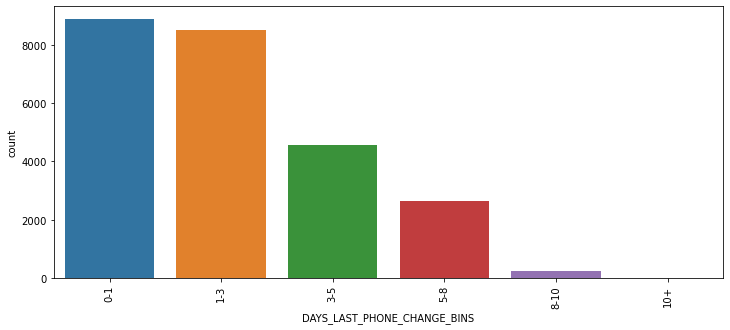

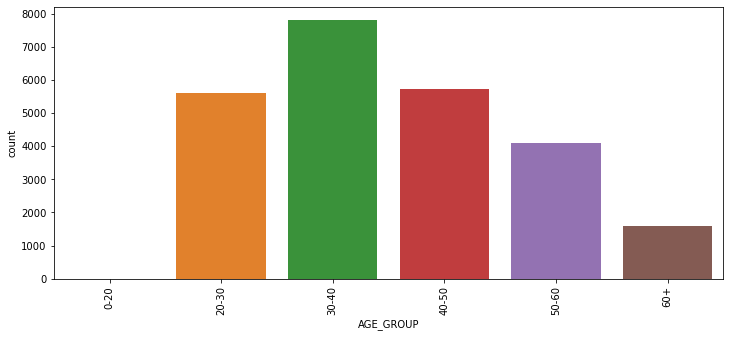

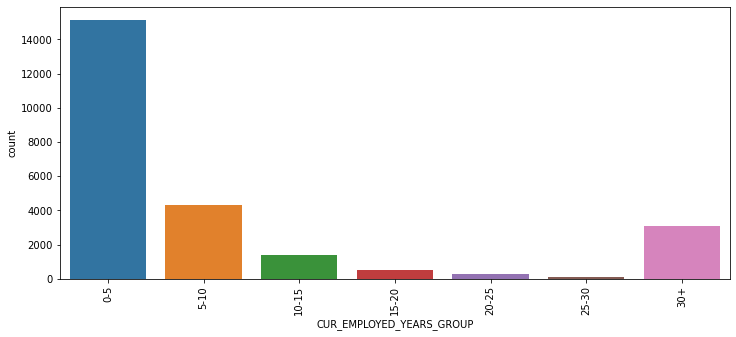

In [134]:
# Ploting countplot for all categorical columns in df_tar_def (Defaulter)

for col in cat_columns:
    plt.figure(figsize=(12,5))
    sns.countplot(df_tar_def[col])
    plt.xticks(rotation =90)
    plt.show()

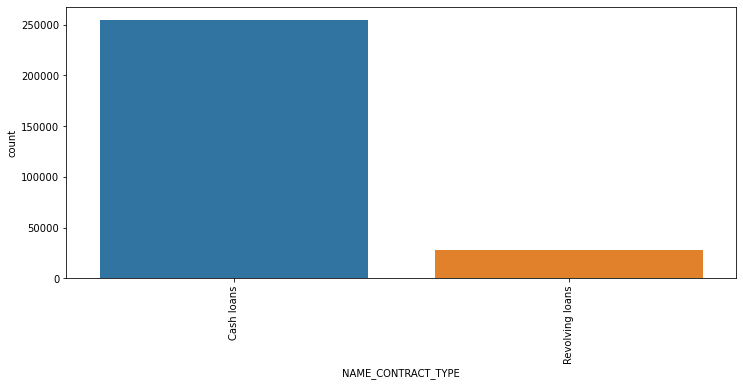

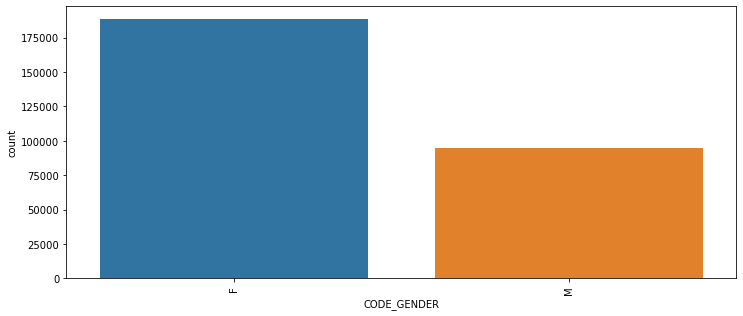

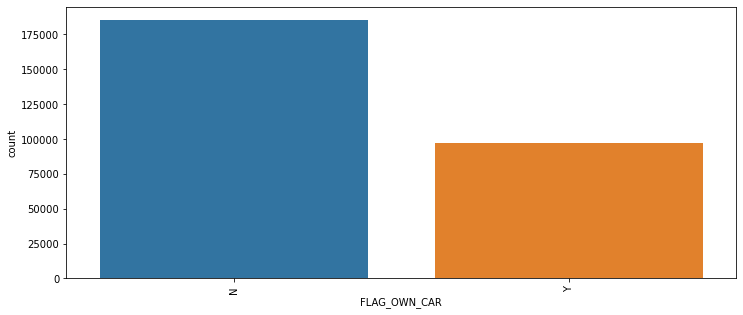

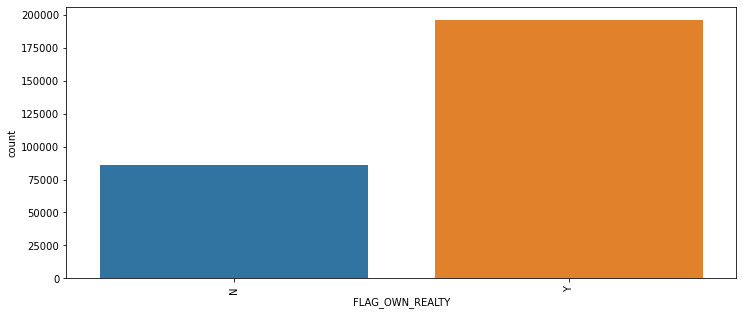

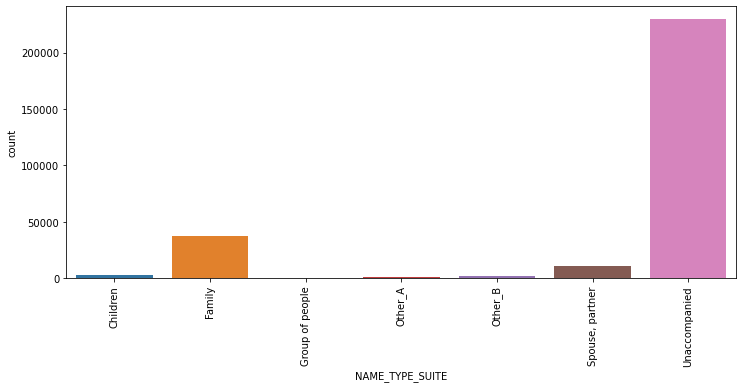

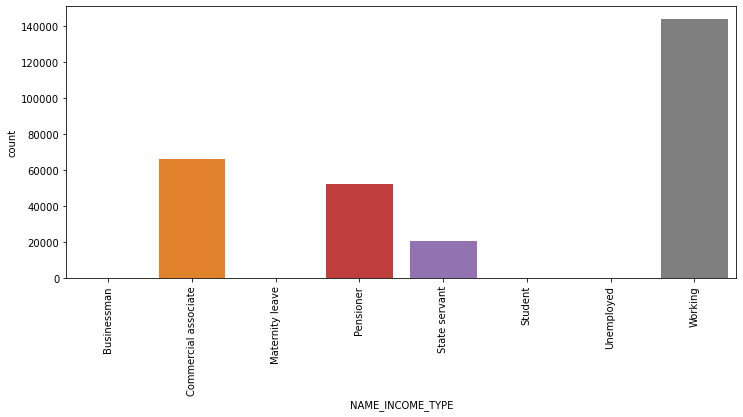

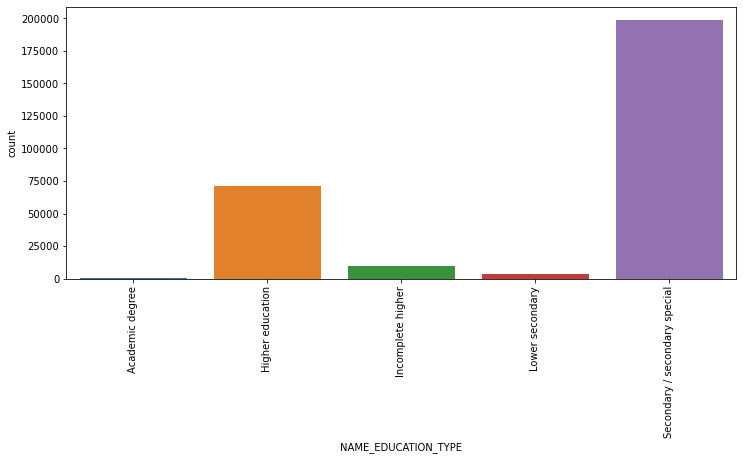

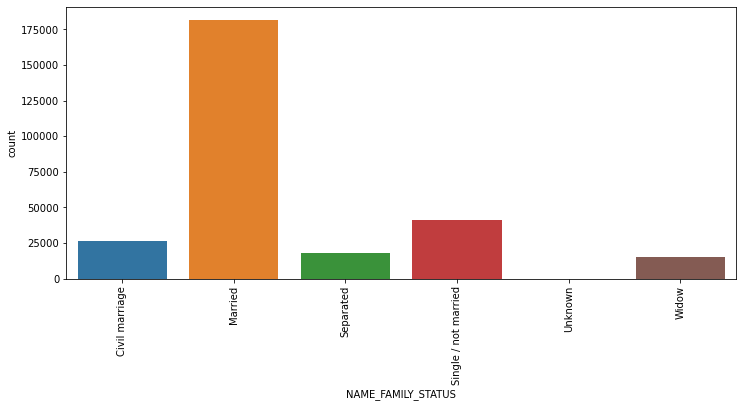

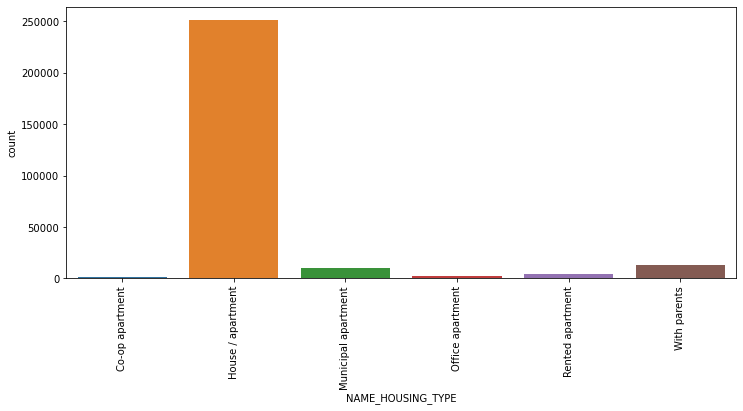

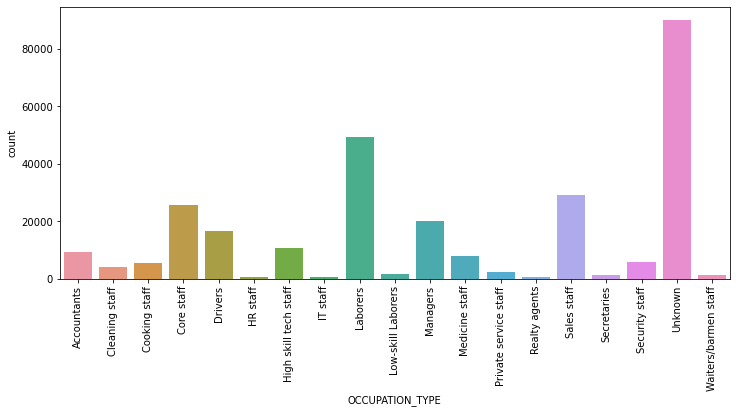

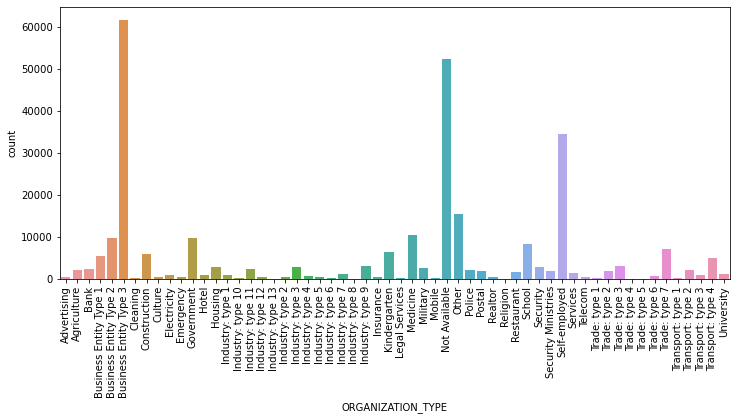

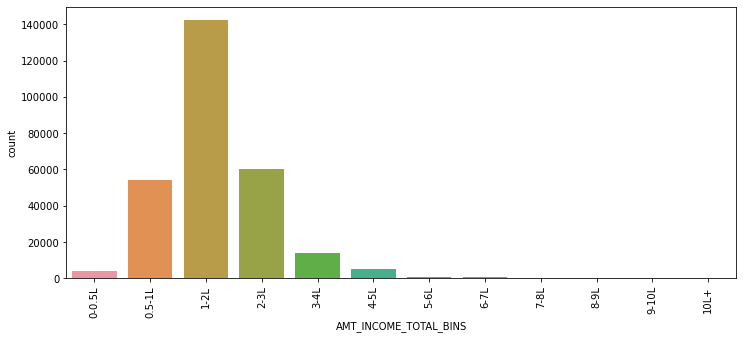

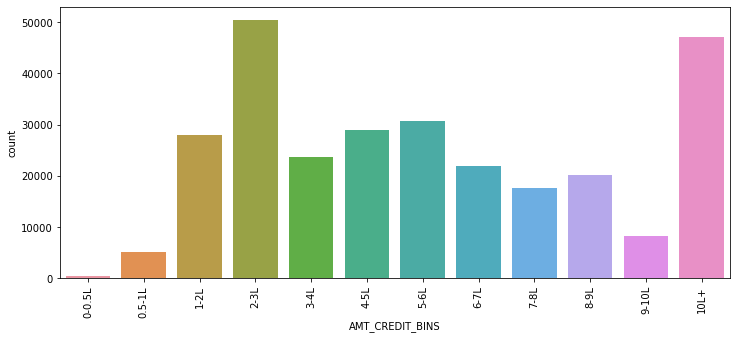

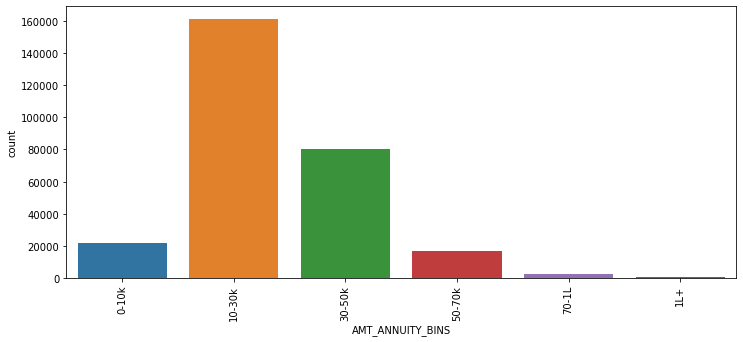

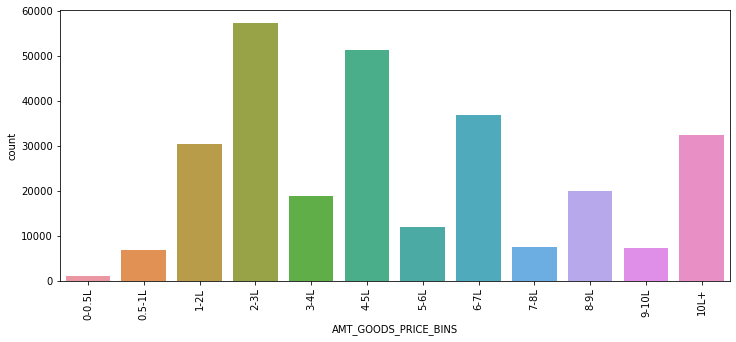

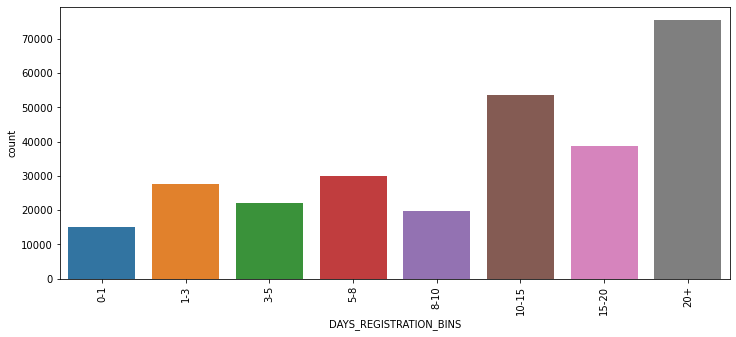

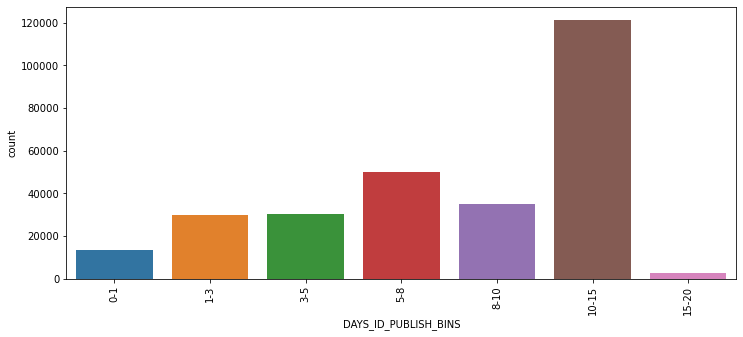

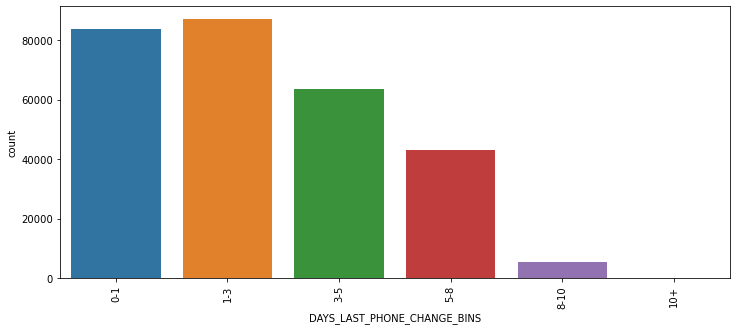

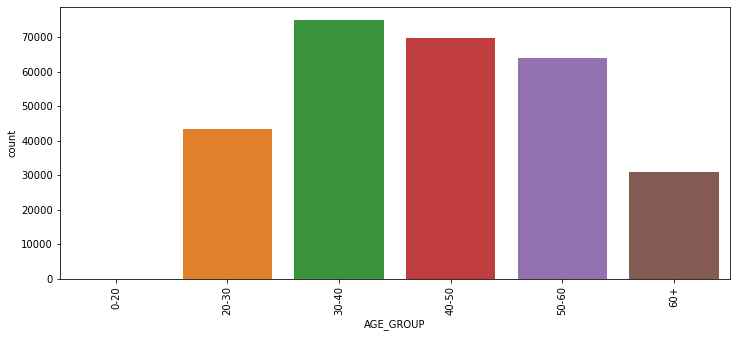

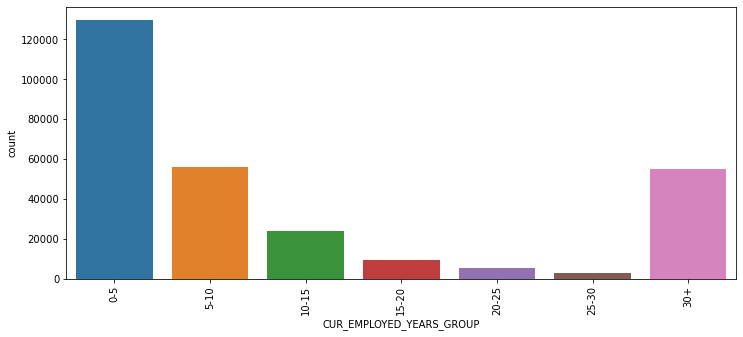

In [135]:
# Ploting countplot for all categorical columns in df_tar_rep (Repayer)

for col in cat_columns:
    plt.figure(figsize=(12,5))
    sns.countplot(df_tar_rep[col])
    plt.xticks(rotation =90)
    plt.show()

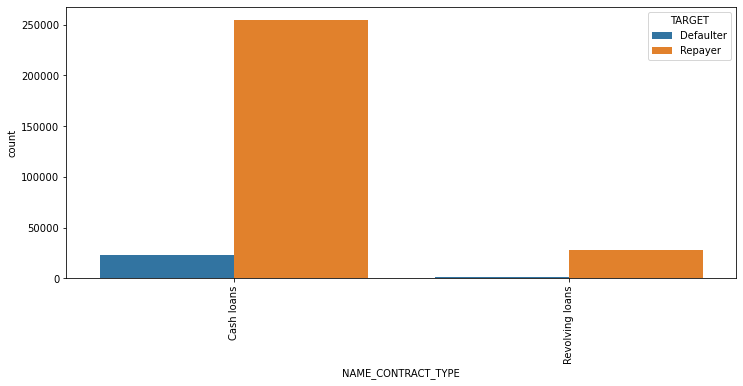

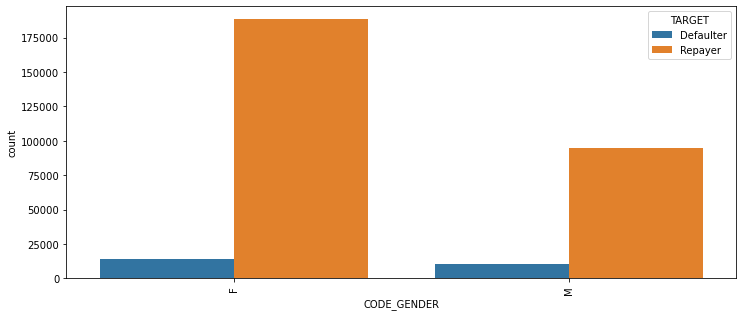

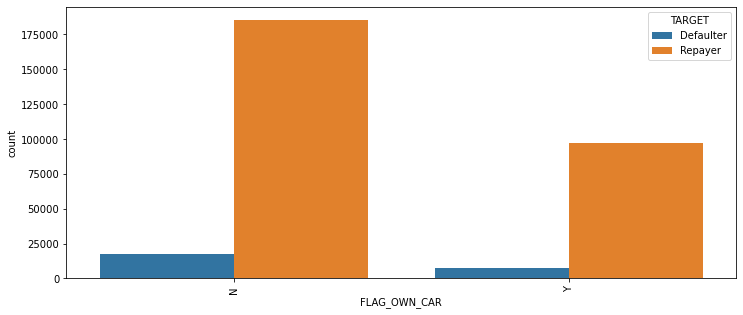

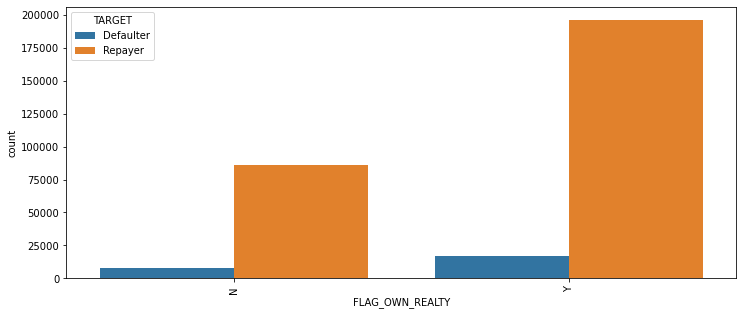

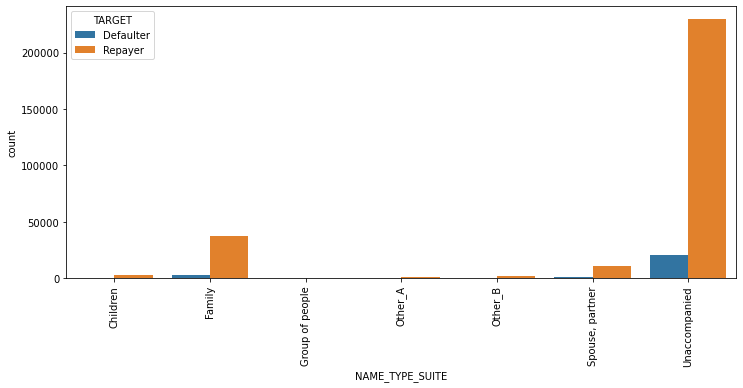

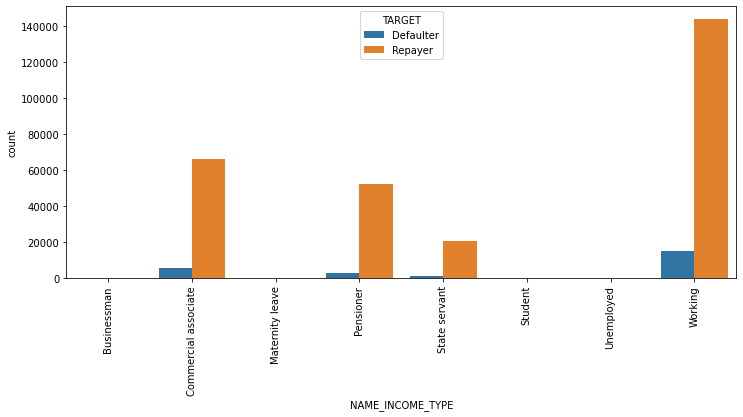

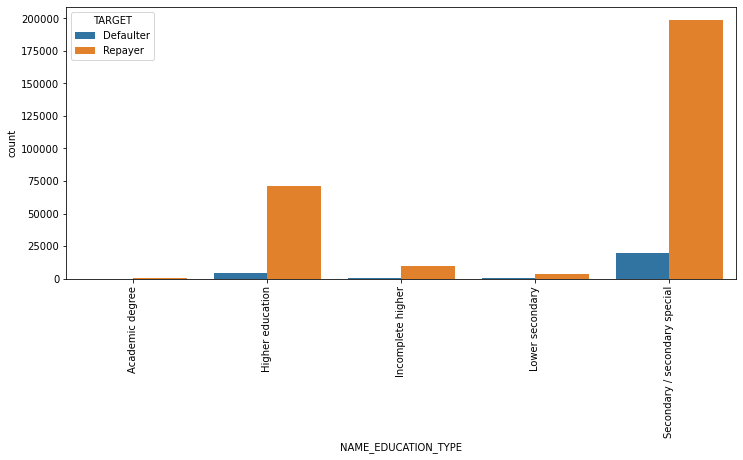

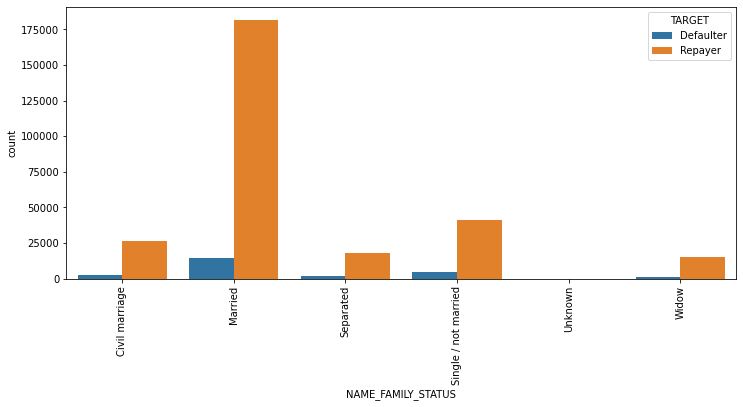

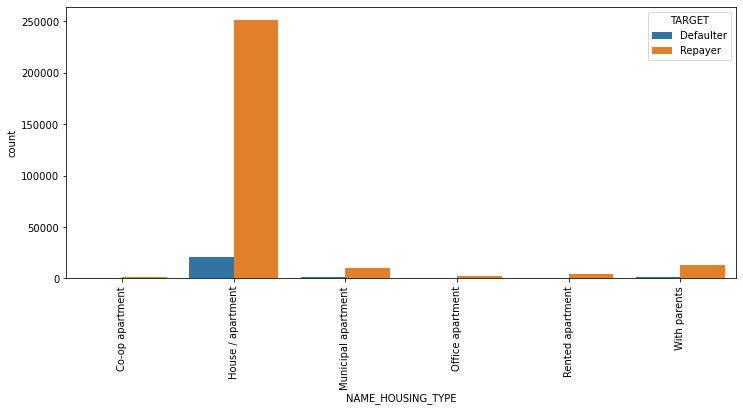

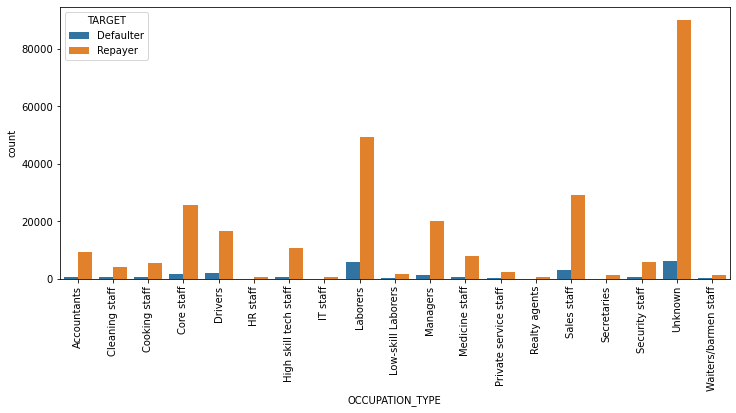

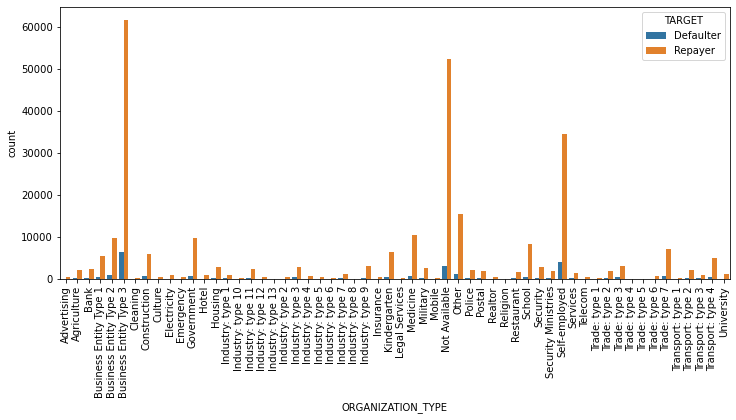

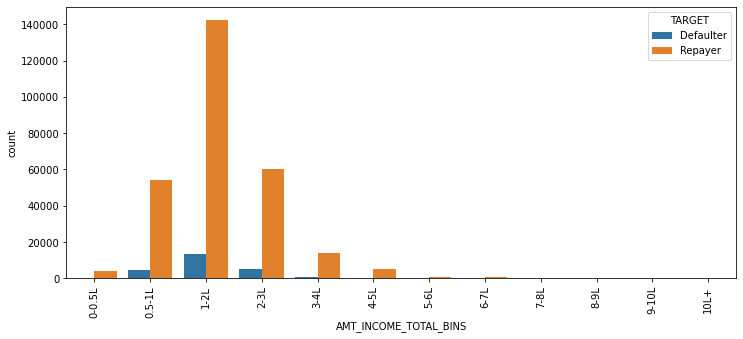

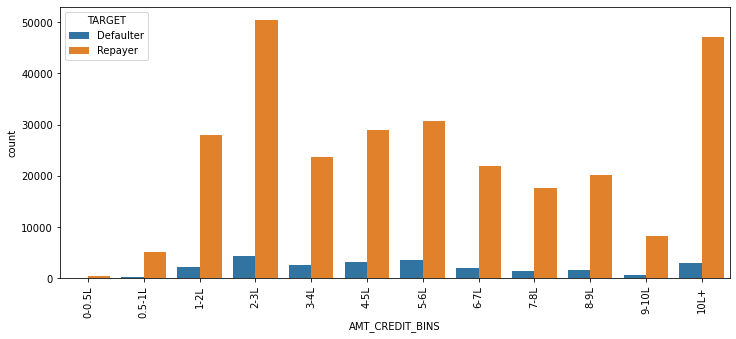

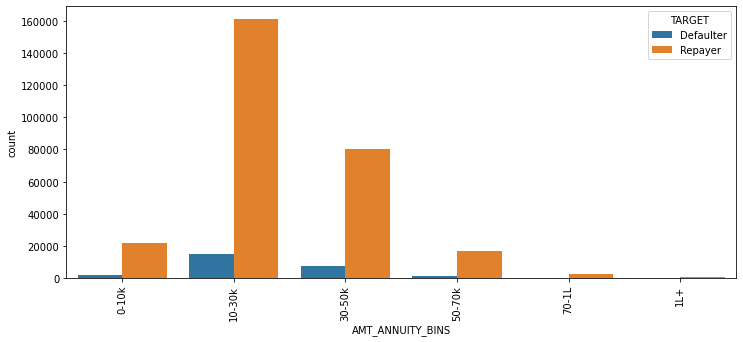

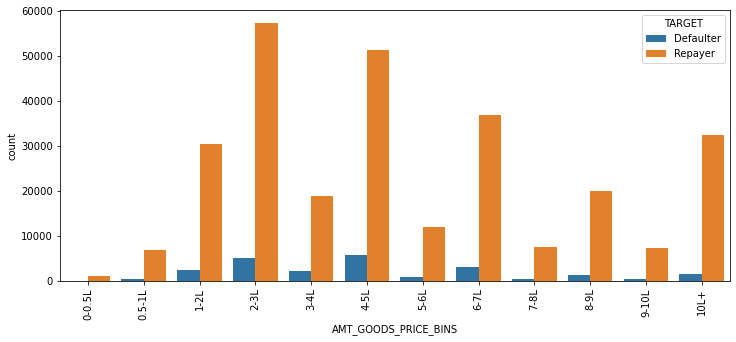

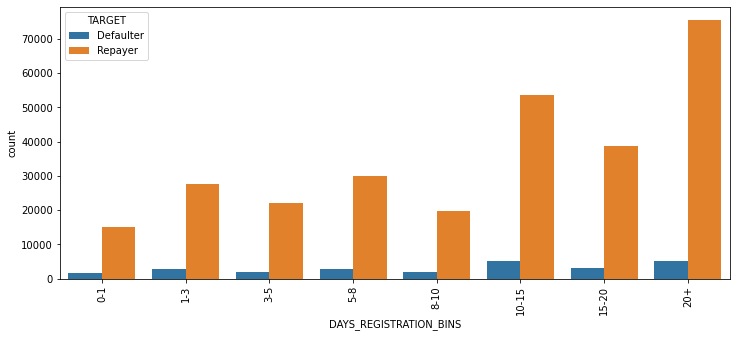

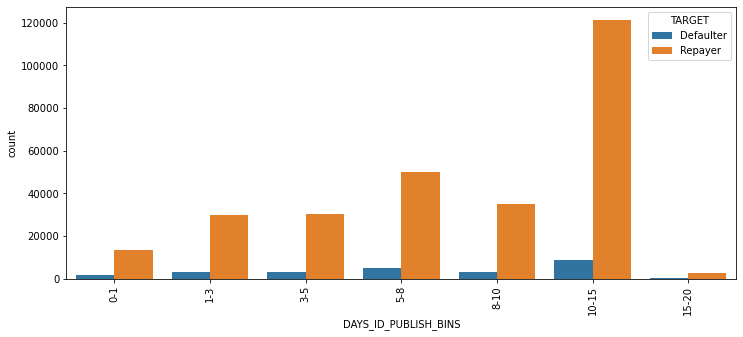

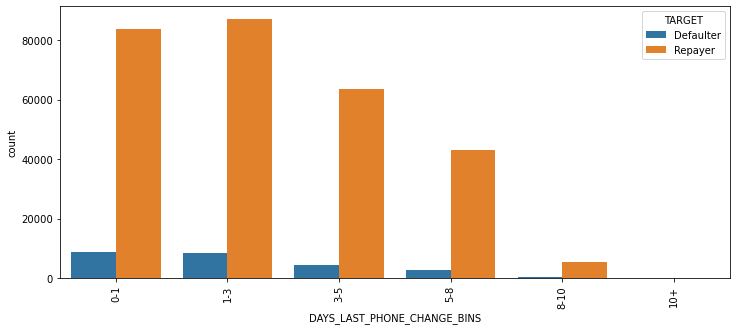

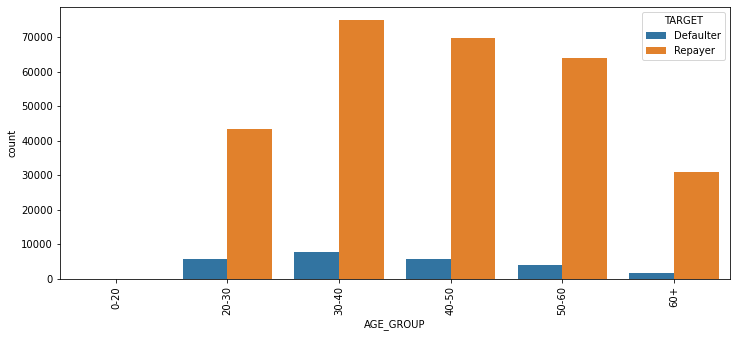

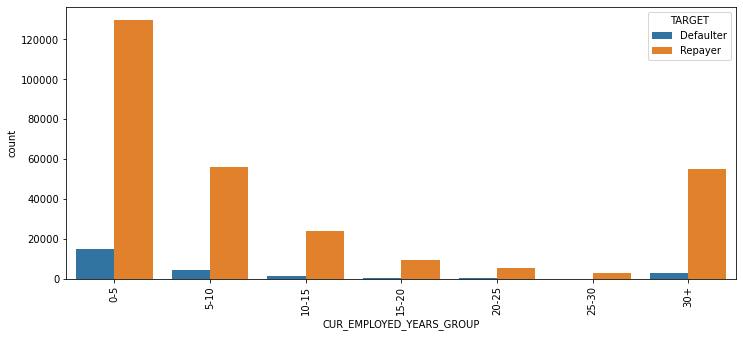

In [136]:
# Ploting countplot for all categorical columns in df

for col in cat_columns:
    plt.figure(figsize=(12,5))
    sns.countplot(x =col, hue ="TARGET",data=df)
    plt.xticks(rotation =90)
    plt.show()

##### These above plots gives as a significant amount of information like

-  NAME_CONTRACT_TYPE : Less number of Revolving loans take but the defaulters are higher in it.

-  CODE_GENDER: Less number of males take loan but the defaulters are higher in case of males.

-  NAME_TYPE_SUITE: Most client are unaccompanied and defaulters are less in this case but those clients who unaccompanied with Family or Partner have the highest chance to become defaulters.

-  NAME_INCOME_TYPE: Most client are Working people followed by Commercial associate and pensiner. but state servant Commercial associate & pensiner have the higher chance to become defaulters.

-  NAME_EDUCATION_TYPE: Most client take loan for secondary education followed by higher education. But the most defualt in secondary education is much high and for higher education is much low. 

-  NAME_FAMILY_STATUS: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.

-  NAME_HOUSING_TYPE: those client who own's the house/apartment apply for loan and have low chence to become a defaulters.

-  OCCUPATION_TYPE: Laborers and different categories of staffs mostly take the loan, but the managers and the high skilled tech staffs are most relaible.

- AMT_INCOME_TOTAL_BINS: Clients who have income 1-2L apply the most but clients with high income are more relaible.
- AMT_CREDIT_BINS: There are very less defaulters for AMT_CREDIT >10L  or AMT_CREDIT between 2-3L.
- AMT_ANNUITY_BIN:  There are very less defaulters in between 10-30K for Annuity
- AMT_GOODS_PRICE_BINS: There are very less defaulters in between 2-3 and 4-5 for Goods price.
- DAYS_REGISTRATION_BINS: Clients who recently changed his registration have higher chance to become defaulters.
- DAYS_ID_PUBLISH_BINS: Clients who recently changed his identity document or didnot change in 15 year have more chance to become defaulters.
-  AGE_GROUP: Clients who are either very young(20-30) or very old(60+) have higher chance to become defaulters.

-  There are few Numerical columns i didn't analyse doing now

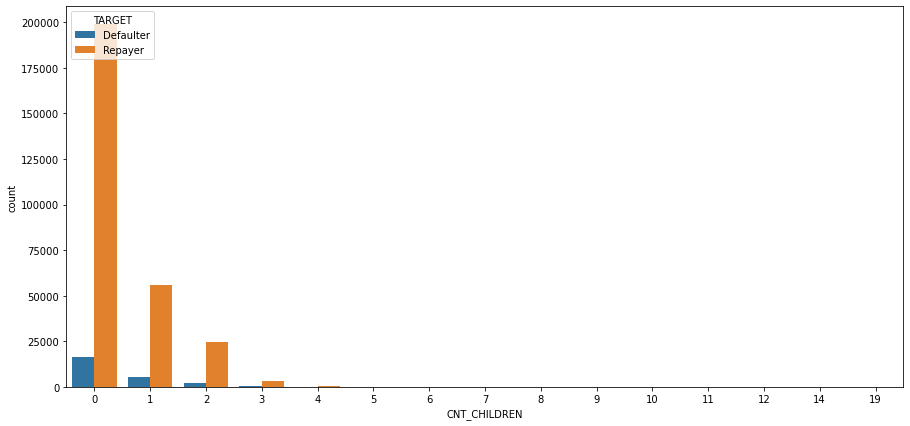

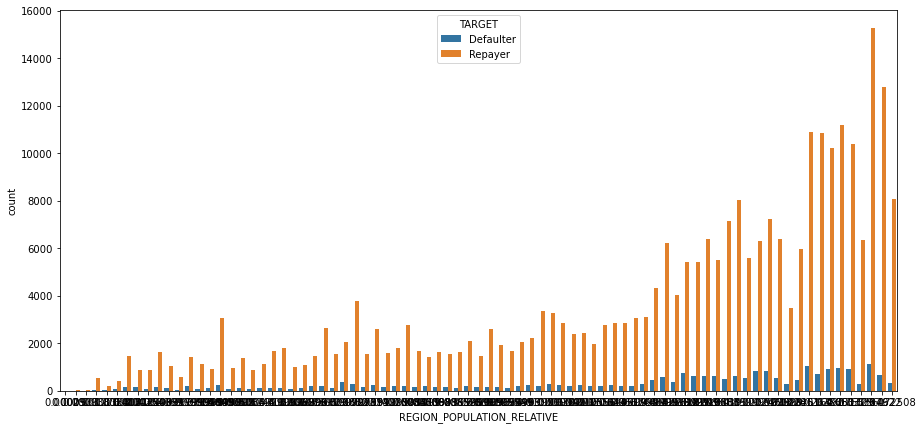

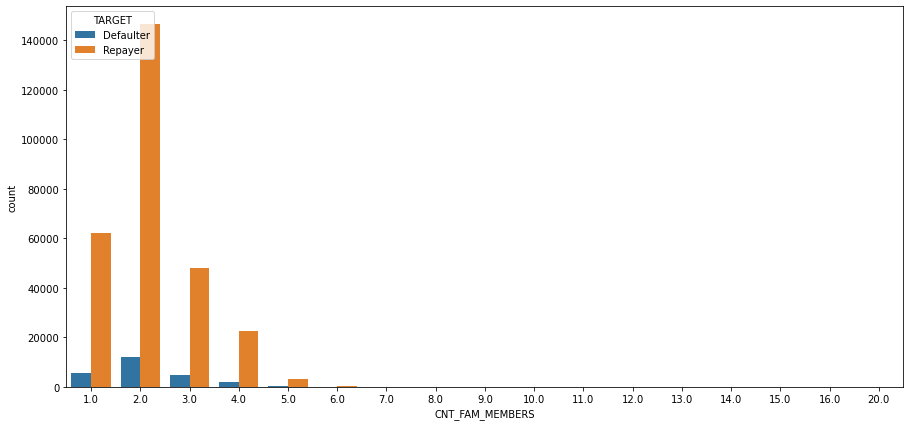

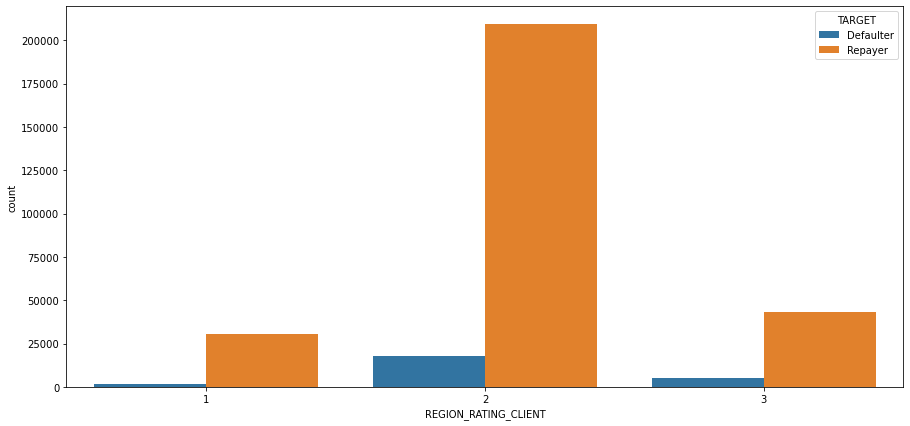

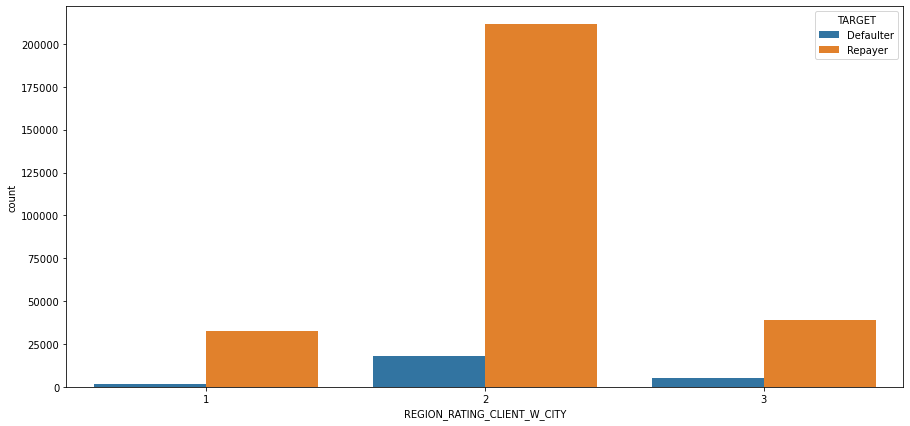

In [137]:
df_num2=["CNT_CHILDREN","REGION_POPULATION_RELATIVE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]   

for col in df_num2:
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[col],hue="TARGET",data=df)
    plt.show()
    

-  CNT_CHILDREN: clients who have no child apply the most but clients who have 2 or more have higher chance to become defaulters.
-  CNT_FAM_MEMBERS: clients who have 2 family member apply the most but clients higher than that have higher chance to become defaulters.
-  REGION_RATING_CLIENT: Region rating with 3 have highest defaulters.


#### Analysis for df_pre

In [138]:
df_pre

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE  \
0                17145.0     17145.0          17145.0         Not_applicable   
1               607500.0    679671.0         607500.0                Unknown   
2               112500.0    136444.5         112500.0                Unknown   
3               450000.0    470790.0         450000.0                Unknown   
4               337500.0    404055.0         337500.0                Repairs   
...                  ...         ...              ...                    ...   
1670209         267295.5    311400.0         267295.5         Not_applicable   
1670210          87750.0     64291.5          87750.0         Not_applicable   
1670211         105237.0    102523.5         105237.0         Not_applicable   
1670212         180000.0    191880.0         180000.0                Unknown   
1670213         360000.0    360000.0         360000.0                Unknown   

        NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0                   Approved             73  Cash through the bank   
1                   Approved            164                Unknown   
2                   Approved            301  Cash through the bank   
3                   Approved            512  Cash through the bank   
4                    Refused            781  Cash through the bank   
...                      ...            ...                    ...   
1670209             Approved            544  Cash through the bank   
1670210             Approved           1694  Cash through the bank   
1670211             Approved           1488  Cash through the bank   
1670212             Approved           1185  Cash through the bank   
1670213             Approved           1193  Cash through the bank   

        CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0           Not_applicable          Unknown         Repeater   
1           Not_applicable    Unaccompanied         Repeater   
2           Not_applicable  Spouse, partner         Repeater   
3           Not_applicable          Unknown         Repeater   
4                       HC          Unknown         Repeater   
...                    ...              ...              ...   
1670209     Not_applicable          Unknown        Refreshed   
1670210     Not_applicable    Unaccompanied              New   
1670211     Not_applicable  Spouse, partner         Repeater   
1670212     Not_applicable           Family         Repeater   
1670213     Not_applicable           Family         Repeater   

          NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                      Mobile            POS           Unknown   
1                     Unknown           Cash            x-sell   
2                     Unknown           Cash            x-sell   
3                     Unknown           Cash            x-sell   
4                     Unknown           Cash           walk-in   
...                       ...            ...               ...   
1670209             Furniture            POS           Unknown   
1670210             Furniture            POS           Unknown   
1670211  Consumer Electronics          

-  As you can see above, the shape of previous application is (1670214, 30) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (307511), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV

In [139]:
df_pre_num=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","DAYS_DECISION","SELLERPLACE_AREA","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"]

In [140]:
df_pre_cat=["NAME_CONTRACT_TYPE",'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP',"PRODUCT_COMBINATION","YEARLY_DECISION"]

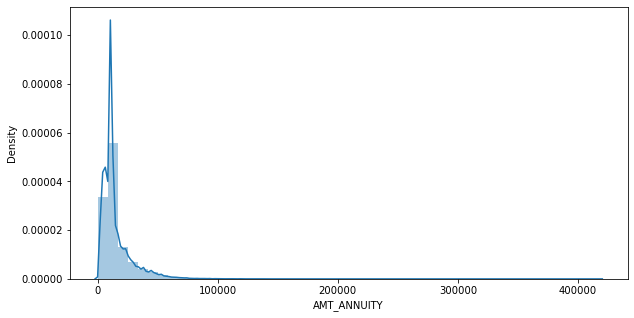

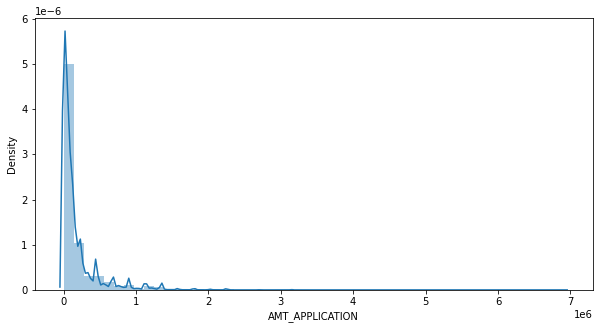

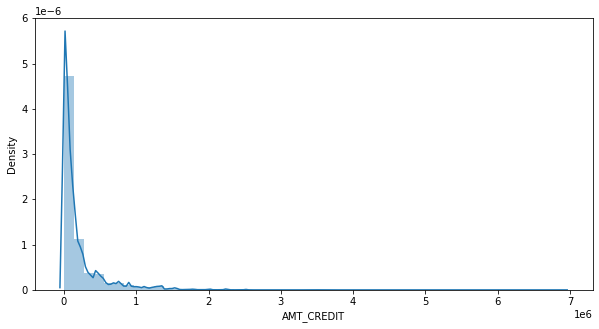

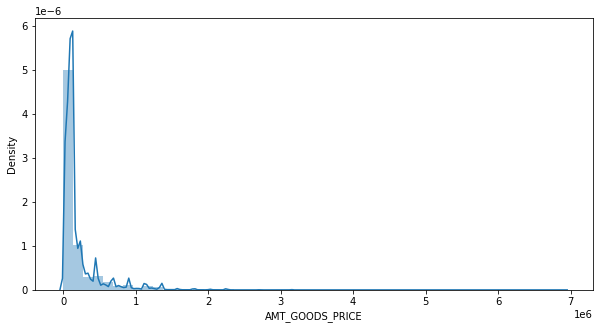

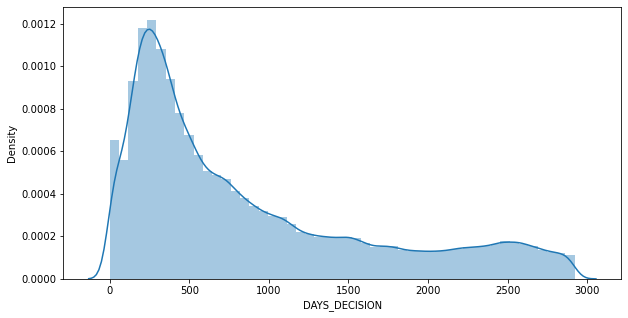

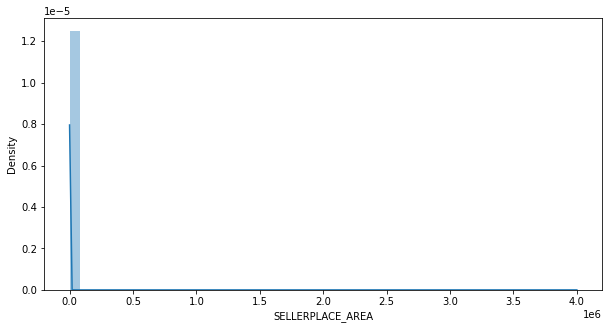

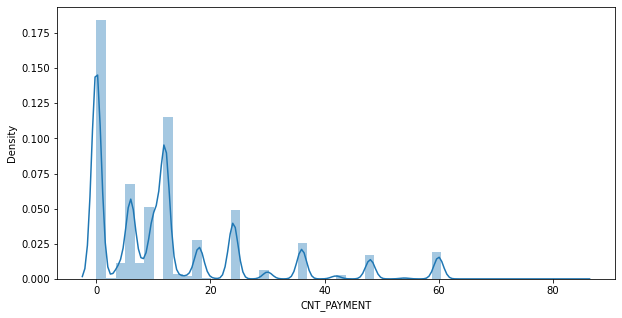

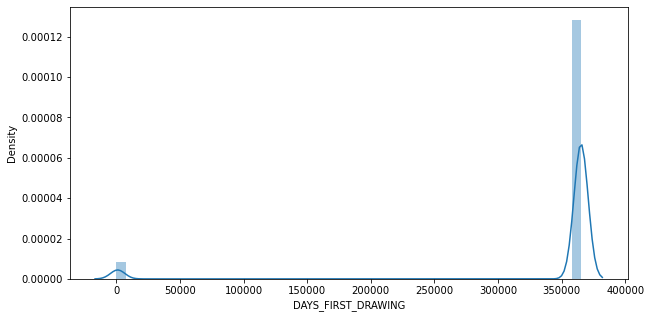

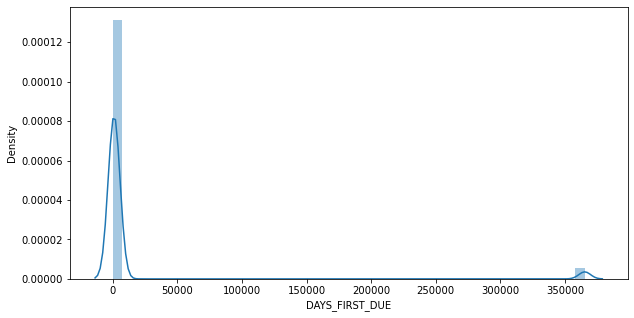

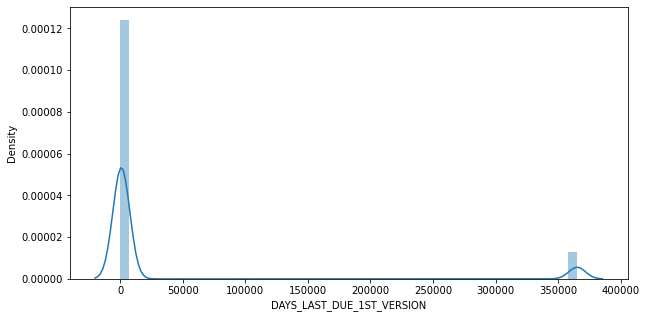

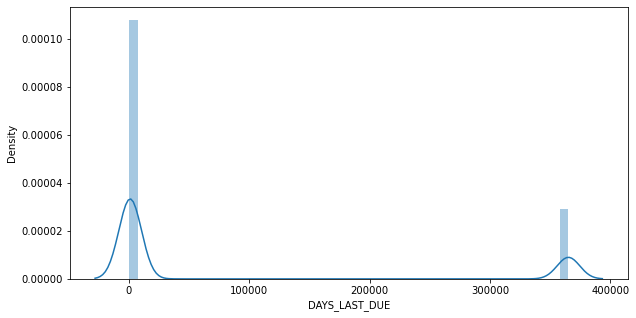

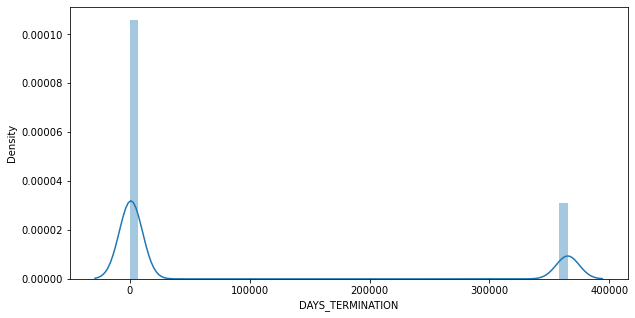

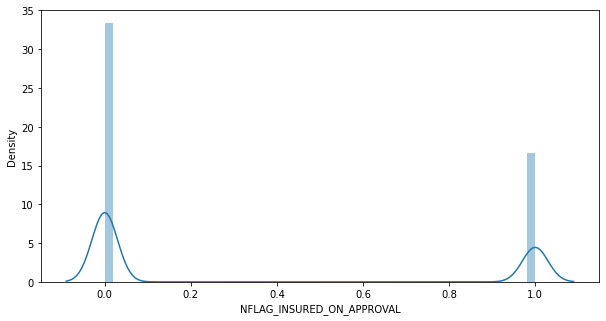

In [141]:
# Ploting distplot for all Numerical columns in df_pre

for col in df_pre_num:
    plt.figure(figsize=(10,5))
    sns.distplot(df_pre[col])
    plt.show()

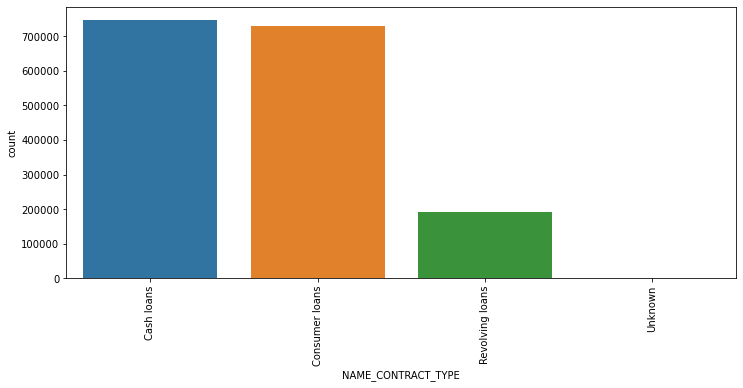

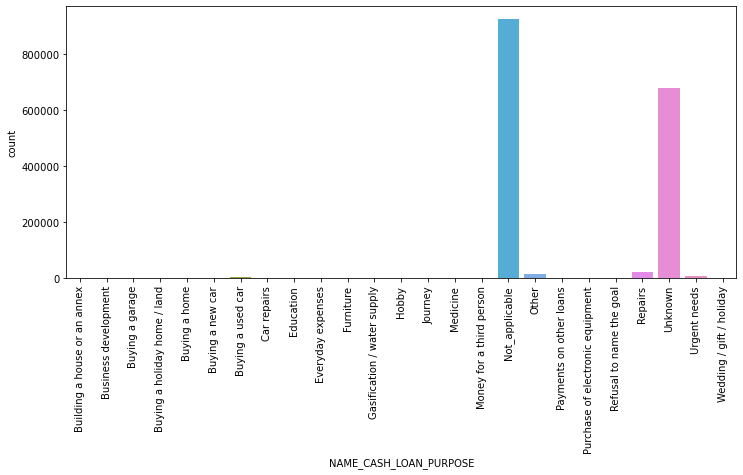

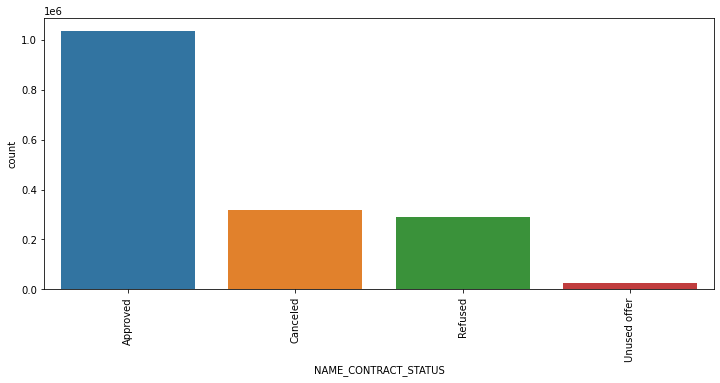

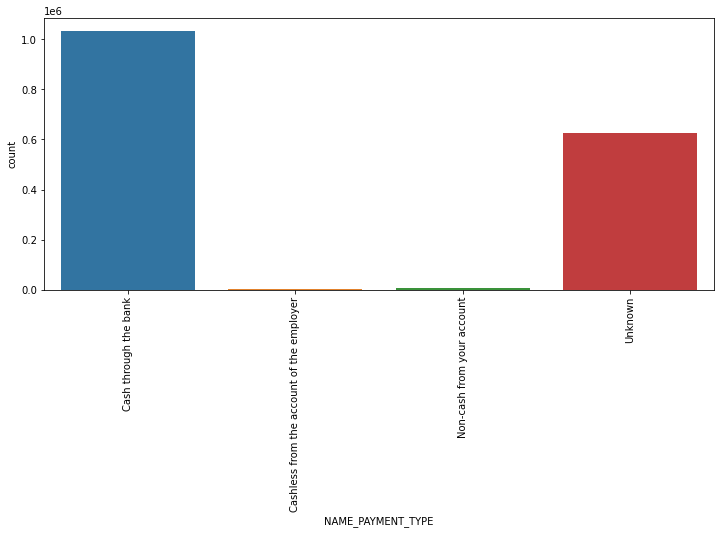

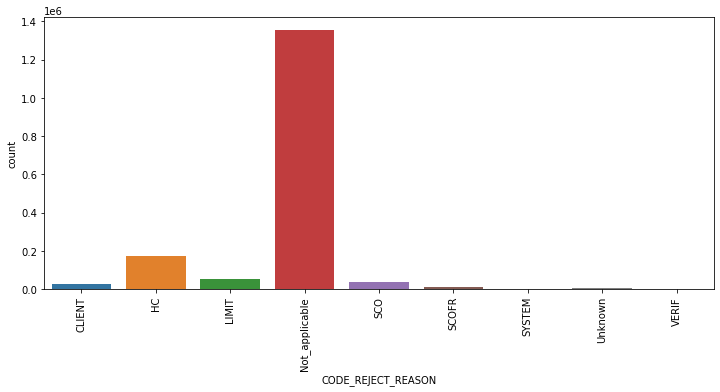

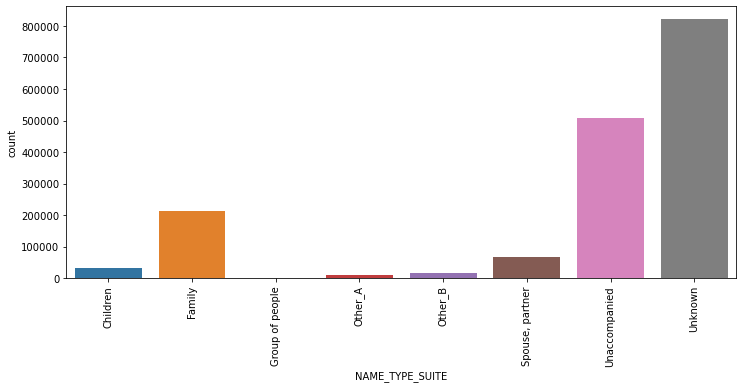

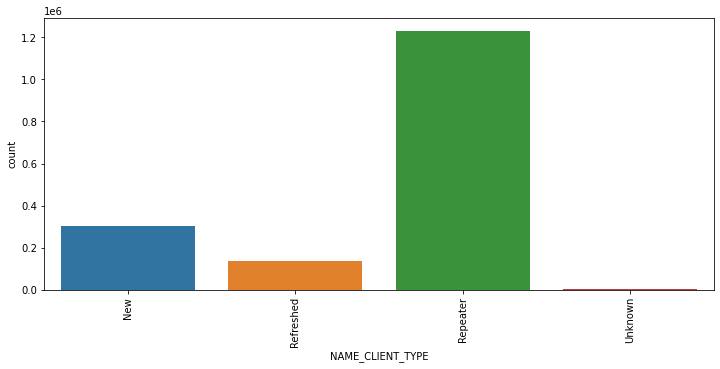

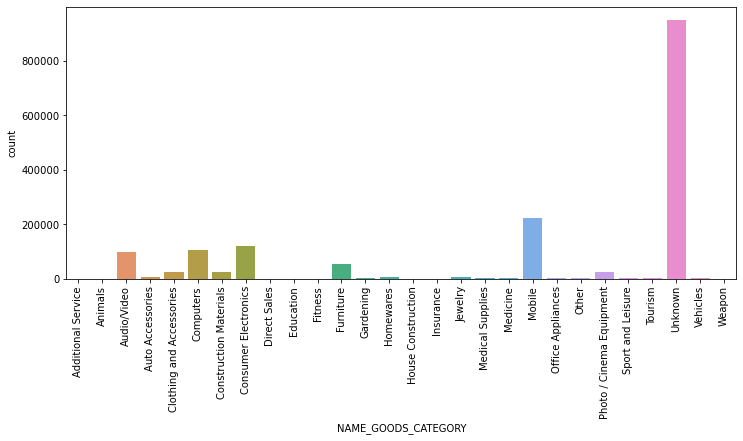

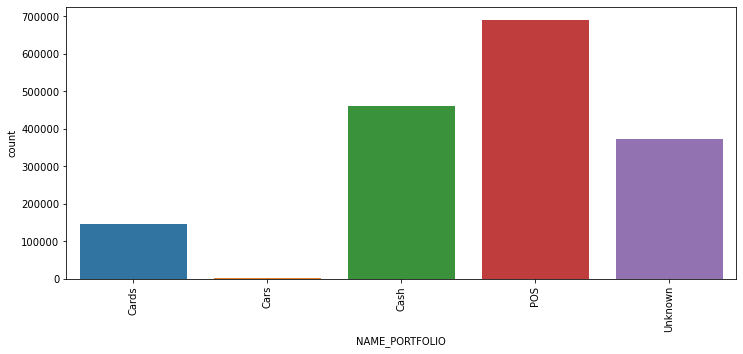

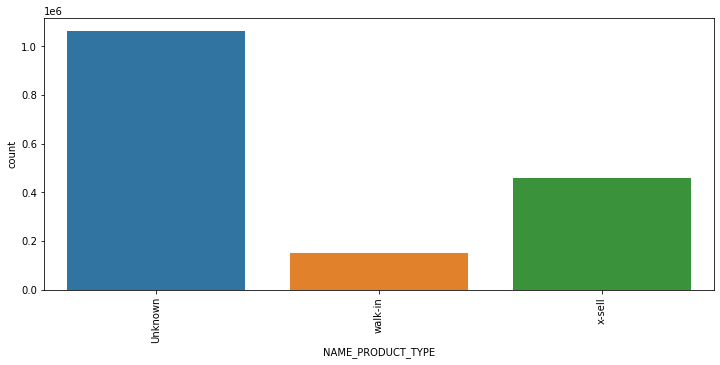

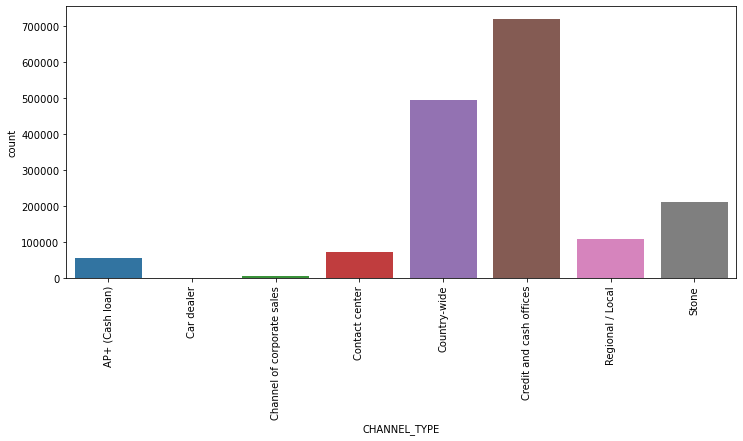

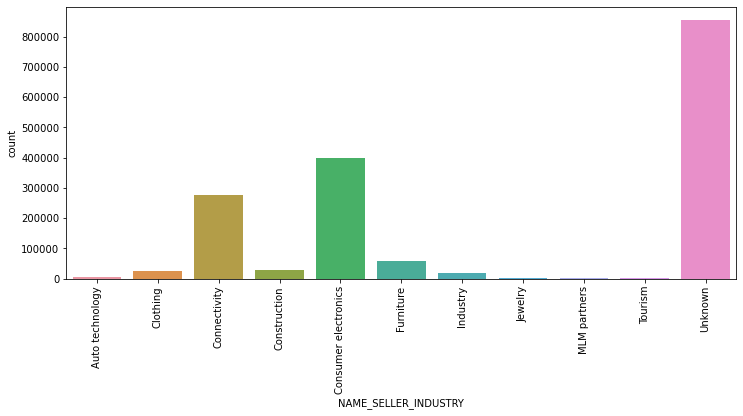

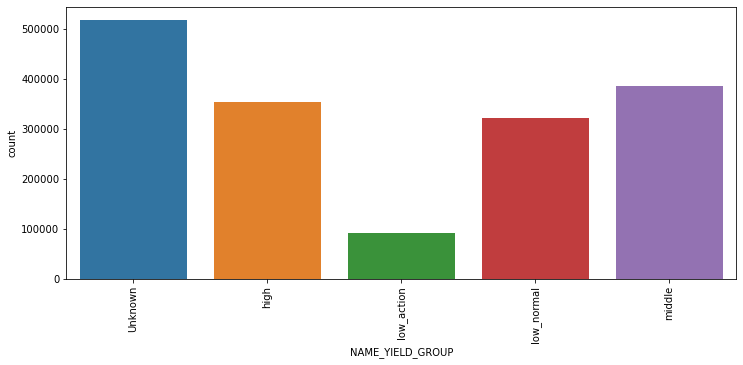

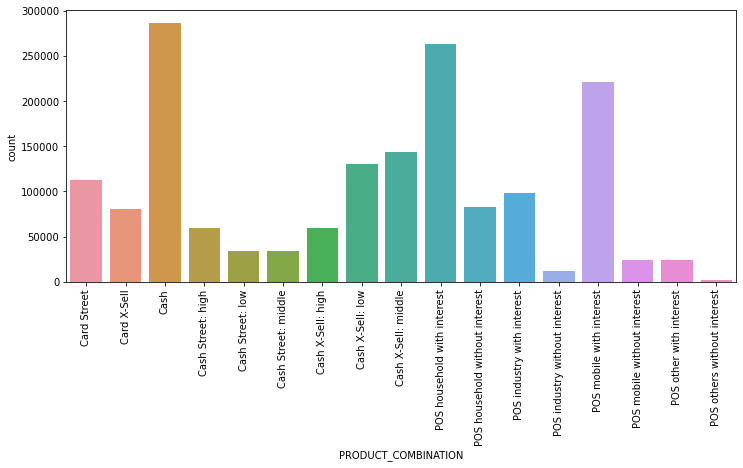

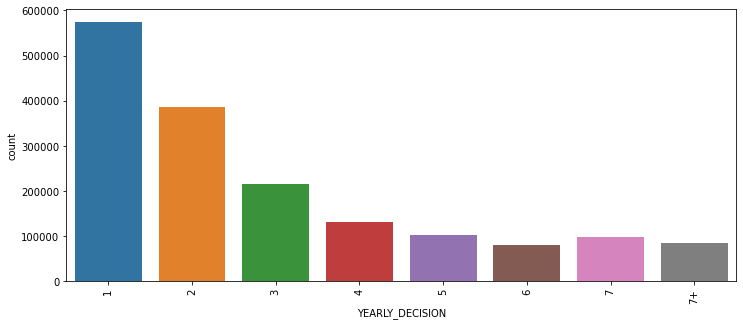

In [142]:
# Ploting countplot for all categorical columns in df_pre 

for col in df_pre_cat:
    plt.figure(figsize=(12,5))
    sns.countplot(df_pre[col])
    plt.xticks(rotation =90)
    plt.show()

### Merge dataframe

In [143]:
# Merge dataframe df and df_pre

previous_new = df.merge(df_pre, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
previous_new

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002  Defaulter           Cash loans           M            N   
1            100003    Repayer           Cash loans           F            N   
2            100003    Repayer           Cash loans           F            N   
3            100003    Repayer           Cash loans           F            N   
4            100004    Repayer      Revolving loans           M            Y   
...             ...        ...                  ...         ...          ...   
1413696      456255    Repayer           Cash loans           F            N   
1413697      456255    Repayer           Cash loans           F            N   
1413698      456255    Repayer           Cash loans           F            N   
1413699      456255    Repayer           Cash loans           F            N   
1413700      456255    Repayer           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1413696               N             0          157500.0      675000.0   
1413697               N             0          157500.0      675000.0   
1413698               N             0          157500.0      675000.0   
1413699               N             0          157500.0      675000.0   
1413700               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
0              24700.5           351000.0     Unaccompanied   
1              35698.5          1129500.0            Family   
2              35698.5          1129500.0            Family   
3              35698.5          1129500.0            Family   
4               6750.0           135000.0     Unaccompanied   
...                ...                ...               ...   
1413696        49117.5           675000.0     Unaccompanied   
1413697        49117.5           675000.0     Unaccompanied   
1413698        49117.5           675000.0     Unaccompanied   
1413699        49117.5           675000.0     Unaccompanied   
1413700        49117.5           675000.0     Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1413696  Commercial associate               Higher education   
1413697  Commercial associate               Higher education   
1413698  Commercial associate               Higher education   
1413699  Commercial associate               Higher education   
1413700  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                       ...                ...                         ...   
1413696               Married  House / apartment                    0.046220   
14136

In [144]:
#  Creating function for analysis

def mar_bi_tar(x):
    plt.figure(figsize=(15,5))
    sns.countplot(x=x,hue="TARGET",data=previous_new)
    plt.xticks(rotation =90)
    plt.show()

In [145]:
# Creating function for analysis 

def mar_bi_st(x):
    plt.figure(figsize=(15,5))
    sns.countplot(x=x,hue="NAME_CONTRACT_STATUS",data=previous_new)
    plt.xticks(rotation =90)
    plt.show()

In [146]:
# Category variable

pr_n_col=["NAME_CONTRACT_TYPE_x",'CODE_GENDER',"FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE_x","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",'NAME_FAMILY_STATUS',"NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE","AMT_INCOME_TOTAL_BINS","AMT_CREDIT_BINS","AMT_ANNUITY_BINS","AMT_GOODS_PRICE_BINS","DAYS_REGISTRATION_BINS","DAYS_ID_PUBLISH_BINS","DAYS_LAST_PHONE_CHANGE_BINS","AGE_GROUP",'CUR_EMPLOYED_YEARS_GROUP',"NAME_CONTRACT_TYPE_y",'NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE',"CODE_REJECT_REASON","NAME_TYPE_SUITE_y","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","YEARLY_DECISION"]           

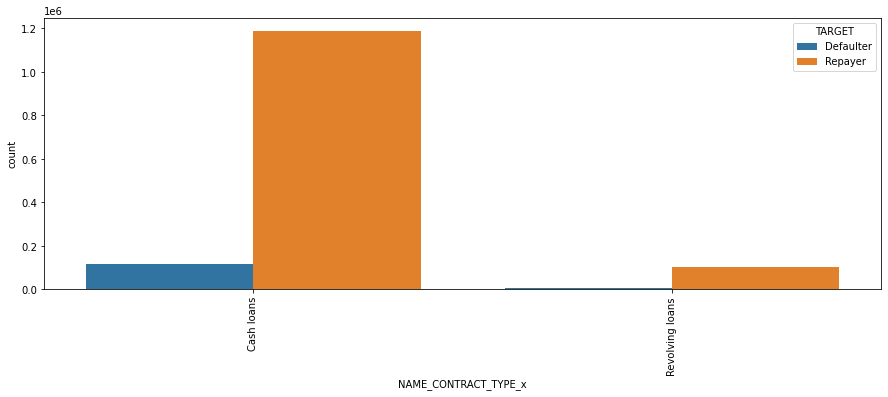

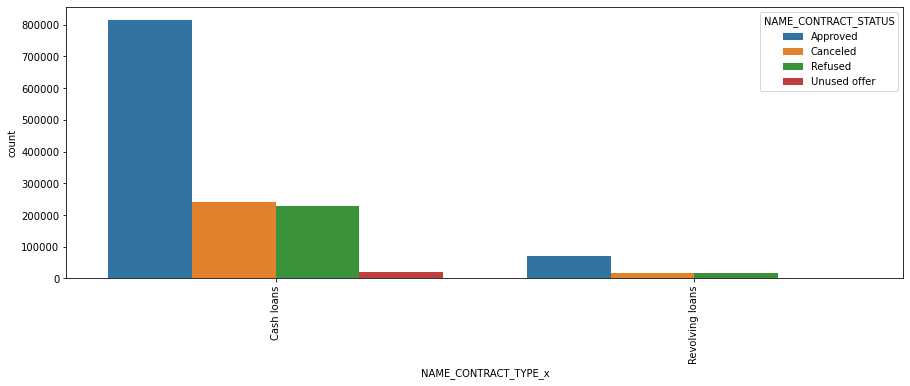

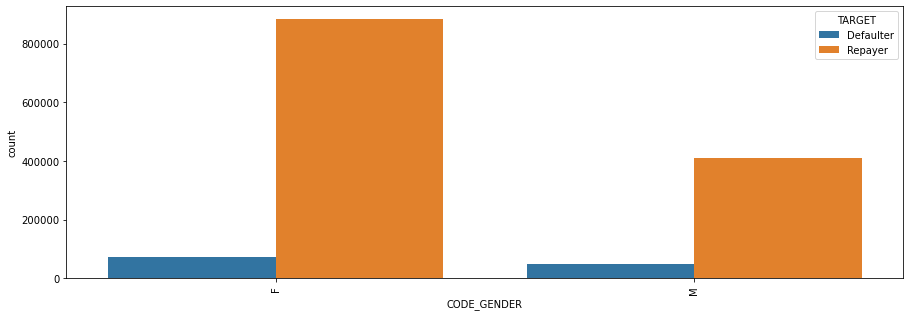

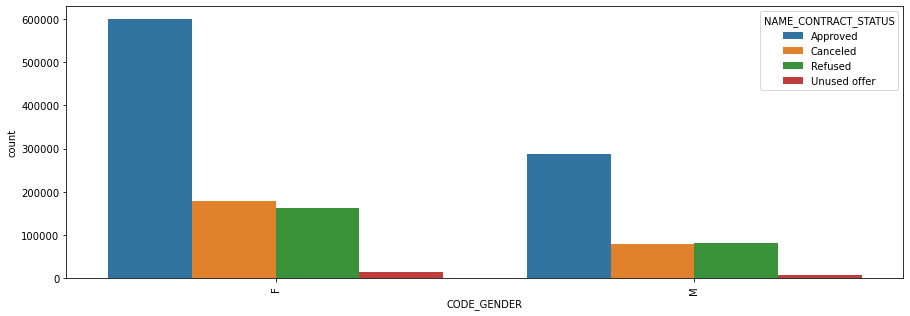

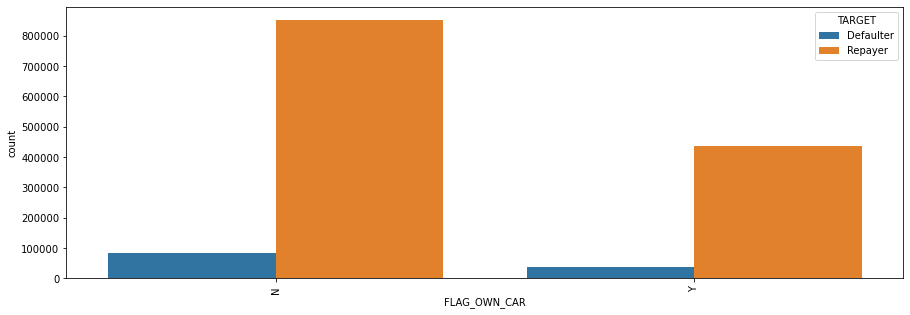

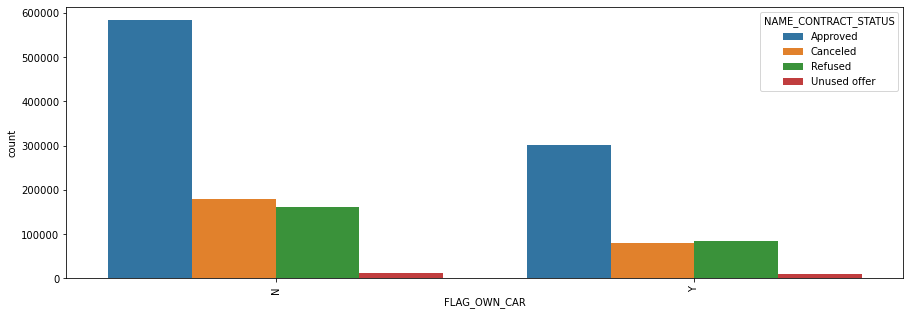

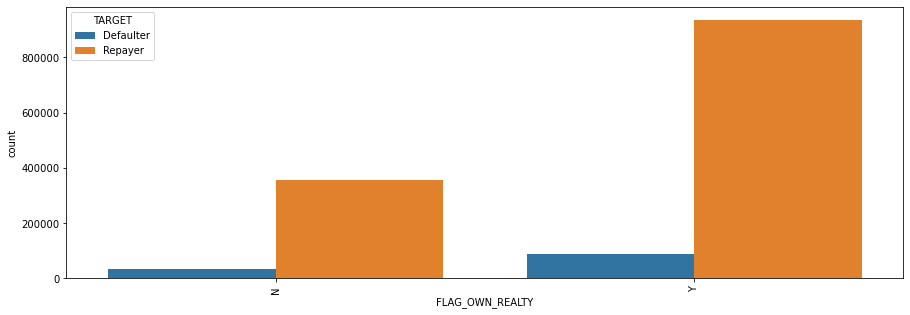

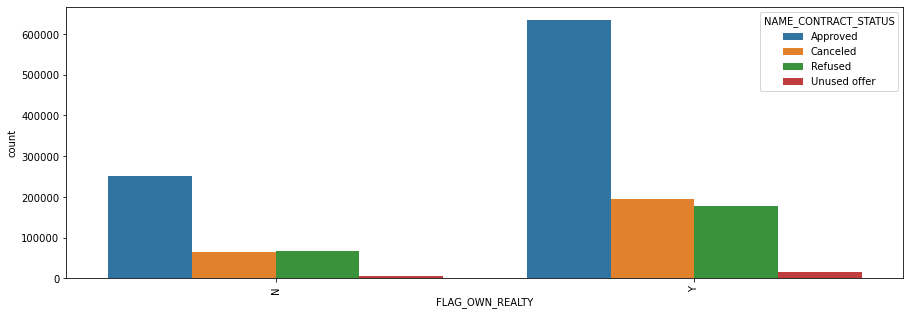

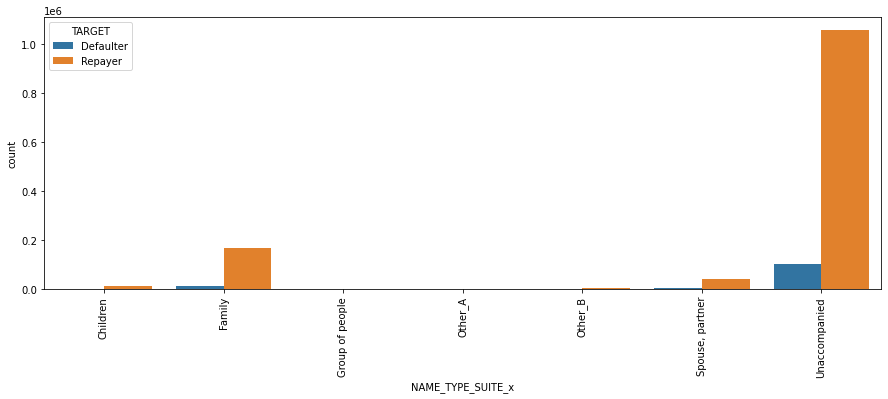

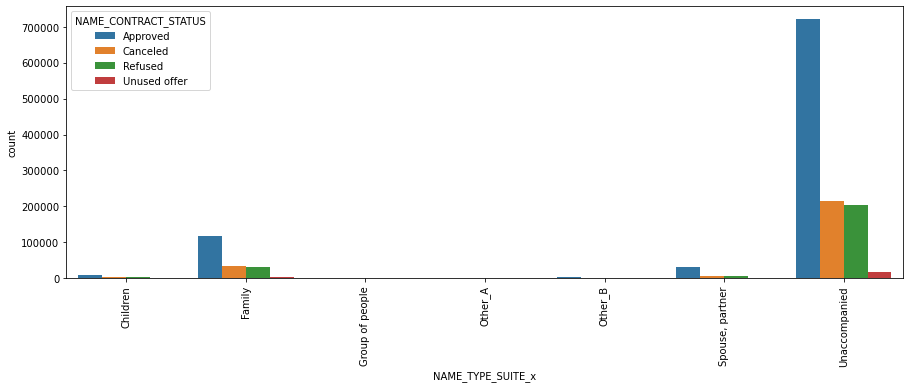

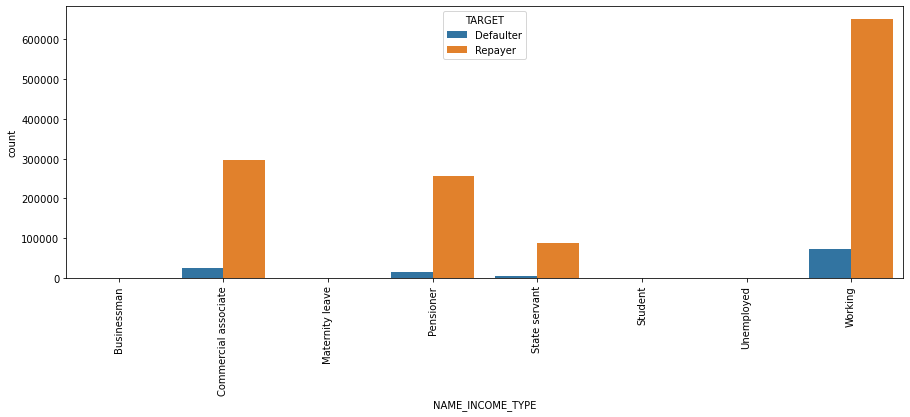

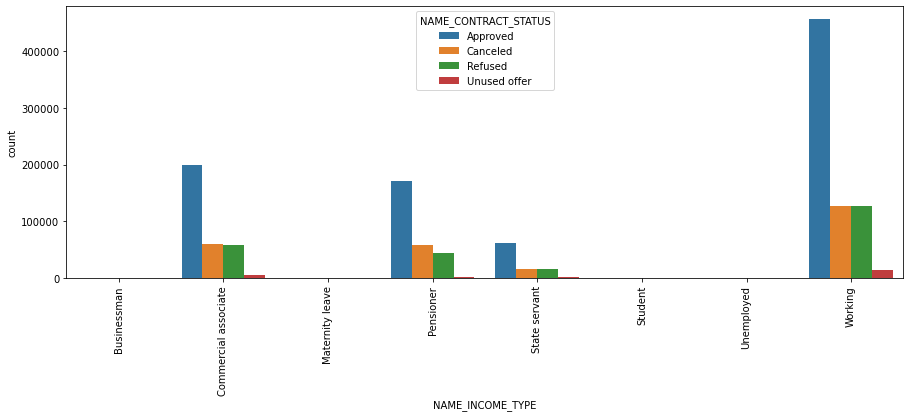

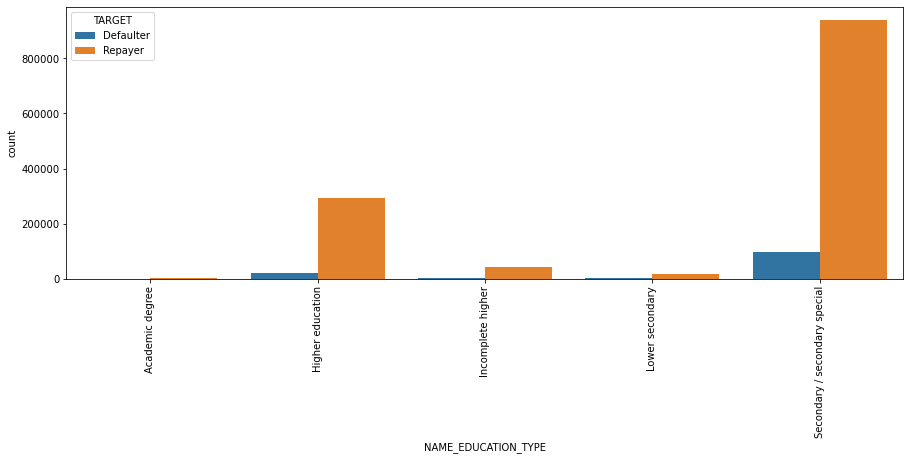

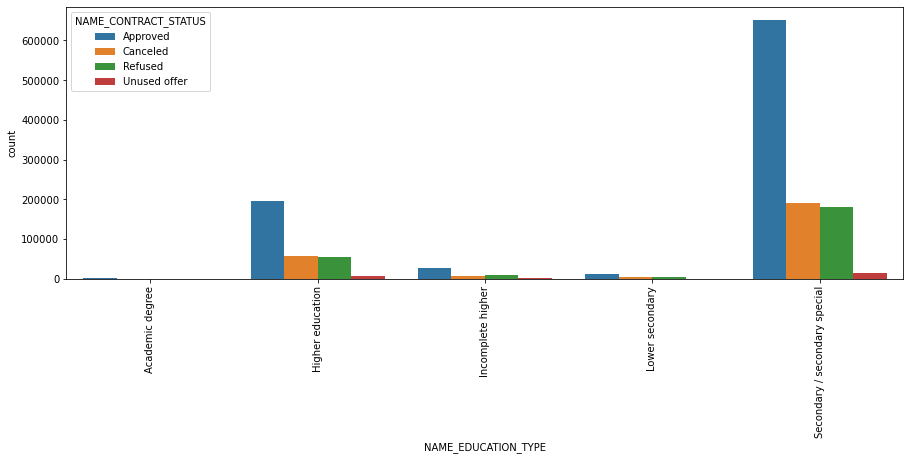

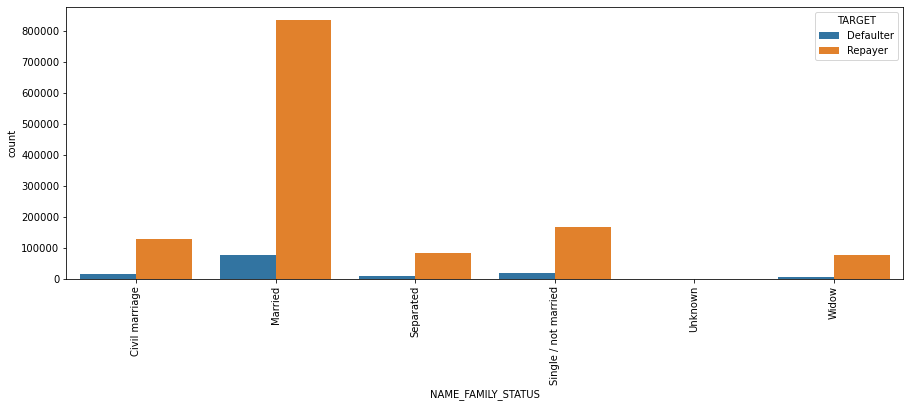

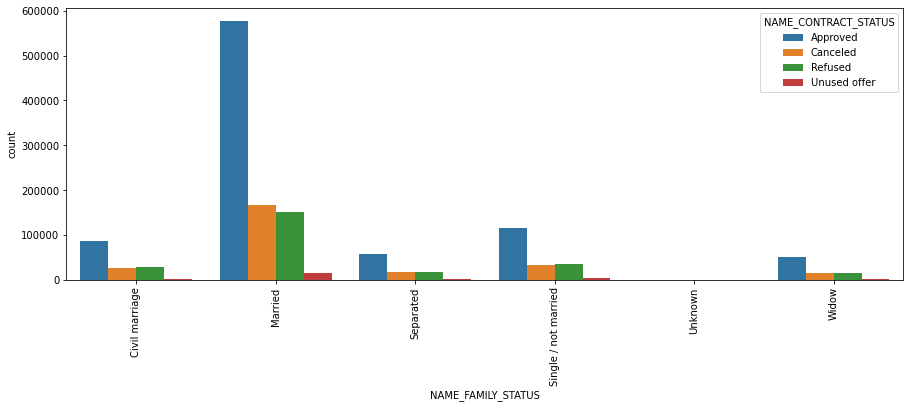

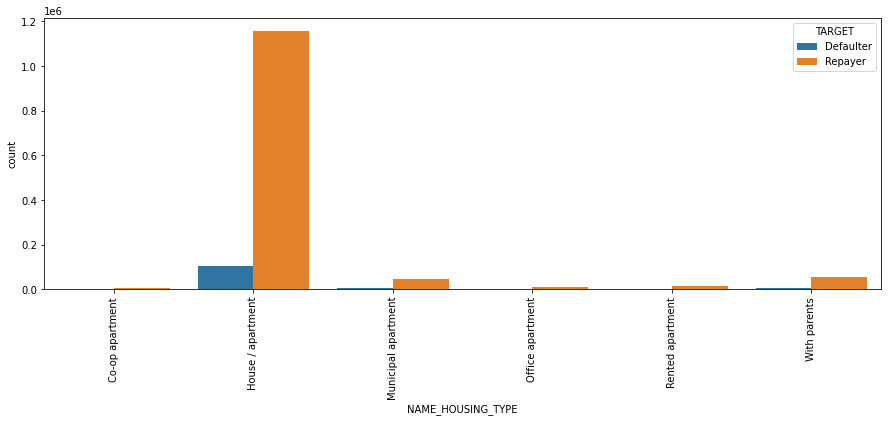

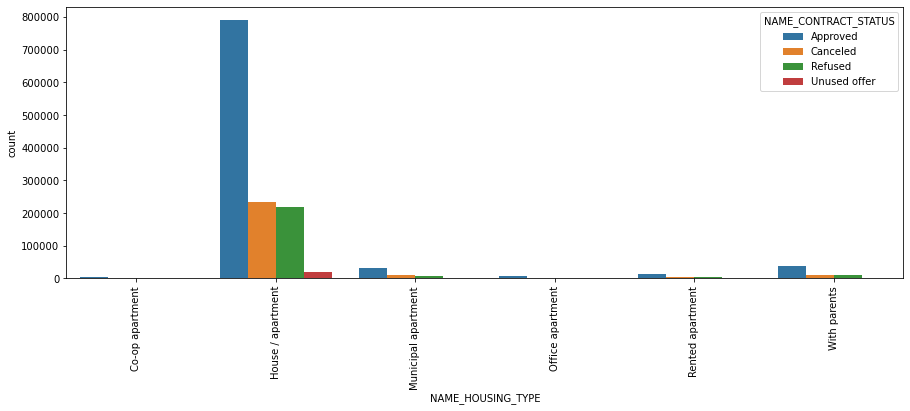

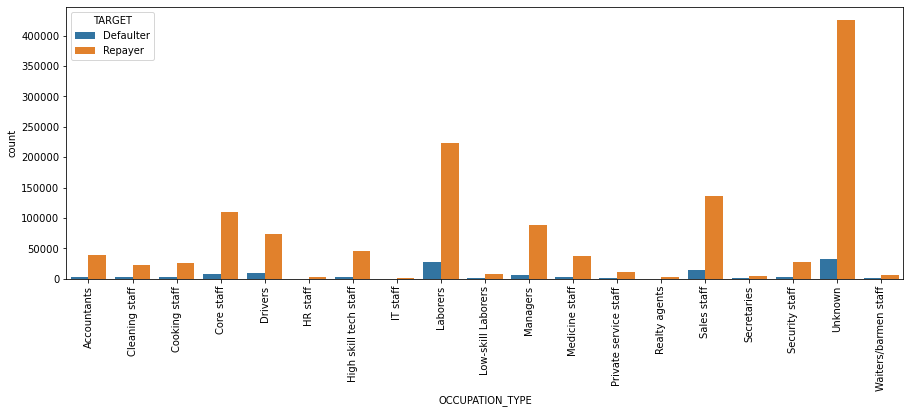

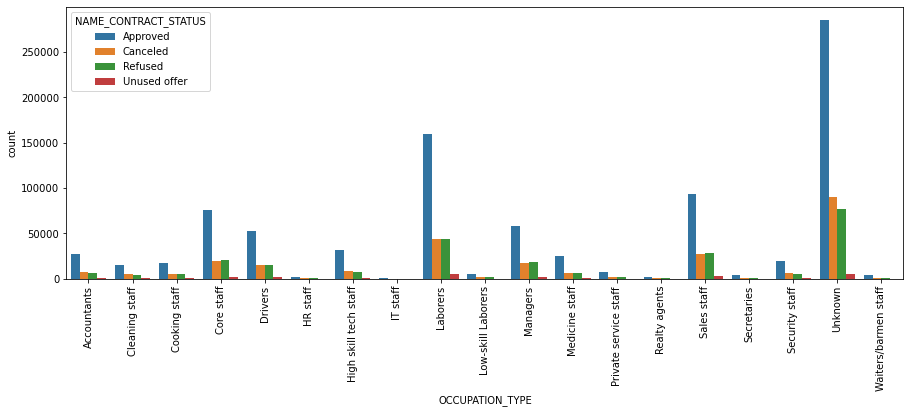

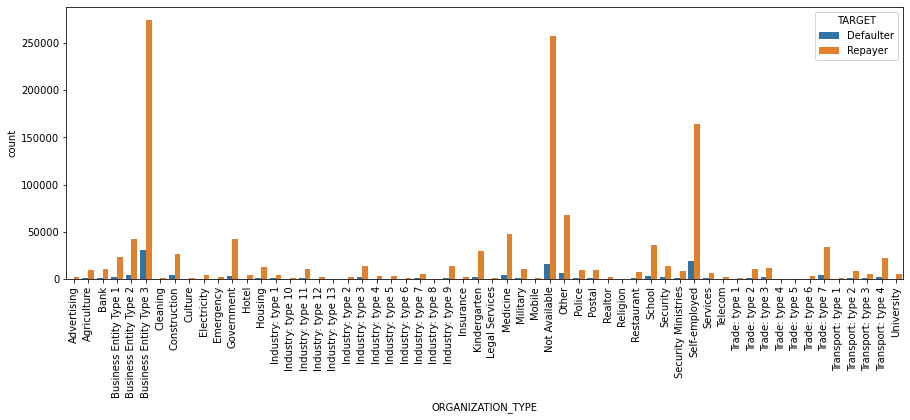

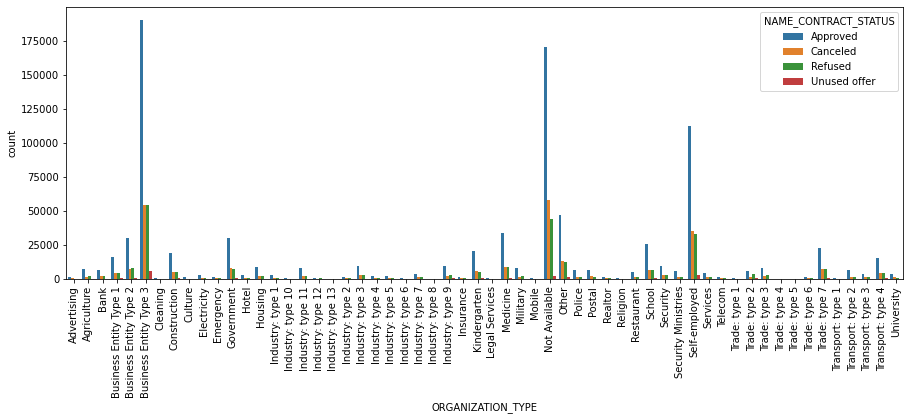

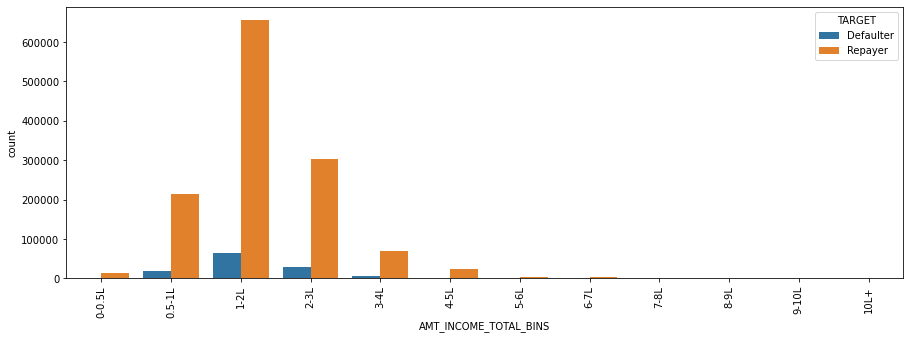

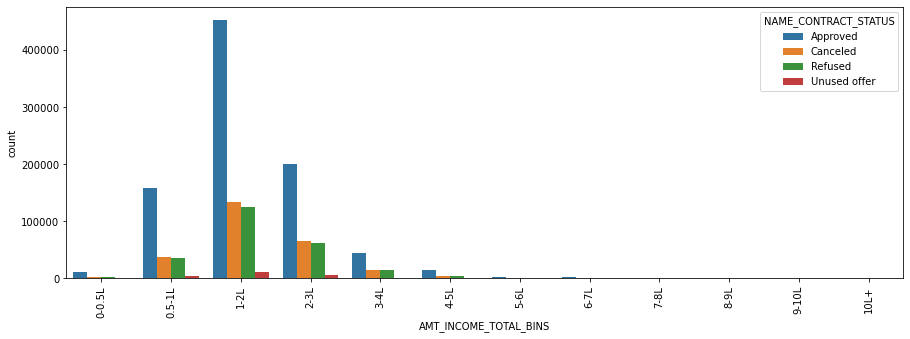

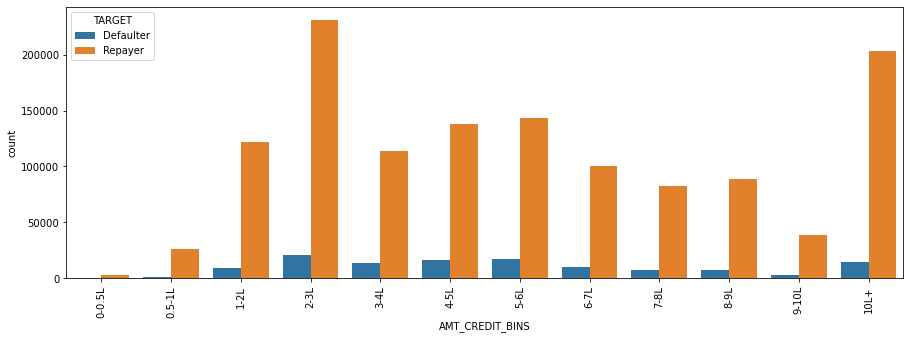

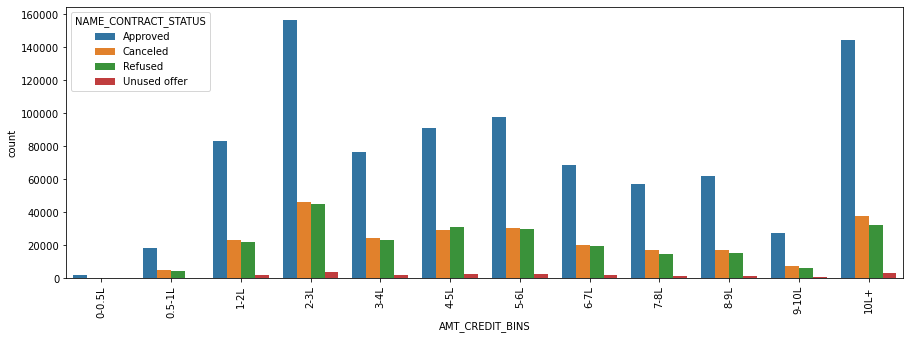

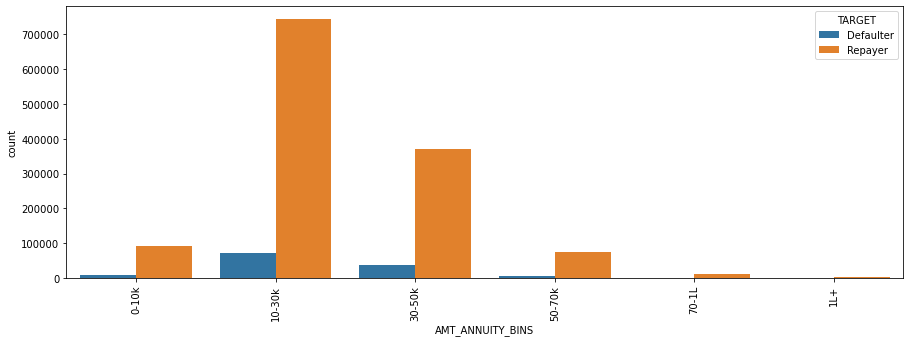

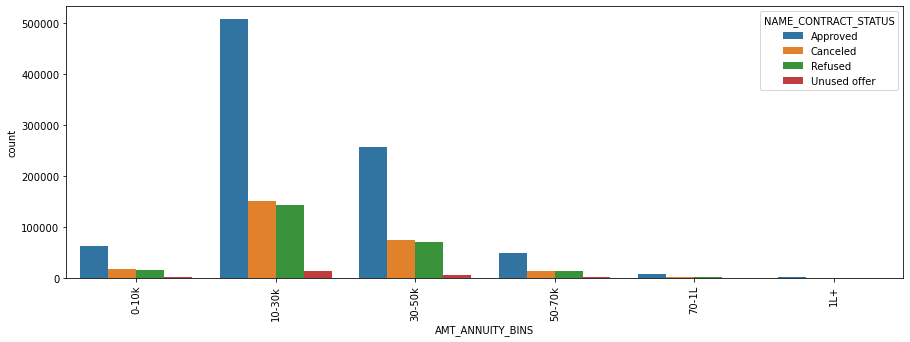

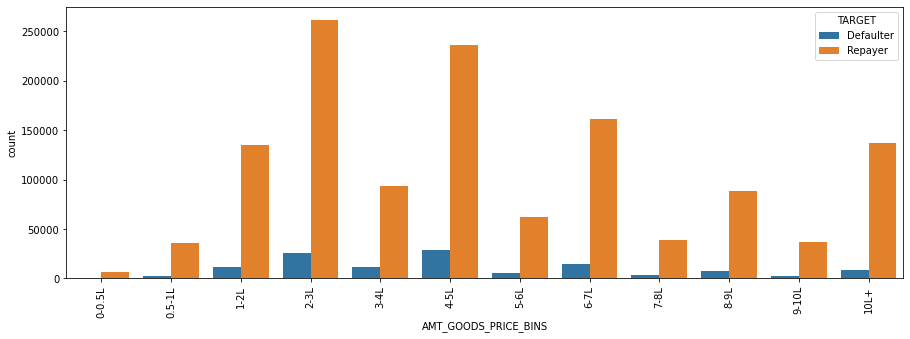

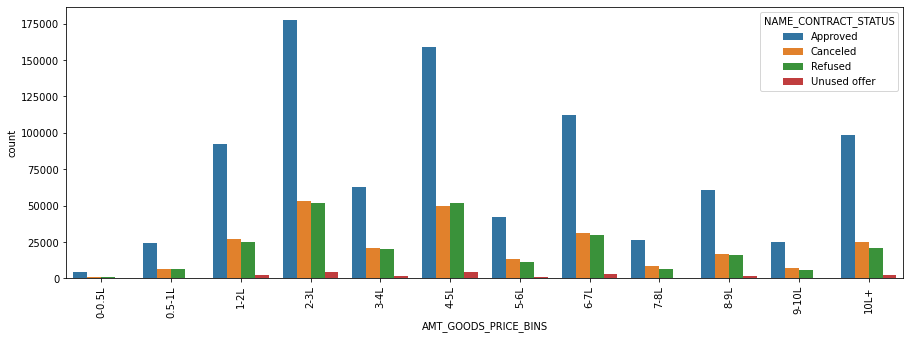

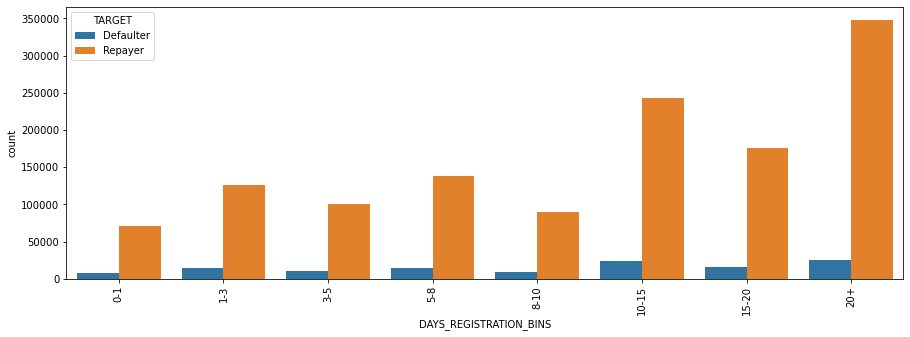

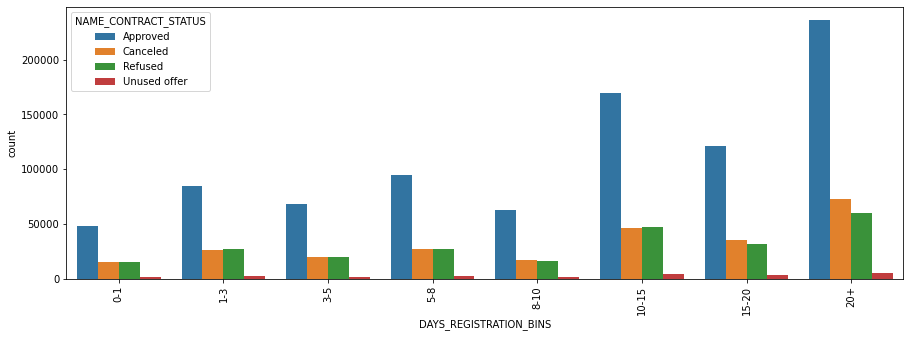

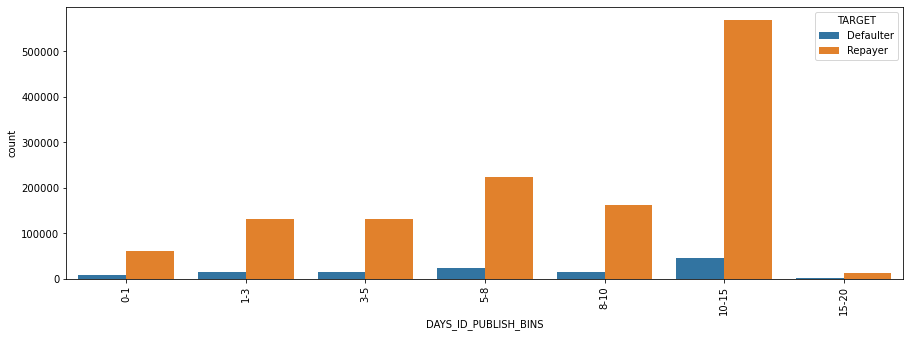

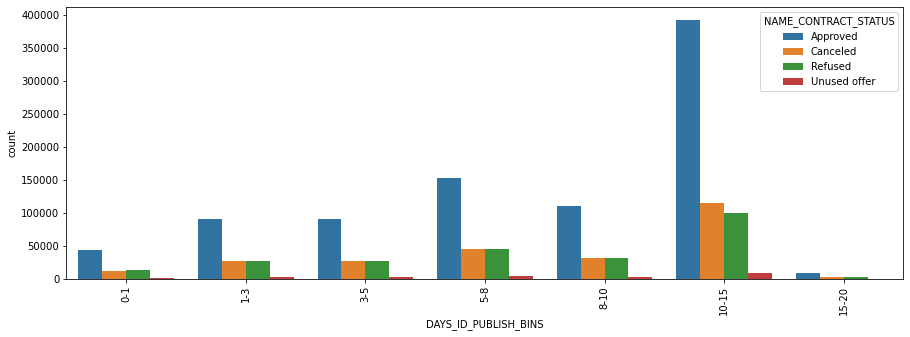

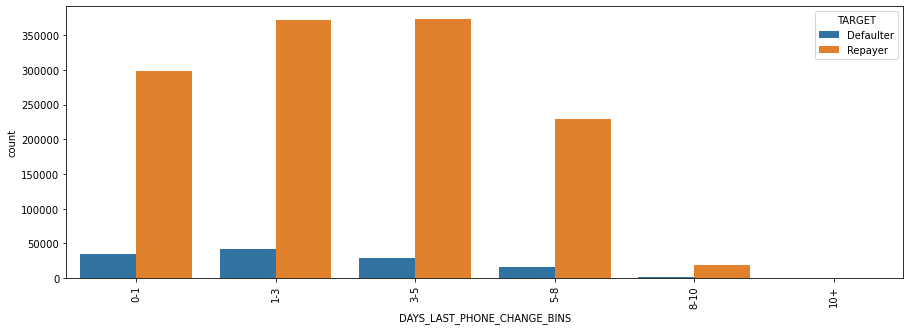

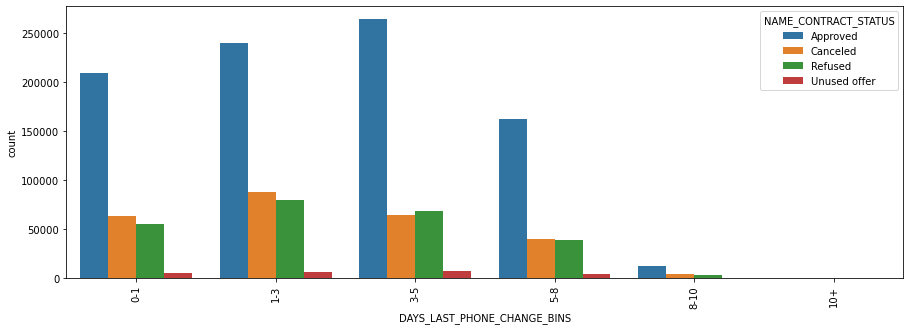

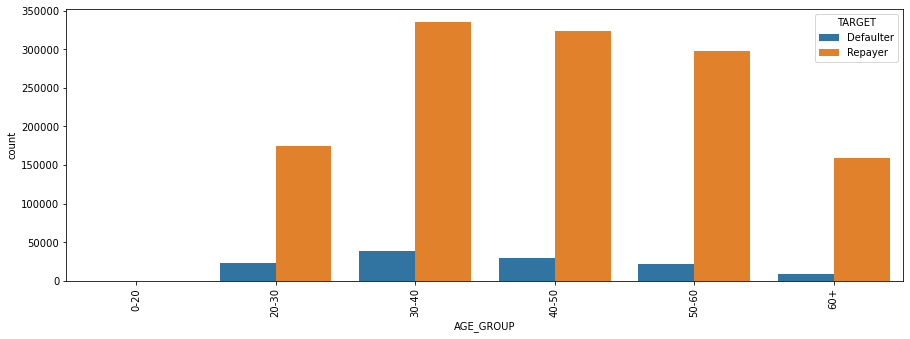

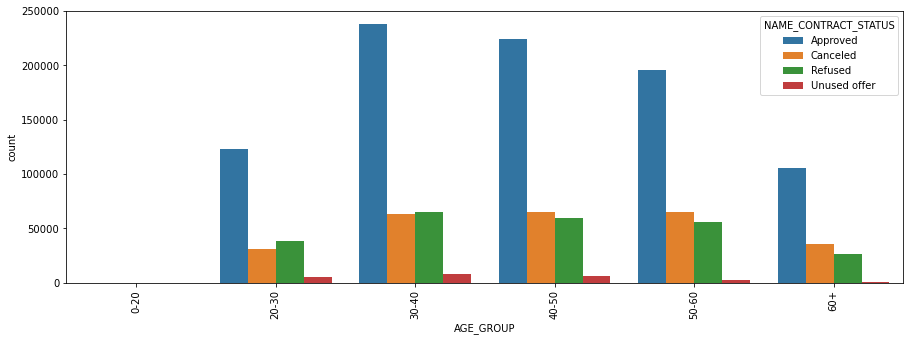

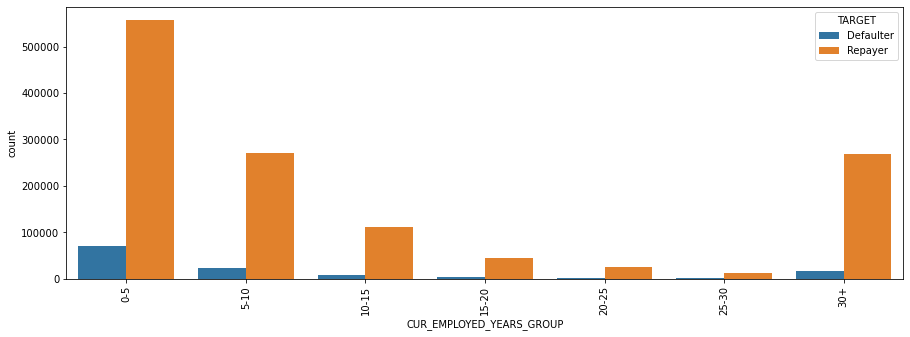

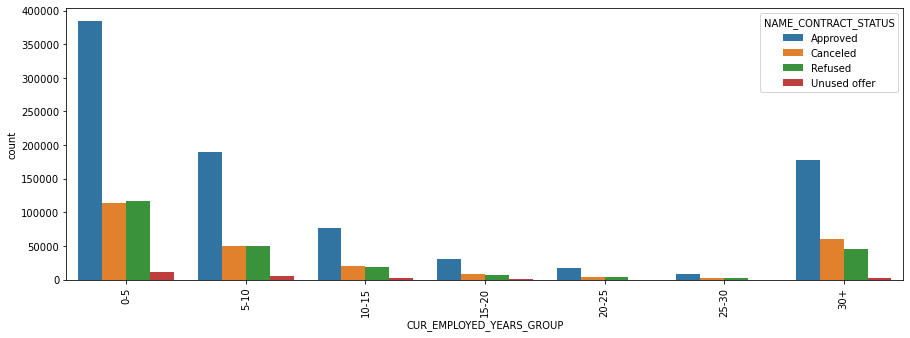

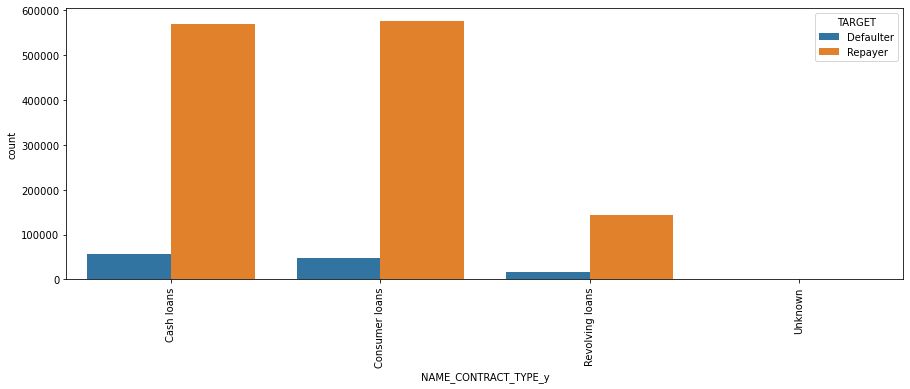

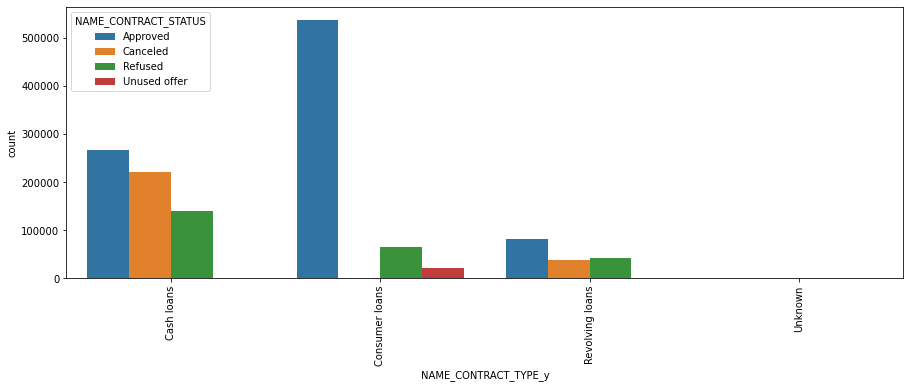

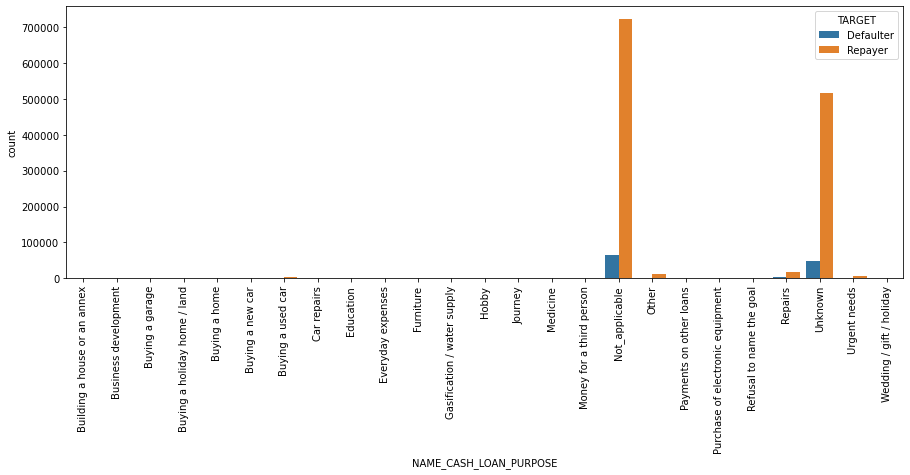

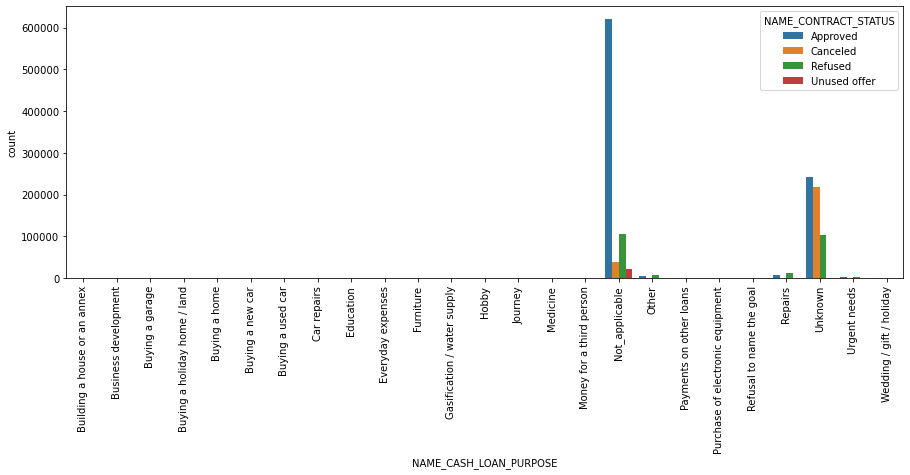

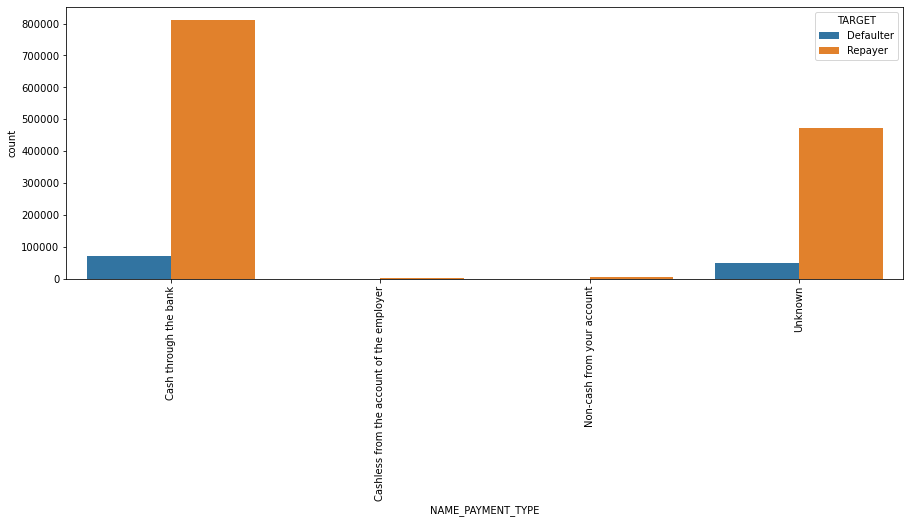

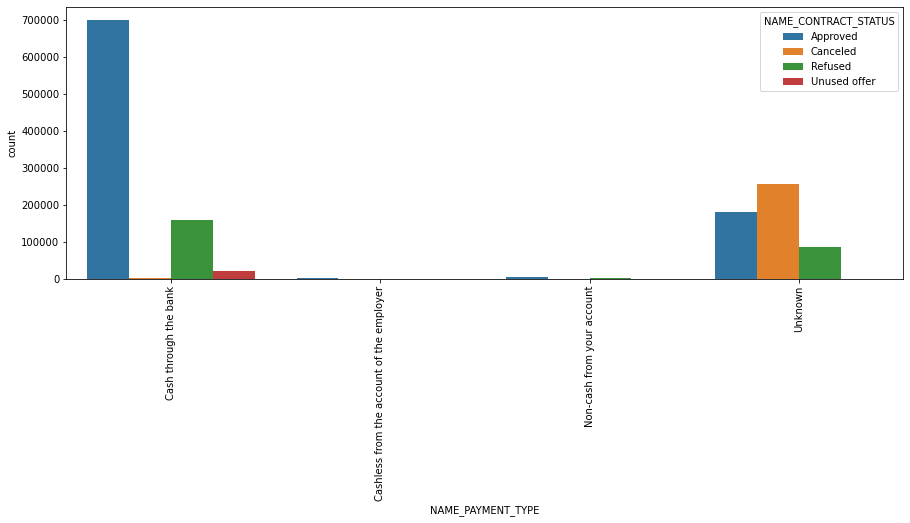

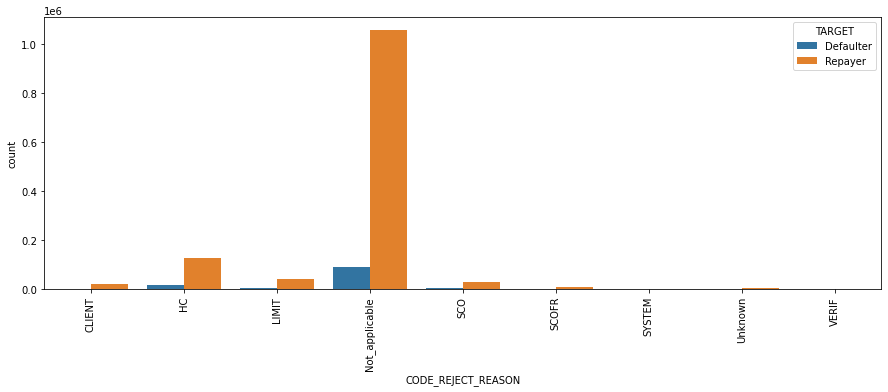

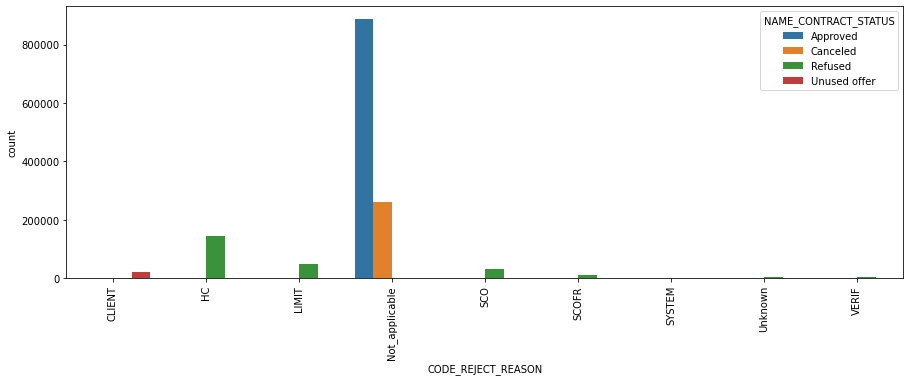

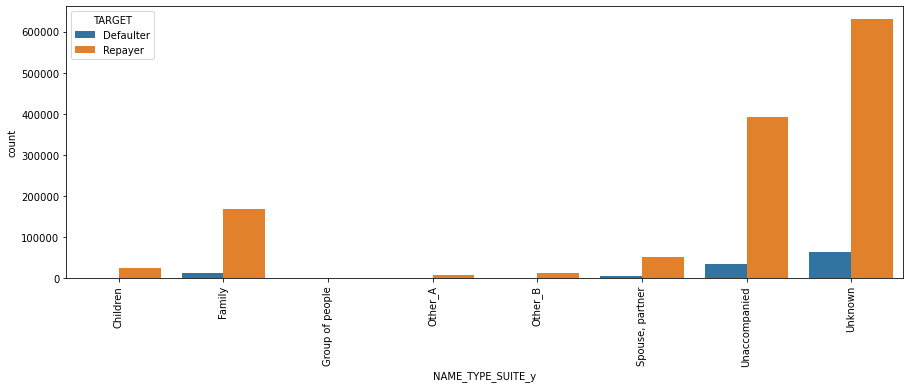

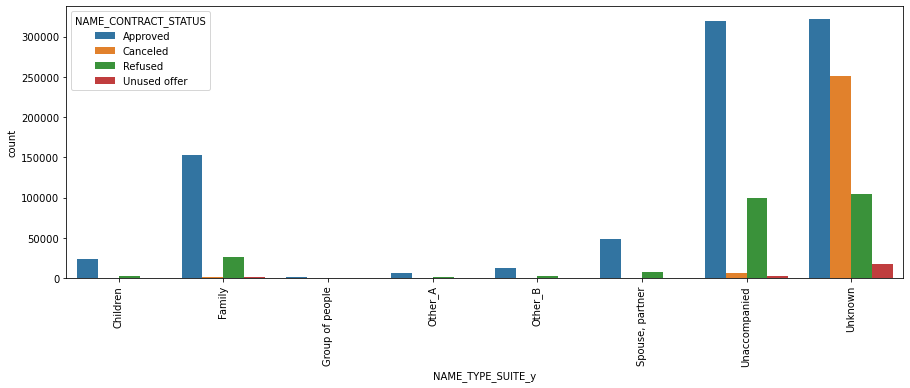

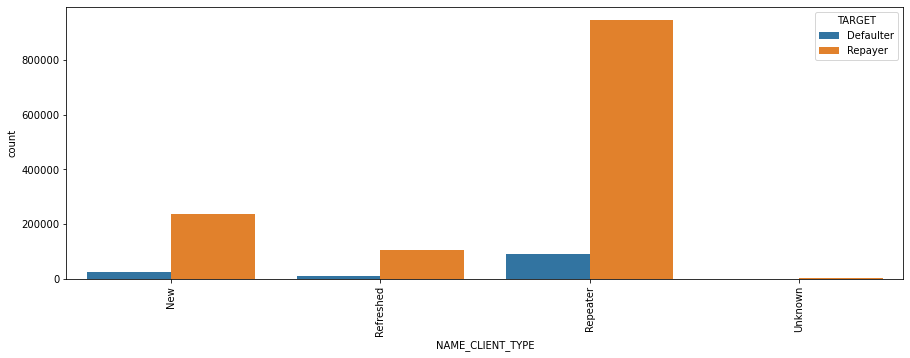

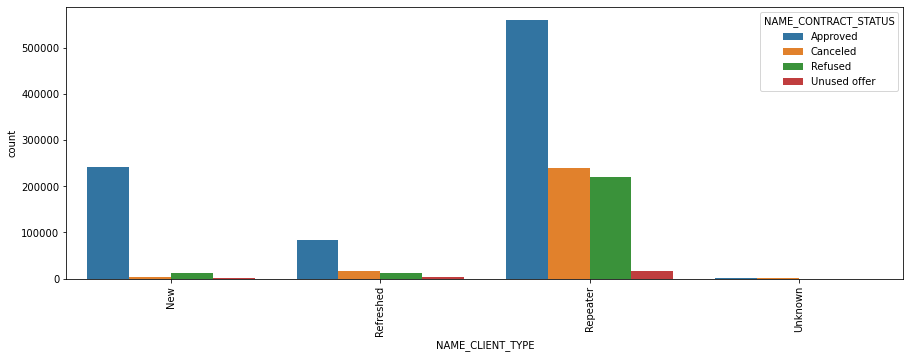

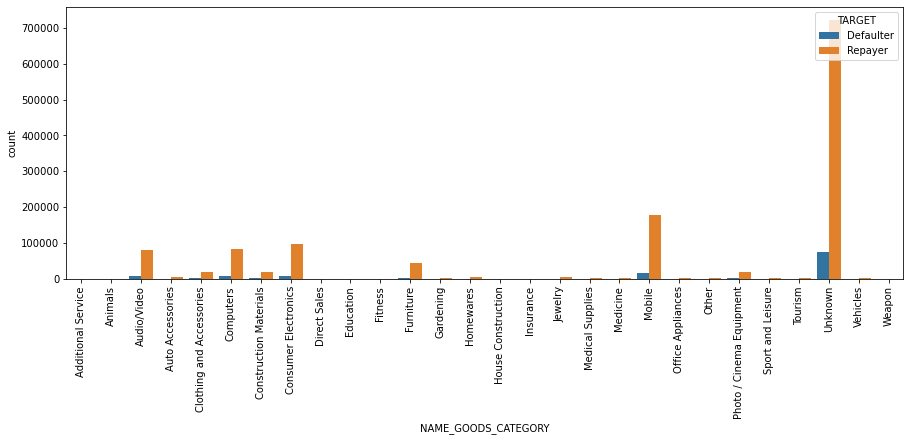

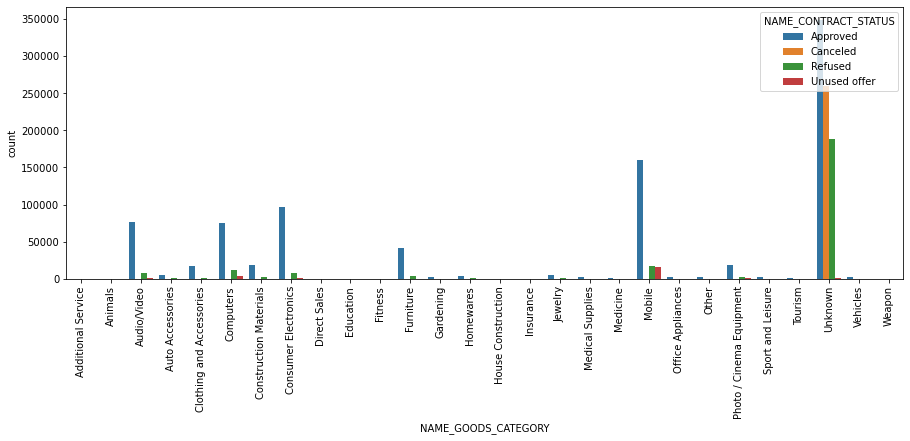

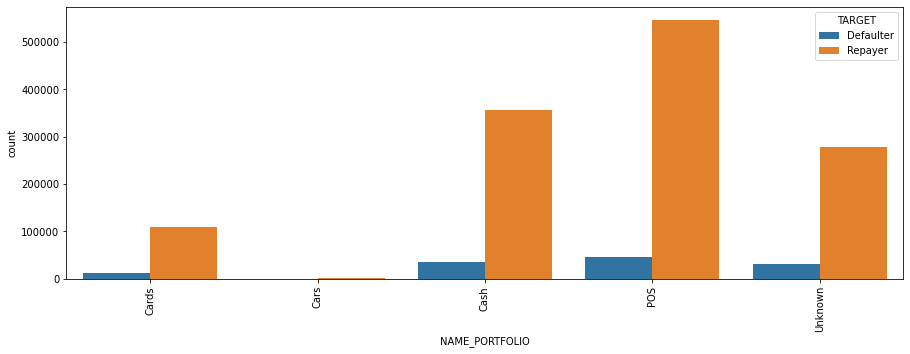

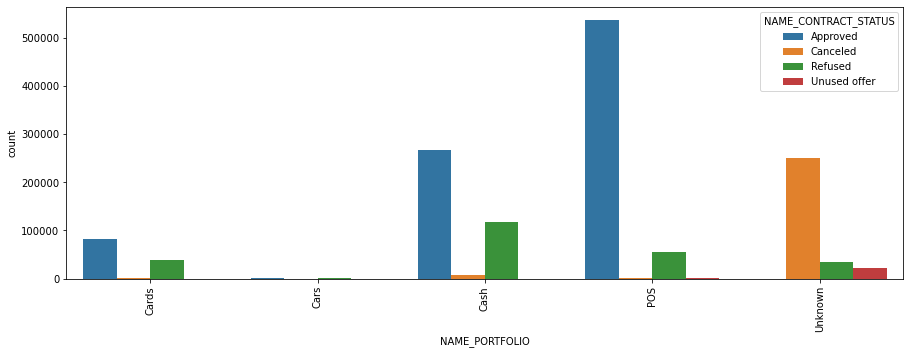

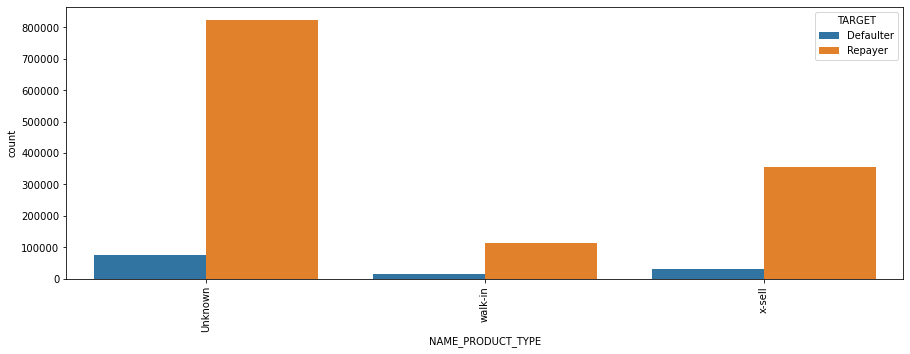

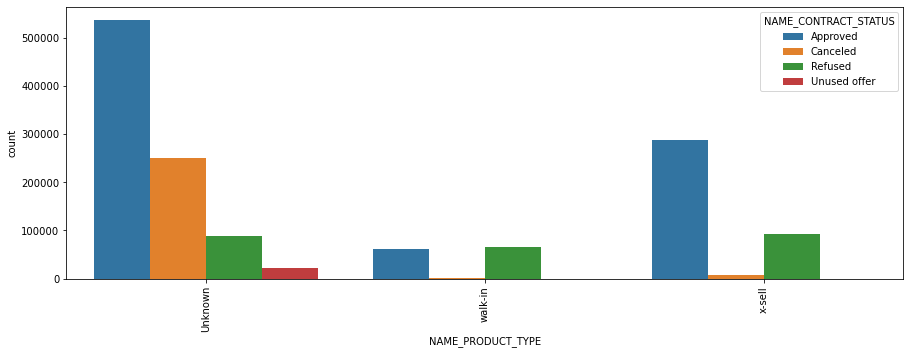

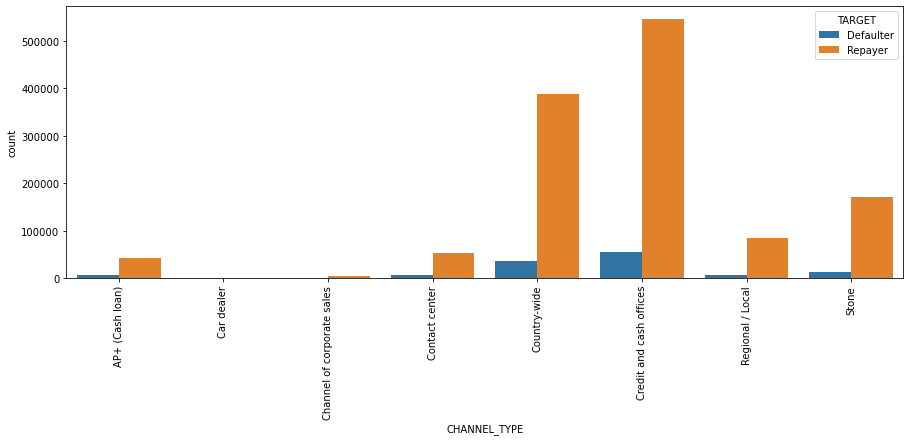

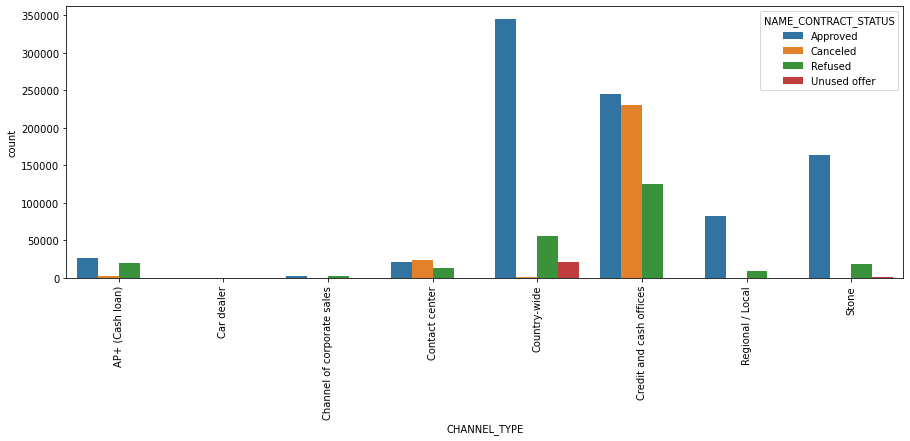

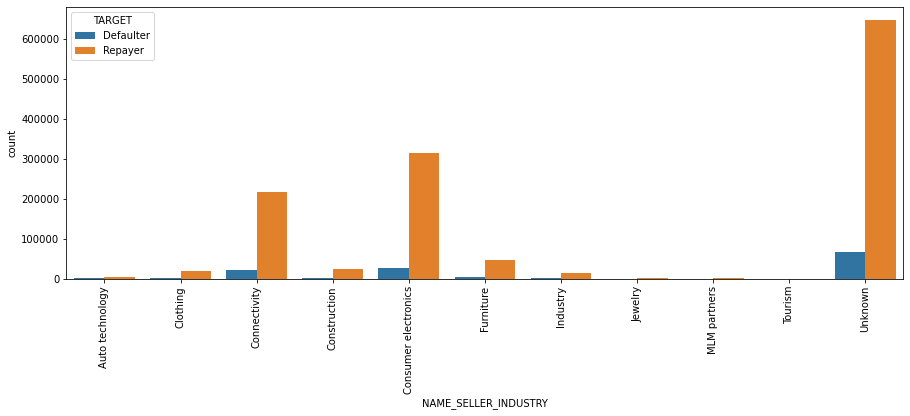

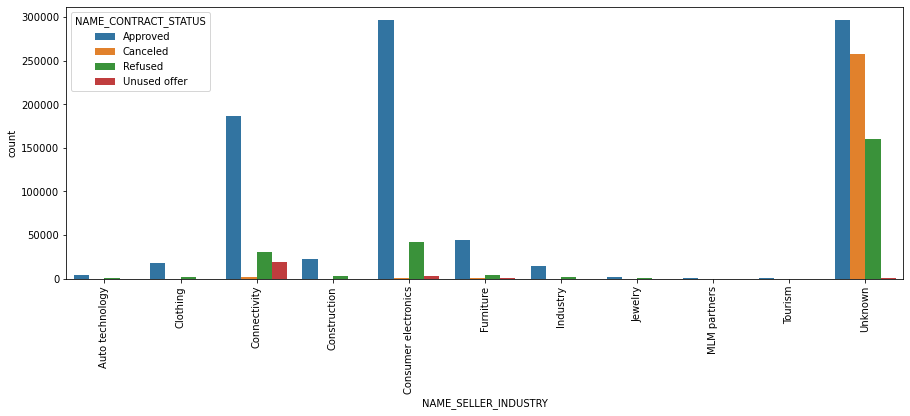

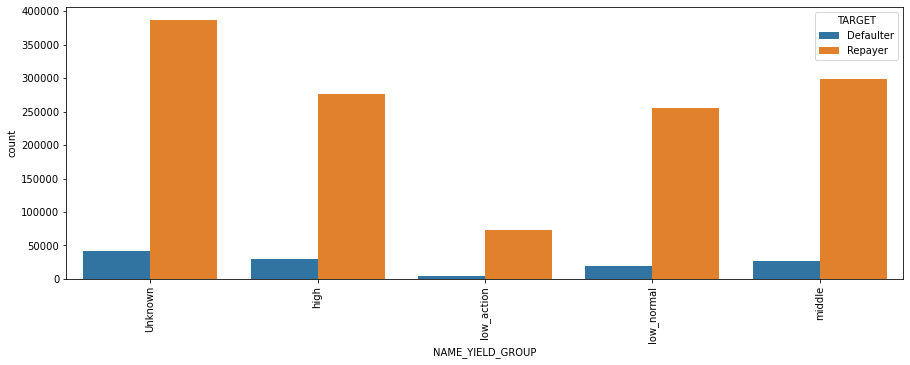

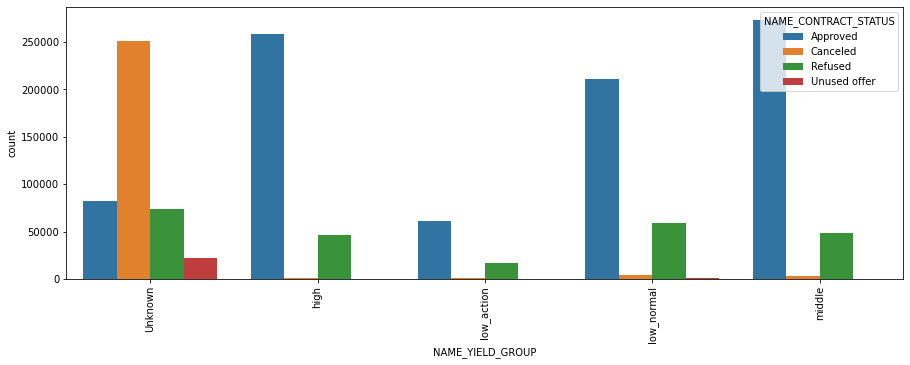

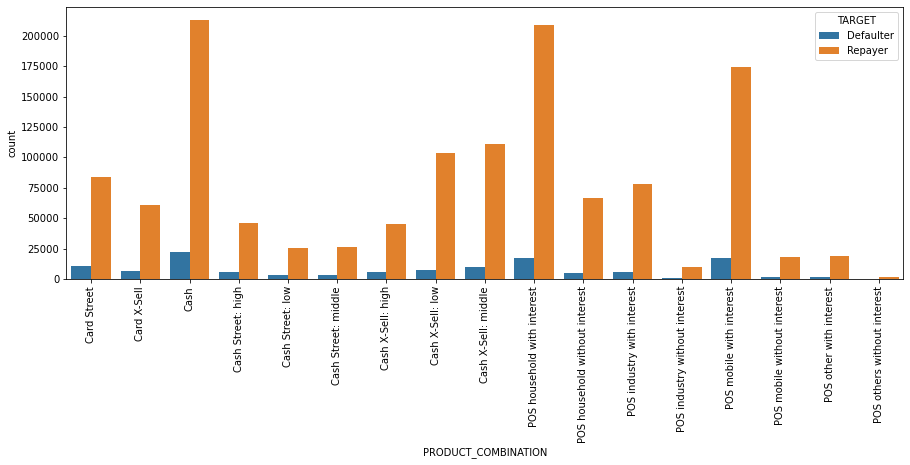

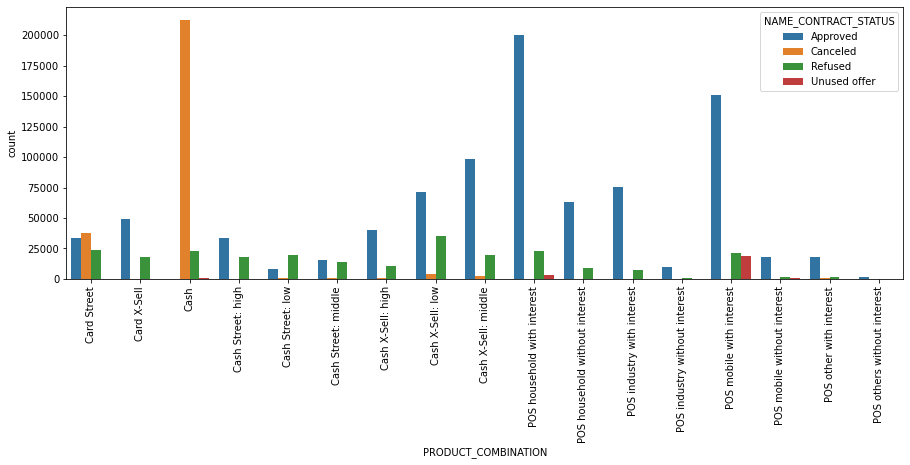

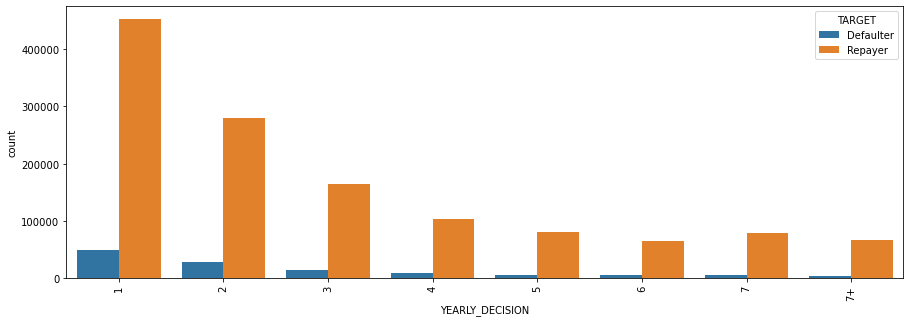

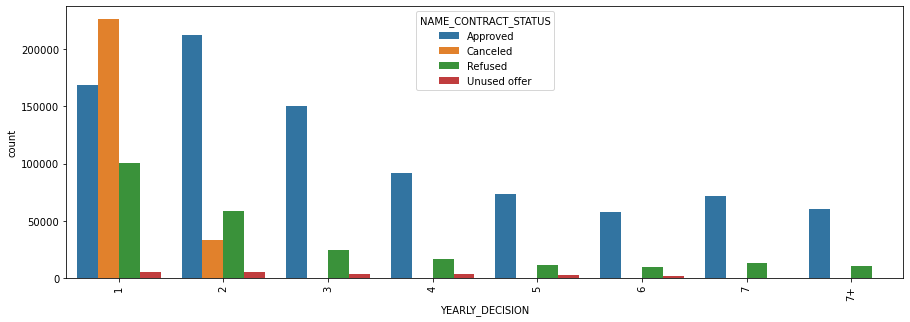

In [147]:
# Analysis

for i in pr_n_col:
    mar_bi_tar(i)
    mar_bi_st(i)

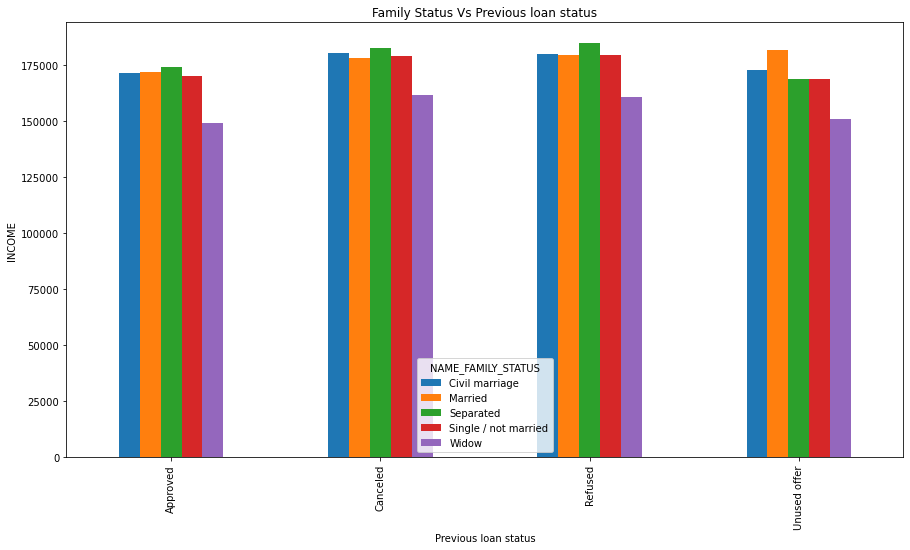

In [148]:
# pivot_tables analysis for better understand

previous_new.pivot_table(values='AMT_INCOME_TOTAL',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(15,8))
plt.xlabel('Previous loan status')
plt.ylabel('INCOME')
plt.title('Family Status Vs Previous loan status')
plt.show()

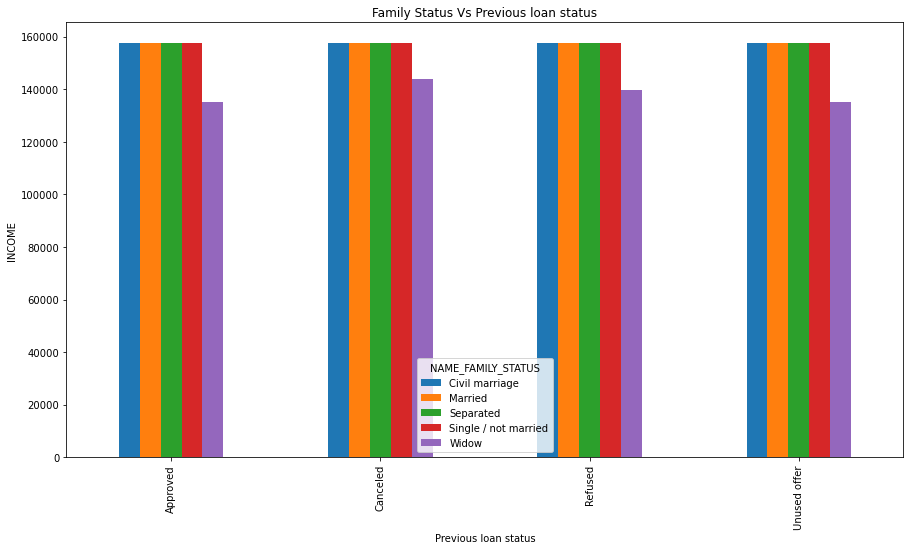

In [149]:
# pivot_tables analysis for better understand

previous_new.pivot_table(values='AMT_INCOME_TOTAL',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='median').plot.bar(figsize=(15,8))
plt.xlabel('Previous loan status')
plt.ylabel('INCOME')
plt.title('Family Status Vs Previous loan status')
plt.show()

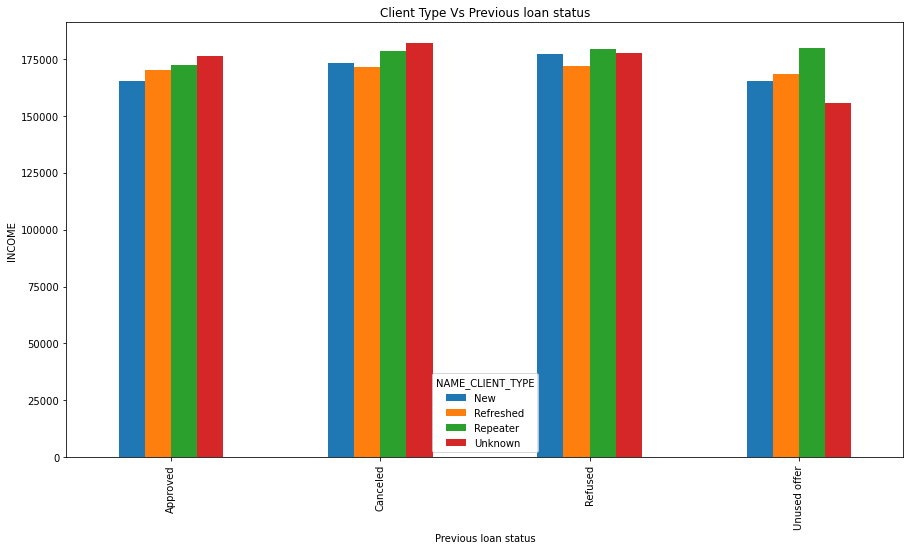

In [150]:
# pivot_tables analysis for better understand

previous_new.pivot_table(values='AMT_INCOME_TOTAL',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(15,8))
plt.xlabel('Previous loan status')
plt.ylabel('INCOME')
plt.title('Client Type Vs Previous loan status')
plt.show()

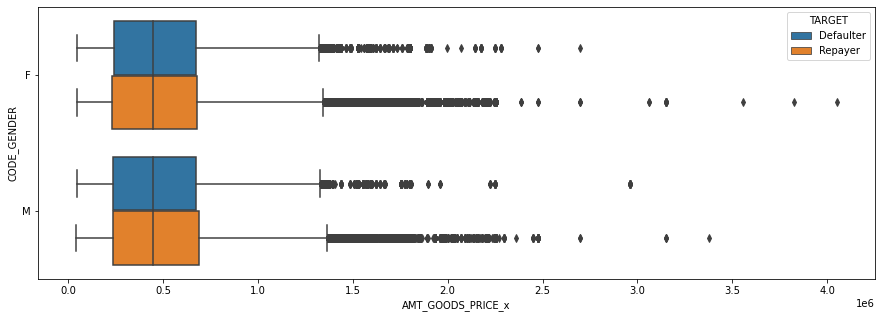

In [151]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "AMT_GOODS_PRICE_x", y ='CODE_GENDER',hue="TARGET", data=previous_new)
plt.show()

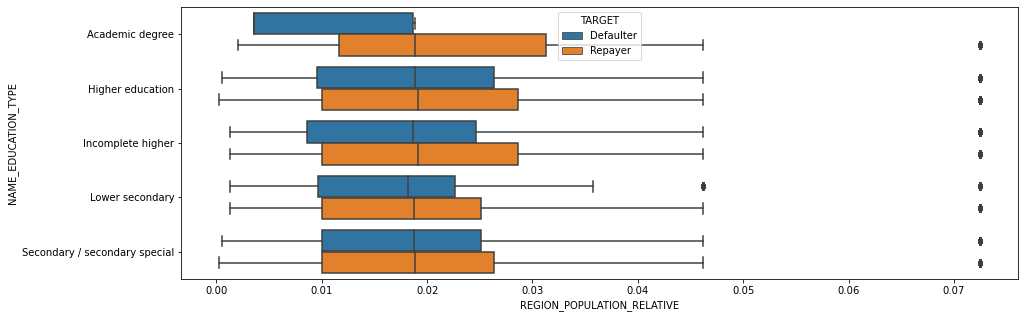

In [152]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "REGION_POPULATION_RELATIVE", y ='NAME_EDUCATION_TYPE',hue="TARGET", data=previous_new)
plt.show()

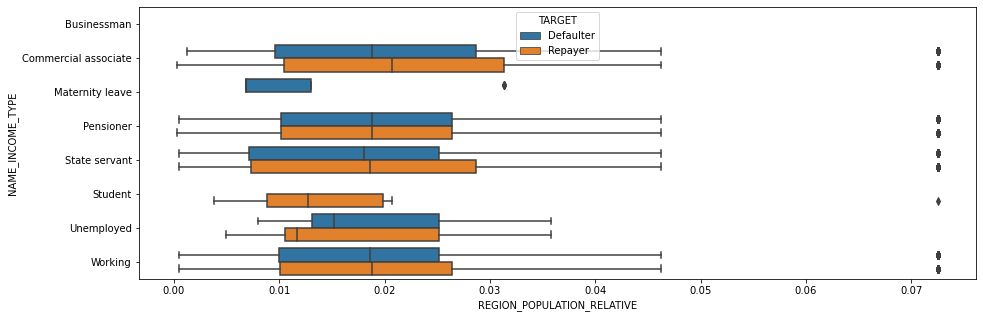

In [153]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "REGION_POPULATION_RELATIVE", y ='NAME_INCOME_TYPE',hue="TARGET", data=previous_new)
plt.show()

#### Conclusions :

1. Decisive Factor whether an applicant will be Repayer:
-  NAME_EDUCATION_TYPE: Academic degree has less defaults.
-  NAME_INCOME_TYPE: Student and Businessmen have no defaults.
-  REGION_RATING_CLIENT: RATING 1 or 2 is safer.
-  ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulter
-  AGE_GROUP: People have age of 50-60 have low probability of defaulting
-  DAYS_EMPLOYED: Clients with 30+ year experience have less chance to become defaulter
-  AMT_INCOME_TOTAL:Applicant with higher Income are less likely to default.
-  CNT_CHILDREN: People with zero to two children tend to repay the loans.

2. Decisive Factor whether an applicant will be Defaulter:
-  CODE_GENDER: Men are at relatively higher default 
-  NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
-  NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
-  AMT_INCOME_TOTAL: Clients who have low income.
-  REGION_RATING_CLIENT: people who live in Rating 3 has highest defaults.
-  OCCUPATION_TYPE: low profile job people .
-  ORGANIZATION_TYPE:  low profile job people.
-  AGE_GROUP:  young people who are in age group of 20-30 
-  DAYS_EMPLOYED: People who have less than 5 years of employment .
-  CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have more than 2 children & have more than 3 family member.
-  AMT_GOODS_PRICE: When the amount goes beyond 6lakhs or lessthan 1lakhs.

3. Suggestions:

-  Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
-  Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
-  Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
-  Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.